# Data Preprocessing And Model Building

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('../Processed_datasets/FinalDataSet_with_ph.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [3]:
sorted(df['Crop'].unique())

['apple',
 'arecanut',
 'ashgourd',
 'banana',
 'barley',
 'beetroot',
 'bittergourd',
 'blackgram',
 'blackpepper',
 'bottlegourd',
 'brinjal',
 'cabbage',
 'cardamom',
 'carrot',
 'cashewnuts',
 'cauliflower',
 'coffee',
 'coriander',
 'cotton',
 'cucumber',
 'drumstick',
 'garlic',
 'ginger',
 'grapes',
 'horsegram',
 'jackfruit',
 'jowar',
 'jute',
 'ladyfinger',
 'maize',
 'mango',
 'moong',
 'onion',
 'orange',
 'papaya',
 'pineapple',
 'pomegranate',
 'potato',
 'pumpkin',
 'radish',
 'ragi',
 'rapeseed',
 'rice',
 'ridgegourd',
 'sesamum',
 'soyabean',
 'sunflower',
 'sweetpotato',
 'tapioca',
 'tomato',
 'turmeric',
 'watermelon',
 'wheat']

In [4]:
df.isnull().sum()

Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [5]:
del df['Unnamed: 0']

In [6]:
df['Crop'].value_counts()

rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegranate  

In [7]:
df['Area_in_hectares'].max()

726300.0

In [8]:
df['Area_in_hectares'].min()

0.58

In [9]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [10]:
df['Yield_ton_per_hec'].max()

9801.0

In [11]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [12]:
set(sorted(df['State_Name']))

{'andaman and nicobar islands',
 'andhra pradesh',
 'arunachal pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra and nagar haveli',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'madhya pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil nadu',
 'telangana',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'west bengal'}

In [13]:
df['State_Name'].value_counts()

uttar pradesh                  12598
madhya pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra pradesh                  3802
west bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
kerala                          2261
haryana                         2131
uttarakhand                     1809
himachal pradesh                1425
nagaland                        1269
meghalaya                       1244
punjab                           985
jharkhand                        946
arunachal pradesh                912
jammu and kashmir                802
manipur                          679
mizoram                          530
tripura                          387
p

In [14]:
for i,j in enumerate(df['State_Name']):
    df.at[i,'State_Name']=j.replace(' ','_')

In [15]:
df['State_Name'].value_counts()

uttar_pradesh                  12598
madhya_pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil_nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra_pradesh                  3802
west_bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
kerala                          2261
haryana                         2131
uttarakhand                     1809
himachal_pradesh                1425
nagaland                        1269
meghalaya                       1244
punjab                           985
jharkhand                        946
arunachal_pradesh                912
jammu_and_kashmir                802
manipur                          679
mizoram                          530
tripura                          387
p

# Correlation heatmap


<Axes: >

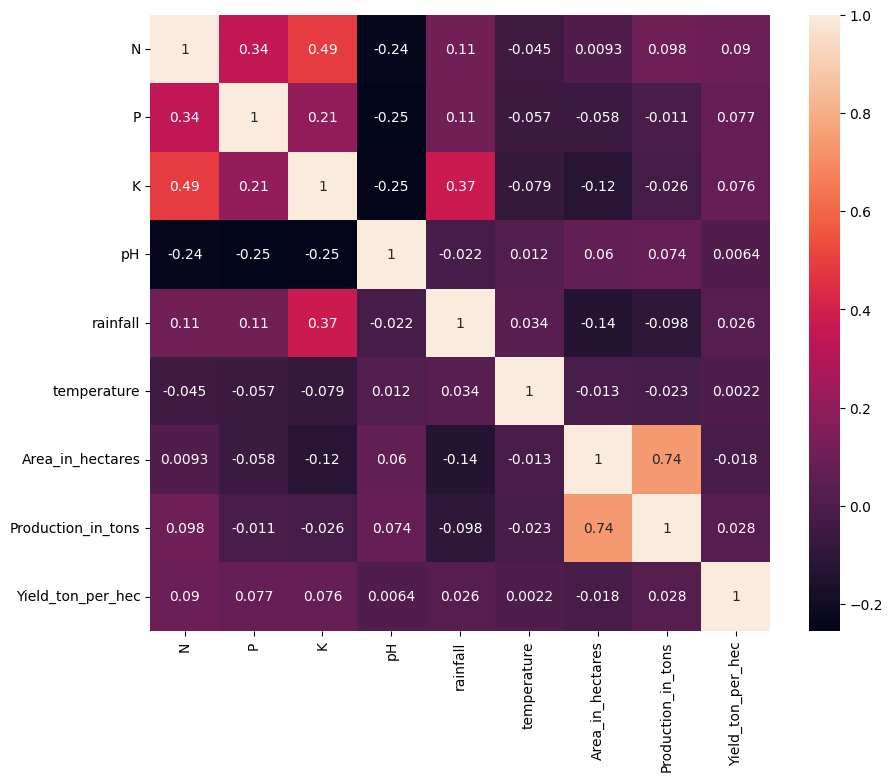

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

###### This graph shows the correlation between two columns.The range is between -1 to 1.

## Encoding Categorical Data Using OneHot Encoding

In [17]:
df_encoded=pd.get_dummies(df,columns=['State_Name','Crop','Crop_Type'])

In [18]:
df_encoded.head(20)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,State_Name_andaman_and_nicobar_islands,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,0,...,0,0,0,0,0,0,1,0,0,0
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,0,...,0,0,0,0,0,0,1,0,0,0
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,0,...,0,0,0,0,0,0,1,0,0,0
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,0,...,0,0,0,0,0,0,1,0,0,0
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,0,...,0,0,0,0,0,0,1,0,0,0
5,50,40,20,5.64,654.34,29.266667,6700.0,11800.0,1.761194,0,...,0,0,0,0,0,0,1,0,0,0
6,80,40,40,5.54,654.34,29.266667,35600.0,75400.0,2.117978,0,...,0,0,0,0,0,0,1,0,0,0
7,50,60,30,5.36,654.34,29.266667,35900.0,11100.0,0.309192,0,...,0,0,0,0,0,0,1,0,0,0
8,20,60,20,6.00,288.30,25.460000,600.0,200.0,0.333333,0,...,0,0,0,0,0,0,0,1,0,0
9,80,40,40,5.50,288.30,25.460000,18800.0,9400.0,0.500000,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N                                       99849 non-null  int64  
 1   P                                       99849 non-null  int64  
 2   K                                       99849 non-null  int64  
 3   pH                                      99849 non-null  float64
 4   rainfall                                99849 non-null  float64
 5   temperature                             99849 non-null  float64
 6   Area_in_hectares                        99849 non-null  float64
 7   Production_in_tons                      99849 non-null  float64
 8   Yield_ton_per_hec                       99849 non-null  float64
 9   State_Name_andaman_and_nicobar_islands  99849 non-null  uint8  
 10  State_Name_andhra_pradesh               99849 non-null  ui

In [20]:
df_encoded.to_csv("../encoded_data/oneHotEncoded.csv",index=False)

# Splitting the data into training and testing sets

X as features and y as target

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
del df_encoded['Yield_ton_per_hec']

In [23]:
X=df_encoded.drop('Production_in_tons',axis=1)
y=df_encoded['Production_in_tons']

In [24]:

#### feature importance ####
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
model.feature_importances_

array([1.52569124e-02, 1.55753940e-03, 2.53566286e-03, 1.89952027e-02,
       5.41024257e-03, 6.65805839e-03, 6.11781735e-01, 1.16092092e-06,
       9.65644219e-03, 5.99735704e-07, 2.81124147e-04, 9.00643866e-04,
       4.08875942e-08, 4.03931897e-04, 2.14982577e-07, 6.42464878e-06,
       9.27368570e-03, 9.89115309e-03, 4.54542882e-05, 3.27038750e-05,
       1.35958865e-04, 4.96455734e-03, 9.56142861e-04, 5.63911109e-03,
       1.82897345e-03, 1.77815214e-05, 7.28915257e-05, 1.14082061e-06,
       1.41728783e-05, 8.41470212e-04, 2.44190274e-06, 6.73072678e-02,
       1.29582084e-03, 3.19640595e-06, 3.73475897e-03, 2.09424325e-03,
       9.54744928e-05, 8.26624283e-03, 1.85266081e-04, 1.69623856e-02,
       9.42894076e-14, 2.13021257e-04, 8.10751709e-10, 8.63362180e-03,
       9.36913808e-05, 1.12758604e-09, 1.27962539e-09, 9.83349285e-09,
       4.98292777e-06, 2.73264268e-10, 4.10644371e-06, 4.59126275e-06,
       1.97839036e-06, 8.46947597e-09, 3.06343636e-05, 3.44683641e-09,
      

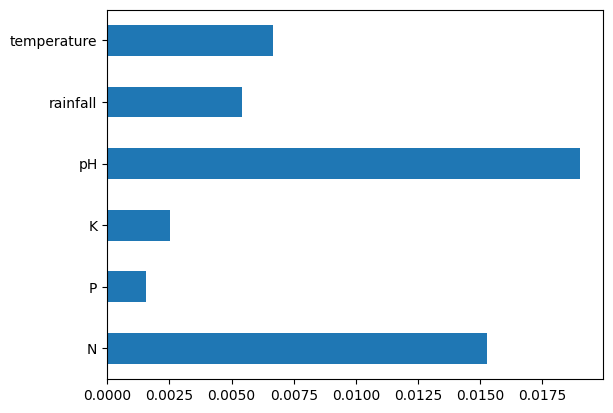

In [26]:
feat_imps=pd.Series(model.feature_importances_,index=X.columns)
feat_imps[:6].plot(kind="barh")
plt.show()

######The above graph shows the feature importance of all the features. the random splits and decision trees in Extra Trees Regressor can better capture the noise and filter out irrelevant features.Noise data refers to the random or irrelevant variation in a dataset that can cause errors or inaccuracies in predictions.

In [27]:
import pickle
with open("Models/ExtraTreesRegressor.pkl",'wb') as extra_file:
    pickle.dump(model,extra_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/ExtraTreesRegressor.pkl'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.to_csv("../encoded_data/X_train.csv",index=False)
X_test.to_csv("../encoded_data/X_test.csv",index=False)
y_train.to_csv("../encoded_data/y_train.csv",index=False)
y_test.to_csv("../encoded_data/y_test.csv",index=False)

In [30]:
from sklearn.metrics import *

# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()

### model using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
### HyperParameter Tuning ###
n_estimators=[int(i) for i in np.linspace(start=40,stop=110,num=8)]

max_features=['auto','sqrt']

max_depth=[int(i) for i in np.linspace(5,30,num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [35]:
n_estimators

[40, 50, 60, 70, 80, 90, 100, 110]

In [36]:
random_grid={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [37]:
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [38]:
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   4.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   4.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100, 110]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
rf_best=rf_cv.best_estimator_

In [40]:
rf_best

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_split=10,
                      n_estimators=70)

In [41]:
rf_pred=rf_cv.predict(X_test)

In [42]:
rf_cv_r2=r2_score(y_test,rf_pred)

In [43]:
rf_cv_mae=mean_absolute_error(y_test,rf_pred)

In [44]:
rf_cv_mse=mean_squared_error(y_test,rf_pred)

In [45]:
rf_cv_rmse=np.sqrt(rf_cv_mse)

In [46]:
rf_cv_score=rf_best.score(X_test,y_test)

In [47]:
print(f'R2_score is : {rf_cv_r2}')
print(f'MSE is : {rf_cv_mse}')
print(f'RMSE is : {rf_cv_rmse}')
print(f'MAE is : {rf_cv_mae}')
print(f'Model Score is : {rf_cv_score}')

R2_score is : 0.934789532381315
MSE is : 982261232.7449545
RMSE is : 31341.04709075551
MAE is : 9157.546430274642
Model Score is : 0.934789532381315


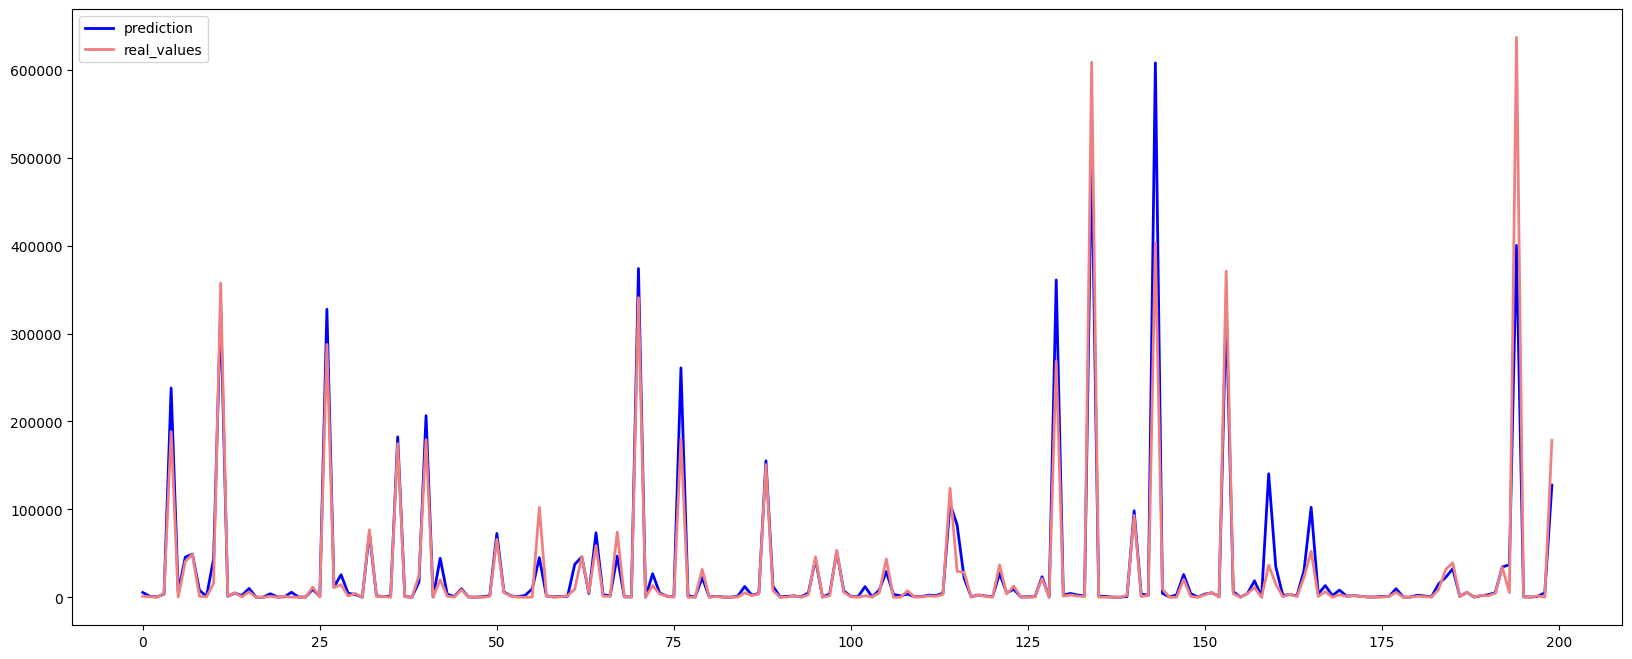

In [48]:
plt.figure(figsize=(20,8))
plt.plot(rf_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

######The above graph shows a comparison between the first 200 predicted values and actual values.

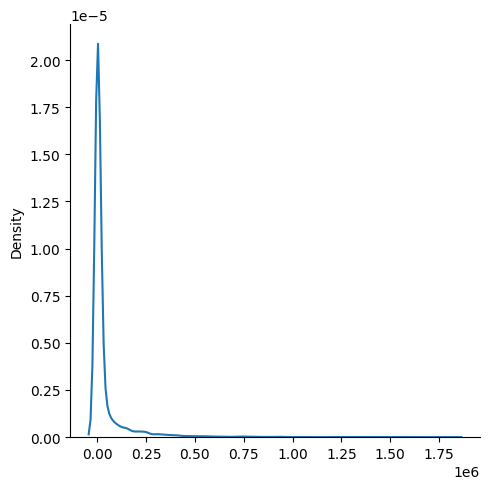

In [49]:
sns.displot(rf_pred,kind='kde')

######This a normal distribution graph of predicted values.

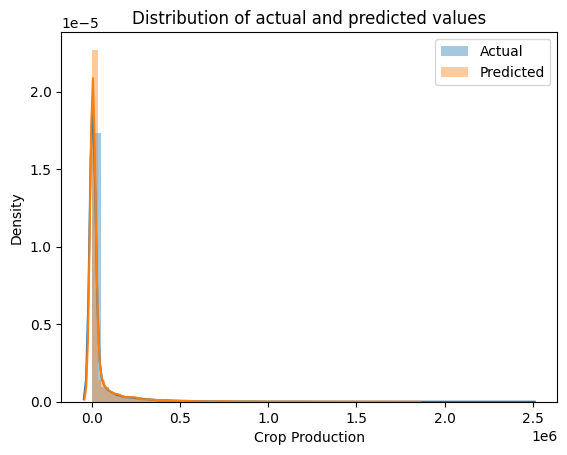

In [50]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(rf_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()


Above is the comparision of two normal distribution curves of Actual and  Predicted values. Maximum values lie near the mean of the data

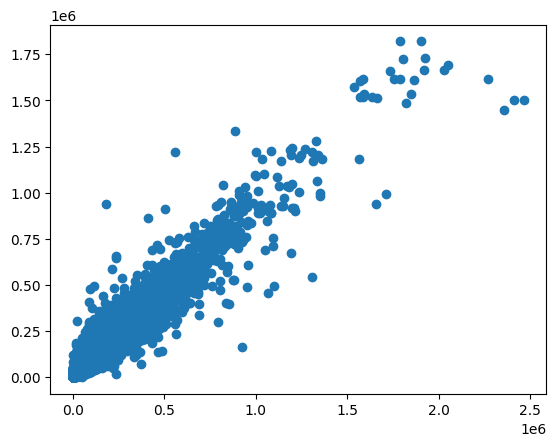

In [51]:
plt.scatter(y_test,rf_pred)

Above is a scatter plot of two components: y_test data and the predicted values of the model on X_test data.This shows a linear relation.

In [220]:
with open("RandomForest_CV_model.pkl",'wb') as rf_cv_file:
    pickle.dump(rf_best,rf_cv_file)

### model using manual parameters

In [53]:
rf_regressor=RandomForestRegressor(n_estimators=60,random_state=42)

In [54]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [55]:
y_pred=rf_regressor.predict(X_test)

In [56]:
y_pred

array([2.74230000e+03, 5.86725000e+02, 2.45966667e+01, ...,
       9.57266667e+02, 1.27644988e+05, 2.94202400e+05])

In [57]:
rf_r2=r2_score(y_test,y_pred)

In [58]:
rf_mse=mean_squared_error(y_test,y_pred)

In [59]:
rf_mae=mean_absolute_error(y_test,y_pred)

In [60]:
rf_rmse=np.sqrt(rf_mse)

In [61]:
rf_score=rf_regressor.score(X_test,y_test)

In [62]:
print(f'R2_score is : {rf_r2}')
print(f'MSE is : {rf_mse}')
print(f'RMSE is : {rf_rmse}')
print(f'MAE is : {rf_mae}')
print(f'Model Score is : {rf_score}')

R2_score is : 0.9306145253047456
MSE is : 1045149105.6203645
RMSE is : 32328.765915518095
MAE is : 8361.72783180293
Model Score is : 0.9306145253047456


### visualizing the RF predictions

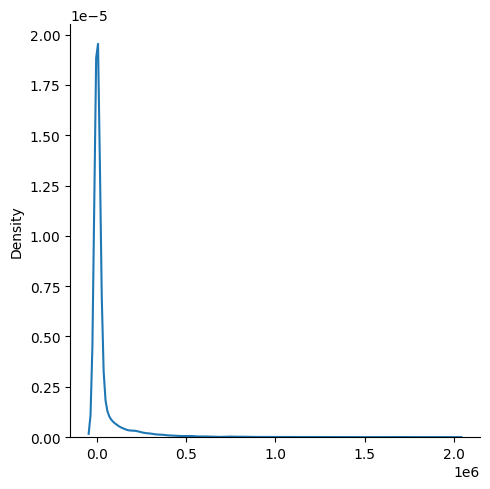

In [63]:
sns.displot(y_pred,kind='kde')

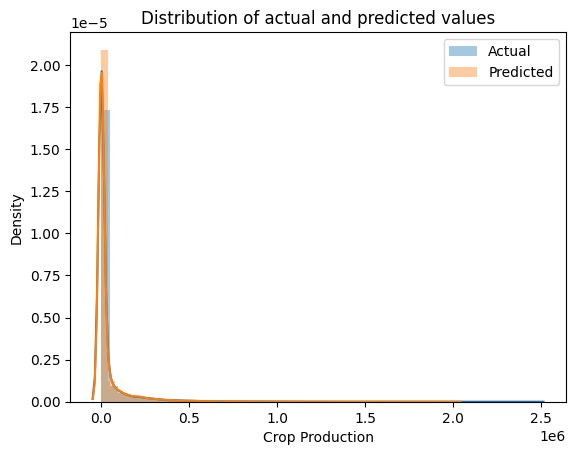

In [64]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

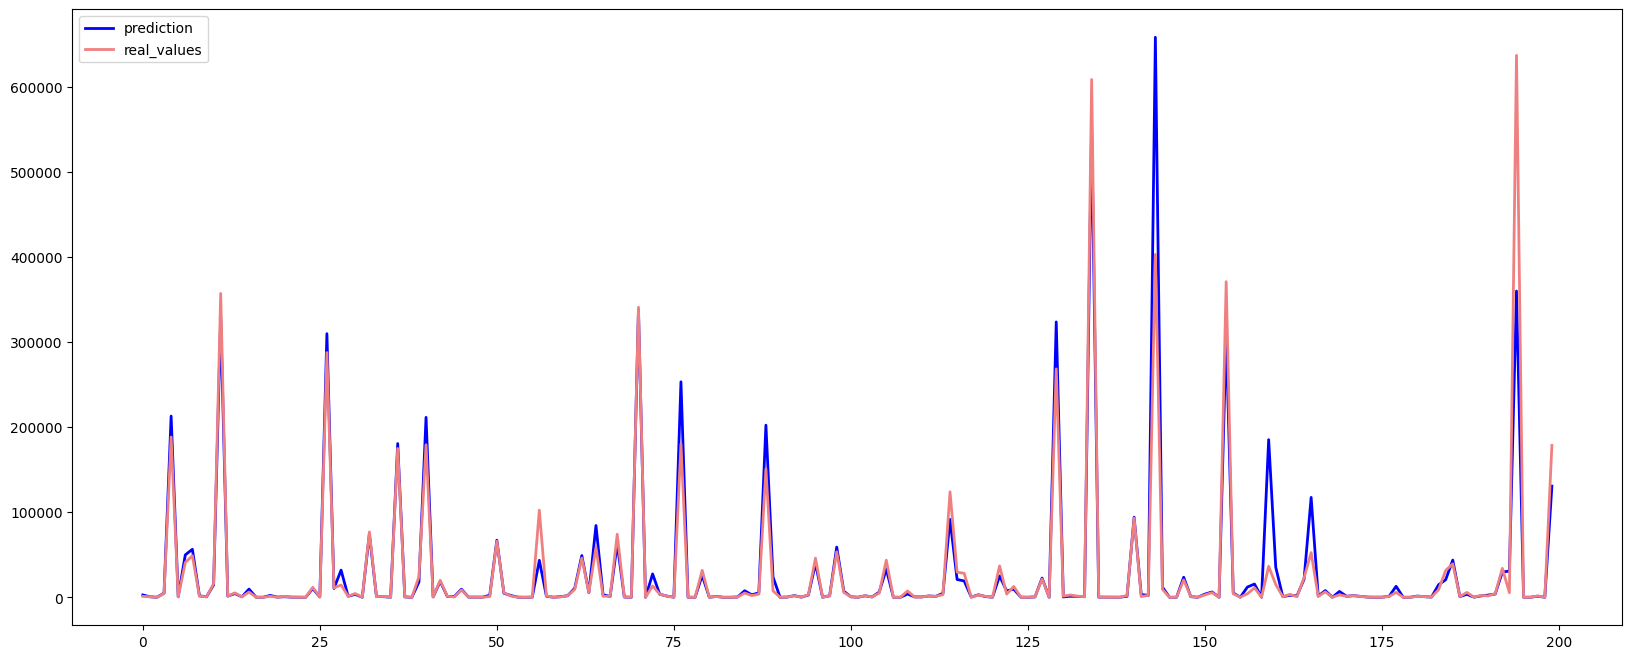

In [65]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

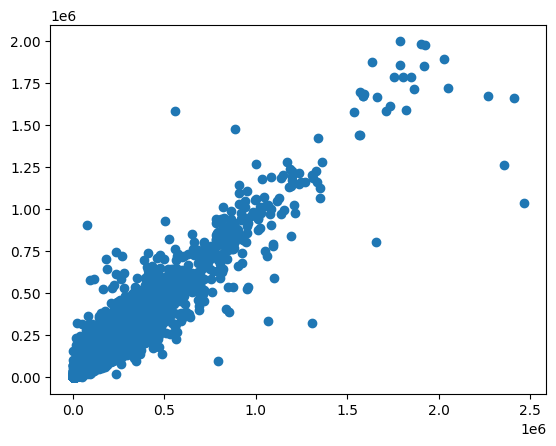

In [66]:
plt.scatter(y_test,y_pred)

In [67]:
with open('Models/RandomForest_model.pkl','wb') as rf_file:
    pickle.dump(rf_regressor,rf_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/RandomForest_model.pkl'

# Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt_regressor=DecisionTreeRegressor()

In [70]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [71]:
dt_y_pred=dt_regressor.predict(X_test)

In [72]:
dt_y_pred

array([2.04600e+03, 6.43000e+02, 2.40000e+01, ..., 1.03700e+03,
       1.66483e+05, 3.31036e+05])

In [73]:
dt_r2=r2_score(y_test,dt_y_pred)

In [74]:
dt_mse=mean_squared_error(y_test,dt_y_pred)

In [75]:
dt_rmse=np.sqrt(mean_squared_error(y_test,dt_y_pred))

In [76]:
dt_mae=mean_absolute_error(y_test,dt_y_pred)

In [77]:
dt_score=dt_regressor.score(X_test,y_test)

In [78]:
print(f'R2_score is : {dt_r2}')
print(f'MSE is : {dt_mse}')
print(f'RMSE is : {dt_rmse}')
print(f'MAE is : {dt_mae}')
print(f'Model Score is : {dt_score}')

R2_score is : 0.8976849041758598
MSE is : 1541165948.0853262
RMSE is : 39257.68648411832
MAE is : 10570.674344182942
Model Score is : 0.8976849041758598


### Visualizing Descision Tree Predictions

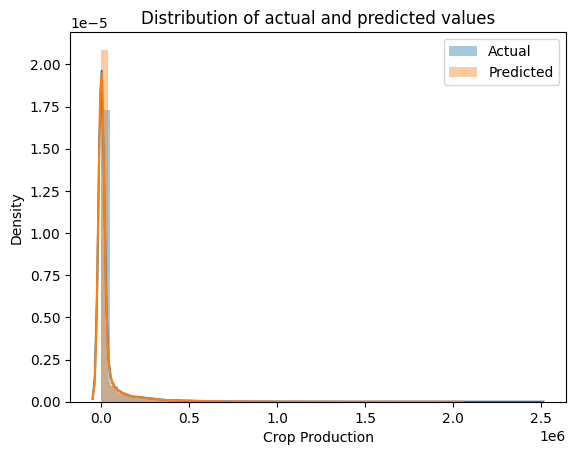

In [79]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(dt_y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

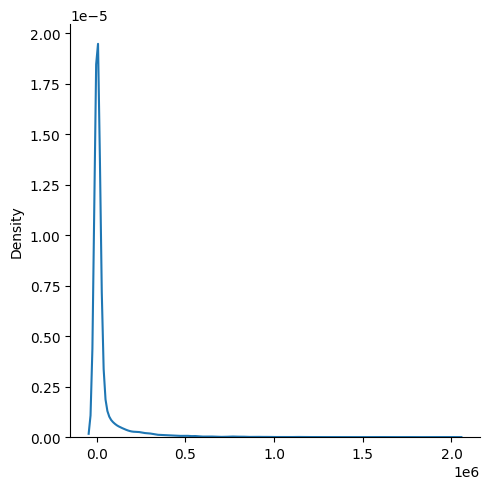

In [80]:
sns.displot(dt_y_pred,kind='kde')

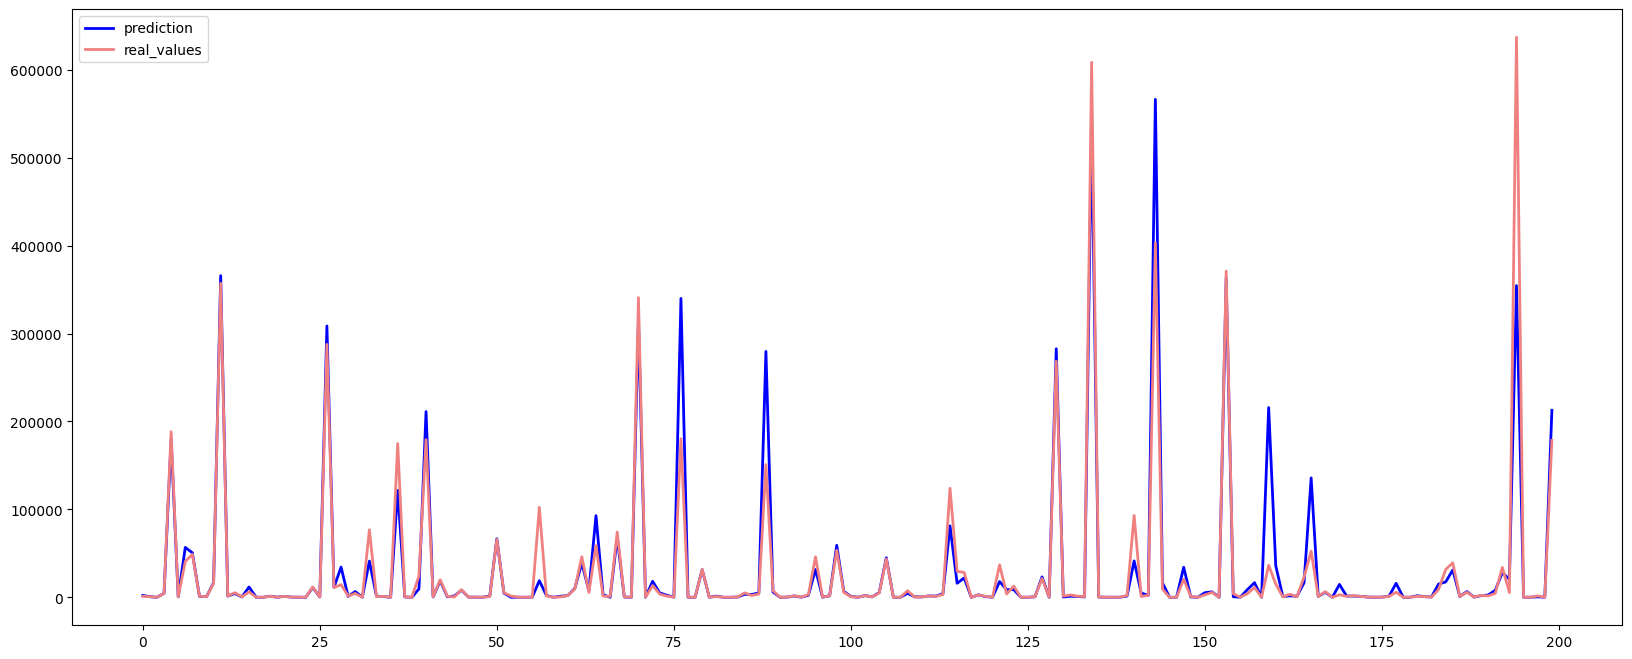

In [81]:
plt.figure(figsize=(20,8))
plt.plot(dt_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

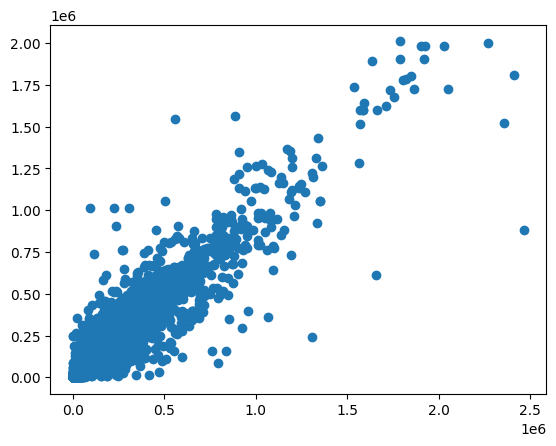

In [82]:
plt.scatter(y_test,dt_y_pred)

In [221]:
with open('DecisionTreeRegressor_model.pkl','wb') as dt_file:
    pickle.dump(dt_regressor,dt_file)

# XG Boost Regressor

In [84]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.2 MB/s eta 0:00:00a 0:00:01m


### XG Boost without hypertuning

In [85]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [86]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
xgb.score(X_test,y_test)

0.9276298192859378

In [88]:
xgb_y_pred=xgb.predict(X_test)

In [89]:
xgb_y_pred

array([ 1.5025891e+02,  1.5693798e+03, -7.3547150e+01, ...,
        8.0893109e+02,  1.3697522e+05,  3.2212666e+05], dtype=float32)

In [90]:
xgb_r2=r2_score(y_test,xgb_y_pred)

In [91]:
xgb_mae=mean_absolute_error(y_test,xgb_y_pred)

In [92]:
xgb_mse=mean_squared_error(y_test,xgb_y_pred)

In [93]:
xgb_rmse=np.sqrt(xgb_mse)

In [94]:
xgb_score=xgb.score(X_test,y_test)

In [95]:
print(f'R2_score is : {xgb_r2}')
print(f'MSE is : {xgb_mse}')
print(f'RMSE is : {xgb_rmse}')
print(f'MAE is : {xgb_mae}')
print(f'Model Score is : {xgb_score}')

R2_score is : 0.9276298192859378
MSE is : 1090107547.4238925
RMSE is : 33016.77675703509
MAE is : 8863.640286575948
Model Score is : 0.9276298192859378


In [222]:
with open("XGBoost_Regressor_model.pkl",'wb') as xgb_file:
    pickle.dump(xgb,xgb_file)

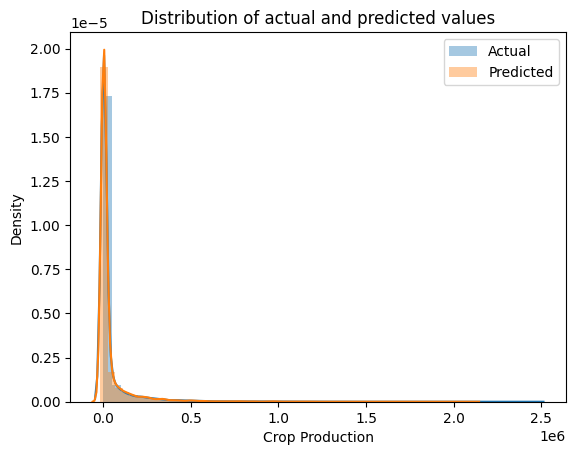

In [97]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(xgb_y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

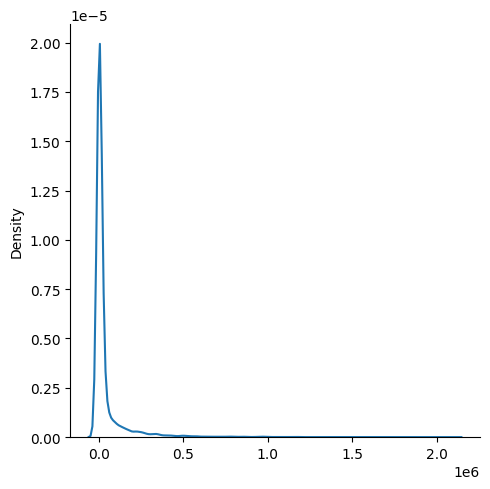

In [98]:
sns.displot(xgb_y_pred,kind='kde')

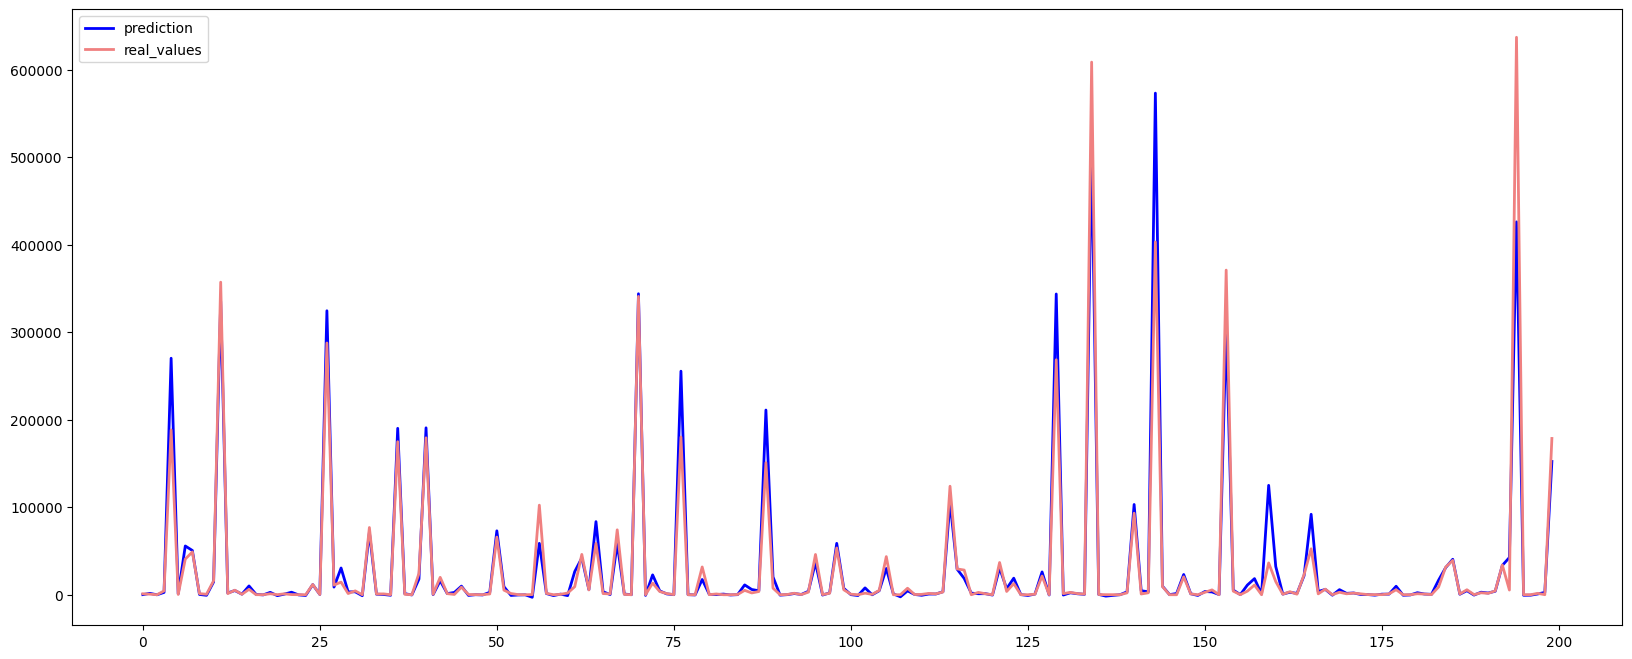

In [99]:
plt.figure(figsize=(20,8))
plt.plot(xgb_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

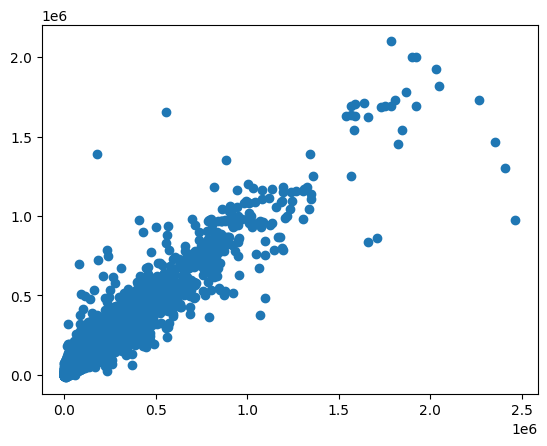

In [100]:
plt.scatter(y_test,xgb_y_pred)

### XG Boost with Randomized Search CV

In [101]:
from scipy.stats import randint,uniform
xgb_random=XGBRegressor()

In [102]:
param_grid={
    'max_depth': range(4,10),
    'learning_rate': np.logspace(-3, 0, 50),
    'subsample': np.linspace(0.5, 1, 50),
    'n_estimators': range(40, 100, 10)
}

In [103]:
xgb_cv=RandomizedSearchCV(estimator=xgb_random,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,n_jobs=-1,random_state=42)

In [104]:
xgb_cv.fit(X_train,y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889:

[0]	validation_0-rmse:122415.44046
[0]	validation_0-rmse:122412.16297
[0]	validation_0-rmse:122638.12060
[0]	validation_0-rmse:122640.59591
[0]	validation_0-rmse:122417.67830
[0]	validation_0-rmse:122414.80923
[0]	validation_0-rmse:122636.35181
[1]	validation_0-rmse:122094.39725
[1]	validation_0-rmse:122092.57416
[0]	validation_0-rmse:122414.61671


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:122540.91273
[1]	validation_0-rmse:122545.72222
[1]	validation_0-rmse:122096.44900
[1]	validation_0-rmse:122541.78713
[1]	validation_0-rmse:122096.04266
[2]	validation_0-rmse:121776.35176
[2]	validation_0-rmse:121771.30088
[1]	validation_0-rmse:122096.82559
[2]	validation_0-rmse:122443.57547
[2]	validation_0-rmse:122450.60621
[2]	validation_0-rmse:122446.12020
[2]	validation_0-rmse:121779.28993
[2]	validation_0-rmse:121777.22024
[3]	validation_0-rmse:121457.62373
[3]	validation_0-rmse:121450.78389
[3]	validation_0-rmse:122346.89477
[2]	validation_0-rmse:121777.26000
[3]	validation_0-rmse:122354.58710
[3]	validation_0-rmse:122350.45116
[3]	validation_0-rmse:121462.13982
[3]	validation_0-rmse:121460.88753
[4]	validation_0-rmse:121142.75102
[4]	validation_0-rmse:121135.37770
[4]	validation_0-rmse:122249.40654
[4]	validation_0-rmse:122258.34056
[4]	validation_0-rmse:122252.79920
[3]	validation_0-rmse:121458.78580
[4]	validation_0-rmse:121147.64525
[4]	validation_0-rms

[33]	validation_0-rmse:119464.60518
[33]	validation_0-rmse:119474.30452
[31]	validation_0-rmse:113000.40656
[29]	validation_0-rmse:113569.20575
[32]	validation_0-rmse:112717.50250
[34]	validation_0-rmse:119368.97620
[29]	validation_0-rmse:113603.97487
[32]	validation_0-rmse:112643.46157
[34]	validation_0-rmse:119379.76882
[34]	validation_0-rmse:119370.35254
[30]	validation_0-rmse:113277.54298
[32]	validation_0-rmse:112713.75022
[35]	validation_0-rmse:119273.54294
[33]	validation_0-rmse:112432.48687
[33]	validation_0-rmse:112355.69273
[30]	validation_0-rmse:113312.50569
[35]	validation_0-rmse:119275.74902
[35]	validation_0-rmse:119285.72083
[33]	validation_0-rmse:112426.33447
[34]	validation_0-rmse:112146.95699
[36]	validation_0-rmse:119180.46143
[31]	validation_0-rmse:112984.62521
[31]	validation_0-rmse:113023.81897
[34]	validation_0-rmse:112069.79477
[36]	validation_0-rmse:119190.18773
[36]	validation_0-rmse:119182.58130
[34]	validation_0-rmse:112139.93326
[32]	validation_0-rmse:11269

[63]	validation_0-rmse:104168.56922
[60]	validation_0-rmse:105001.42255
[62]	validation_0-rmse:104517.24207
[67]	validation_0-rmse:116322.72676
[63]	validation_0-rmse:104259.28988
[60]	validation_0-rmse:105057.28716
[68]	validation_0-rmse:116217.20430
[67]	validation_0-rmse:116321.03739
[64]	validation_0-rmse:103909.85033
[61]	validation_0-rmse:104742.45575
[63]	validation_0-rmse:104259.07581
[68]	validation_0-rmse:116230.97637
[64]	validation_0-rmse:104002.38752
[61]	validation_0-rmse:104796.57448
[69]	validation_0-rmse:116124.97558
[68]	validation_0-rmse:116227.76724
[65]	validation_0-rmse:103653.46706
[62]	validation_0-rmse:104483.31490
[64]	validation_0-rmse:103999.90160
[69]	validation_0-rmse:116141.10644
[65]	validation_0-rmse:103747.65369
[70]	validation_0-rmse:116034.08980
[62]	validation_0-rmse:104535.02381
[69]	validation_0-rmse:116137.83508
[66]	validation_0-rmse:103394.24060
[63]	validation_0-rmse:104225.66481
[65]	validation_0-rmse:103742.38399
[71]	validation_0-rmse:11594

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-rmse:114702.12320
[87]	validation_0-rmse:114526.22499
[88]	validation_0-rmse:114418.51778
[0]	validation_0-rmse:122636.12233
[86]	validation_0-rmse:114612.40146
[88]	validation_0-rmse:114435.79987
[89]	validation_0-rmse:114329.30524
[87]	validation_0-rmse:114523.18342
[1]	validation_0-rmse:122538.95631
[89]	validation_0-rmse:114347.03713
[88]	validation_0-rmse:114432.96900
[2]	validation_0-rmse:122444.51665


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:122637.45551
[89]	validation_0-rmse:114343.52205
[0]	validation_0-rmse:85262.20681
[3]	validation_0-rmse:122347.24710
[1]	validation_0-rmse:122539.03361
[1]	validation_0-rmse:63084.00461
[4]	validation_0-rmse:122249.94590


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:122441.35641
[2]	validation_0-rmse:50178.65165
[0]	validation_0-rmse:85295.20405
[5]	validation_0-rmse:122151.77269
[3]	validation_0-rmse:122343.56967
[0]	validation_0-rmse:86219.91992
[3]	validation_0-rmse:43473.33800
[6]	validation_0-rmse:122054.62954
[1]	validation_0-rmse:63668.59577
[4]	validation_0-rmse:122245.47594
[1]	validation_0-rmse:64324.04720
[4]	validation_0-rmse:39805.83656
[2]	validation_0-rmse:50833.75914
[7]	validation_0-rmse:121956.46482
[5]	validation_0-rmse:122148.78032
[2]	validation_0-rmse:51333.24900
[5]	validation_0-rmse:37529.13462
[3]	validation_0-rmse:44048.69918
[6]	validation_0-rmse:122052.68543
[8]	validation_0-rmse:121858.92047
[3]	validation_0-rmse:44849.01238
[6]	validation_0-rmse:36575.74135
[4]	validation_0-rmse:40005.92193
[7]	validation_0-rmse:121955.68667
[9]	validation_0-rmse:121761.15483
[4]	validation_0-rmse:40454.47179
[7]	validation_0-rmse:36060.65467
[5]	validation_0-rmse:37738.15362
[8]	validation_0-rmse:121860.20851
[1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:121375.70157
[15]	validation_0-rmse:121178.00185
[1]	validation_0-rmse:62901.29090
[13]	validation_0-rmse:34489.45445
[10]	validation_0-rmse:35234.48928
[11]	validation_0-rmse:34564.33749
[14]	validation_0-rmse:121280.47774
[16]	validation_0-rmse:121078.04568
[0]	validation_0-rmse:86125.91641
[2]	validation_0-rmse:49985.27133
[14]	validation_0-rmse:34633.45133
[11]	validation_0-rmse:35017.10494
[12]	validation_0-rmse:34652.06802


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:121185.27608
[17]	validation_0-rmse:120983.14128
[0]	validation_0-rmse:115931.80698
[1]	validation_0-rmse:64466.94937
[12]	validation_0-rmse:34889.10046
[15]	validation_0-rmse:34721.67538
[3]	validation_0-rmse:42958.51117
[13]	validation_0-rmse:34538.66184
[16]	validation_0-rmse:121090.57259
[18]	validation_0-rmse:120888.06440
[1]	validation_0-rmse:109890.89614
[13]	validation_0-rmse:34917.84558
[16]	validation_0-rmse:34674.53616
[2]	validation_0-rmse:52014.98509
[4]	validation_0-rmse:39488.52607
[14]	validation_0-rmse:34394.61485
[17]	validation_0-rmse:120994.74009
[19]	validation_0-rmse:120795.71629
[2]	validation_0-rmse:103948.56497
[14]	validation_0-rmse:34859.25226
[5]	validation_0-rmse:37061.92125
[3]	validation_0-rmse:44588.29686
[17]	validation_0-rmse:34746.33476
[15]	validation_0-rmse:34258.39354
[18]	validation_0-rmse:120898.74889
[20]	validation_0-rmse:120699.66826
[3]	validation_0-rmse:98499.27102
[15]	validation_0-rmse:34925.19433
[18]	validation_0-r

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:47983.77808
[0]	validation_0-rmse:115982.88818
[36]	validation_0-rmse:119187.38230
[23]	validation_0-rmse:35339.15254
[40]	validation_0-rmse:118794.93434
[24]	validation_0-rmse:35294.31533
[23]	validation_0-rmse:46789.91800
[1]	validation_0-rmse:109887.43175
[37]	validation_0-rmse:119094.08011
[41]	validation_0-rmse:118701.54306
[24]	validation_0-rmse:45917.19587
[38]	validation_0-rmse:118999.88989
[2]	validation_0-rmse:104066.09554
[42]	validation_0-rmse:118608.67000
[25]	validation_0-rmse:35284.57026
[25]	validation_0-rmse:44999.54934
[39]	validation_0-rmse:118904.49781
[3]	validation_0-rmse:98808.87145
[26]	validation_0-rmse:35311.28829
[43]	validation_0-rmse:118515.67823
[0]	validation_0-rmse:116130.33564
[26]	validation_0-rmse:44092.75021
[40]	validation_0-rmse:118811.56500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:93994.94314
[44]	validation_0-rmse:118425.23160
[1]	validation_0-rmse:109823.44288
[27]	validation_0-rmse:43480.03927
[5]	validation_0-rmse:89486.19617
[41]	validation_0-rmse:118717.77002
[45]	validation_0-rmse:118332.16996
[28]	validation_0-rmse:42790.88293
[2]	validation_0-rmse:104011.23180
[6]	validation_0-rmse:85295.29149
[42]	validation_0-rmse:118624.50072
[46]	validation_0-rmse:118238.92256


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:42215.81015
[3]	validation_0-rmse:98791.56780
[7]	validation_0-rmse:81369.73700
[43]	validation_0-rmse:118529.79074
[47]	validation_0-rmse:118147.11422
[0]	validation_0-rmse:115829.74855
[30]	validation_0-rmse:41719.09139
[4]	validation_0-rmse:93958.80682
[8]	validation_0-rmse:77671.41545
[44]	validation_0-rmse:118435.00882
[48]	validation_0-rmse:118052.37384
[1]	validation_0-rmse:109635.52601
[5]	validation_0-rmse:89390.69114
[31]	validation_0-rmse:41228.01328
[45]	validation_0-rmse:118343.41450
[9]	validation_0-rmse:74220.78518
[49]	validation_0-rmse:117959.31496
[2]	validation_0-rmse:103759.48192
[6]	validation_0-rmse:85179.04122
[32]	validation_0-rmse:40879.73278
[46]	validation_0-rmse:118249.96524
[10]	validation_0-rmse:70878.39913
[3]	validation_0-rmse:98561.98199
[50]	validation_0-rmse:117867.32092
[33]	validation_0-rmse:40378.31131
[7]	validation_0-rmse:81110.62098
[47]	validation_0-rmse:118159.25385
[11]	validation_0-rmse:68082.48396
[4]	validation_0-rms

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:39440.62533
[53]	validation_0-rmse:117588.07990
[10]	validation_0-rmse:70824.75642
[1]	validation_0-rmse:109701.82902
[50]	validation_0-rmse:117877.12940
[14]	validation_0-rmse:60803.31261
[7]	validation_0-rmse:81089.61633
[37]	validation_0-rmse:39148.74753
[54]	validation_0-rmse:117495.11809
[11]	validation_0-rmse:67818.54291
[38]	validation_0-rmse:38936.29274
[2]	validation_0-rmse:104028.77707
[8]	validation_0-rmse:77299.27655
[51]	validation_0-rmse:117785.16925
[15]	validation_0-rmse:58600.15828
[55]	validation_0-rmse:117404.08995
[12]	validation_0-rmse:65223.69774
[39]	validation_0-rmse:38709.59064
[3]	validation_0-rmse:98749.33042
[16]	validation_0-rmse:56717.50206
[52]	validation_0-rmse:117692.34798
[9]	validation_0-rmse:73972.19660
[56]	validation_0-rmse:117311.22342
[13]	validation_0-rmse:62770.16184
[40]	validation_0-rmse:38488.18068
[4]	validation_0-rmse:93720.61764
[53]	validation_0-rmse:117597.72906
[10]	validation_0-rmse:70737.24056
[17]	validation_0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-rmse:117505.08273
[11]	validation_0-rmse:67807.65310
[18]	validation_0-rmse:53302.13321
[58]	validation_0-rmse:117125.06510
[1]	validation_0-rmse:122438.83627
[42]	validation_0-rmse:38108.45253
[15]	validation_0-rmse:58538.09005
[6]	validation_0-rmse:84974.61934
[55]	validation_0-rmse:117413.59672
[12]	validation_0-rmse:65038.51403
[19]	validation_0-rmse:51899.13492
[59]	validation_0-rmse:117035.01085
[7]	validation_0-rmse:81028.62671
[2]	validation_0-rmse:122292.71252
[43]	validation_0-rmse:37973.11459
[16]	validation_0-rmse:56464.83293
[56]	validation_0-rmse:117320.91624
[13]	validation_0-rmse:62561.34145
[20]	validation_0-rmse:50662.42929
[8]	validation_0-rmse:77450.78141
[60]	validation_0-rmse:116943.53007
[17]	validation_0-rmse:54742.63720
[3]	validation_0-rmse:122143.64620
[44]	validation_0-rmse:37813.61985
[14]	validation_0-rmse:60285.00777
[9]	validation_0-rmse:74090.77188
[57]	validation_0-rmse:117229.68790
[21]	validation_0-rmse:49430.14010
[61]	validation_0

[71]	validation_0-rmse:35631.74320
[30]	validation_0-rmse:118210.27457
[44]	validation_0-rmse:37565.34848
[87]	validation_0-rmse:114506.47546
[84]	validation_0-rmse:114781.92089
[49]	validation_0-rmse:37448.21861
[37]	validation_0-rmse:39000.00985
[41]	validation_0-rmse:37705.68233
[72]	validation_0-rmse:35595.76738
[31]	validation_0-rmse:118069.29932
[45]	validation_0-rmse:37371.73632
[85]	validation_0-rmse:114692.31569
[88]	validation_0-rmse:114416.09638
[50]	validation_0-rmse:37368.08526
[38]	validation_0-rmse:38640.78154
[42]	validation_0-rmse:37490.52460
[73]	validation_0-rmse:35528.91471
[46]	validation_0-rmse:37262.87768
[32]	validation_0-rmse:117933.05114
[86]	validation_0-rmse:114602.98400
[51]	validation_0-rmse:37237.26140
[39]	validation_0-rmse:38460.30942
[43]	validation_0-rmse:37289.41599
[74]	validation_0-rmse:35454.83249
[47]	validation_0-rmse:37128.87158
[89]	validation_0-rmse:114326.30683
[33]	validation_0-rmse:117787.86290
[87]	validation_0-rmse:114514.97424
[40]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[65]	validation_0-rmse:36195.00090
[47]	validation_0-rmse:115805.73344
[62]	validation_0-rmse:36037.99582
[54]	validation_0-rmse:36193.05415
[0]	validation_0-rmse:122589.10922
[58]	validation_0-rmse:35518.46254
[89]	validation_0-rmse:35120.74798
[48]	validation_0-rmse:115668.77449
[66]	validation_0-rmse:36102.84647
[63]	validation_0-rmse:35997.00137
[55]	validation_0-rmse:36124.79334
[1]	validation_0-rmse:122441.28842
[59]	validation_0-rmse:35485.41160
[49]	validation_0-rmse:115526.82552
[64]	validation_0-rmse:35974.82659
[67]	validation_0-rmse:36063.93632
[56]	validation_0-rmse:36088.76752
[2]	validation_0-rmse:122294.62028
[60]	validation_0-rmse:35431.47734
[68]	validation_0-rmse:36004.93938
[65]	validation_0-rmse:35866.81833
[50]	validation_0-rmse:115391.61499
[57]	validation_0-rmse:36017.67156
[61]	validation_0-rmse:35363.01005
[3]	validation_0-rmse:122149.53251
[0]	validation_0-rmse:122587.91694
[69]	validation_0-rmse:35957.33165
[66]	validation_0-rmse:35835.18153
[51]	validation_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-rmse:35297.28009
[4]	validation_0-rmse:122001.10310
[70]	validation_0-rmse:35941.37303
[1]	validation_0-rmse:122440.46751
[52]	validation_0-rmse:115116.75853
[59]	validation_0-rmse:35919.87583
[67]	validation_0-rmse:35802.62602
[63]	validation_0-rmse:35246.09195
[5]	validation_0-rmse:121854.79506
[71]	validation_0-rmse:35907.09773
[2]	validation_0-rmse:122293.19971
[68]	validation_0-rmse:35738.57009
[53]	validation_0-rmse:114978.55155
[60]	validation_0-rmse:35852.34518
[64]	validation_0-rmse:35180.16563
[6]	validation_0-rmse:121710.86314
[72]	validation_0-rmse:35874.26807
[3]	validation_0-rmse:122147.61862
[61]	validation_0-rmse:35782.19032
[69]	validation_0-rmse:35710.47062
[65]	validation_0-rmse:35091.89591
[7]	validation_0-rmse:121563.14990
[73]	validation_0-rmse:35830.30317
[54]	validation_0-rmse:114840.01461
[70]	validation_0-rmse:35684.84614
[62]	validation_0-rmse:35694.55308
[4]	validation_0-rmse:121998.33827
[66]	validation_0-rmse:35048.80014
[8]	validation_0-

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[78]	validation_0-rmse:35427.85923
[74]	validation_0-rmse:34749.73259
[12]	validation_0-rmse:120812.25921
[62]	validation_0-rmse:113750.26216
[16]	validation_0-rmse:120236.36621
[82]	validation_0-rmse:35574.12563
[71]	validation_0-rmse:35117.00744
[1]	validation_0-rmse:122435.36186
[79]	validation_0-rmse:35396.73730
[75]	validation_0-rmse:34741.34338
[13]	validation_0-rmse:120666.33883
[63]	validation_0-rmse:113617.49104
[83]	validation_0-rmse:35571.83571
[72]	validation_0-rmse:35063.70503
[2]	validation_0-rmse:122289.84342
[80]	validation_0-rmse:35356.68481
[76]	validation_0-rmse:34703.90037
[14]	validation_0-rmse:120517.61542
[17]	validation_0-rmse:120092.21323
[64]	validation_0-rmse:113485.30569
[84]	validation_0-rmse:35543.96479
[73]	validation_0-rmse:34987.72226
[81]	validation_0-rmse:35282.09591
[3]	validation_0-rmse:122140.86633
[77]	validation_0-rmse:34704.70364
[15]	validation_0-rmse:120370.74785
[85]	validation_0-rmse:35532.24988
[65]	validation_0-rmse:113352.11017
[74]	valid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:122587.68066
[22]	validation_0-rmse:119350.53234
[83]	validation_0-rmse:110976.06800
[35]	validation_0-rmse:117520.02689
[34]	validation_0-rmse:117645.56705
[1]	validation_0-rmse:122437.96804
[84]	validation_0-rmse:110841.86403
[23]	validation_0-rmse:119206.92003
[36]	validation_0-rmse:117375.42552
[35]	validation_0-rmse:117504.50348
[2]	validation_0-rmse:122292.34990
[24]	validation_0-rmse:119063.76487
[37]	validation_0-rmse:117233.03518
[85]	validation_0-rmse:110713.14786
[36]	validation_0-rmse:117363.04702
[0]	validation_0-rmse:67316.31937
[3]	validation_0-rmse:122143.84586
[86]	validation_0-rmse:110584.14323
[25]	validation_0-rmse:118918.59732
[38]	validation_0-rmse:117094.43414


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:117221.46939
[4]	validation_0-rmse:121995.25151
[1]	validation_0-rmse:46188.01743
[26]	validation_0-rmse:118776.38882
[39]	validation_0-rmse:116952.11214
[87]	validation_0-rmse:110452.96880
[38]	validation_0-rmse:117079.82505
[5]	validation_0-rmse:121846.32525
[2]	validation_0-rmse:39508.45231
[40]	validation_0-rmse:116812.44918
[27]	validation_0-rmse:118630.02024
[88]	validation_0-rmse:110320.58376
[39]	validation_0-rmse:116937.62933
[6]	validation_0-rmse:121699.03562
[3]	validation_0-rmse:36467.47654
[28]	validation_0-rmse:118484.53069
[41]	validation_0-rmse:116673.83796
[89]	validation_0-rmse:110192.62765
[40]	validation_0-rmse:116796.46333
[7]	validation_0-rmse:121550.72790
[4]	validation_0-rmse:35770.81586
[42]	validation_0-rmse:116534.67214
[29]	validation_0-rmse:118344.56428
[41]	validation_0-rmse:116658.17901
[0]	validation_0-rmse:67092.60912
[5]	validation_0-rmse:35666.68856
[8]	validation_0-rmse:121405.28474
[43]	validation_0-rmse:116395.67684
[30]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:116520.10136
[44]	validation_0-rmse:116257.18378
[1]	validation_0-rmse:46063.21725
[6]	validation_0-rmse:35233.89734
[9]	validation_0-rmse:121260.17073
[31]	validation_0-rmse:118058.72066
[43]	validation_0-rmse:116380.10214
[45]	validation_0-rmse:116119.37353
[2]	validation_0-rmse:39502.39501
[10]	validation_0-rmse:121108.38556
[7]	validation_0-rmse:34701.59611
[32]	validation_0-rmse:117915.97436
[44]	validation_0-rmse:116243.36146
[46]	validation_0-rmse:115979.56913


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:120962.94290
[8]	validation_0-rmse:34583.94660
[3]	validation_0-rmse:36143.03212
[33]	validation_0-rmse:117776.09287
[0]	validation_0-rmse:69108.29734
[47]	validation_0-rmse:115843.28168
[45]	validation_0-rmse:116106.16207
[12]	validation_0-rmse:120816.39595
[9]	validation_0-rmse:35038.34629
[4]	validation_0-rmse:35074.04585
[34]	validation_0-rmse:117632.95265
[48]	validation_0-rmse:115704.48767
[1]	validation_0-rmse:48095.15938
[46]	validation_0-rmse:115968.17190
[13]	validation_0-rmse:120671.63895
[10]	validation_0-rmse:34987.19869
[5]	validation_0-rmse:34243.94148
[35]	validation_0-rmse:117493.72134
[14]	validation_0-rmse:120527.77188
[49]	validation_0-rmse:115563.98063
[2]	validation_0-rmse:41197.49498
[47]	validation_0-rmse:115833.96221
[6]	validation_0-rmse:34078.02512
[11]	validation_0-rmse:34925.41062
[36]	validation_0-rmse:117351.81924
[15]	validation_0-rmse:120384.33395
[50]	validation_0-rmse:115425.29104
[3]	validation_0-rmse:38772.88524
[48]	validatio

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:33856.34590
[21]	validation_0-rmse:119513.00477
[8]	validation_0-rmse:36074.05395
[42]	validation_0-rmse:116503.74012
[56]	validation_0-rmse:114603.96118
[0]	validation_0-rmse:66295.41635
[54]	validation_0-rmse:114872.97587
[18]	validation_0-rmse:35635.48871
[22]	validation_0-rmse:119369.05607
[13]	validation_0-rmse:33824.34999
[9]	validation_0-rmse:35883.62090
[43]	validation_0-rmse:116364.20217
[57]	validation_0-rmse:114464.01192
[55]	validation_0-rmse:114739.38462
[1]	validation_0-rmse:46221.29375
[14]	validation_0-rmse:33931.41878
[23]	validation_0-rmse:119228.94374
[10]	validation_0-rmse:35700.60927
[44]	validation_0-rmse:116226.75477
[58]	validation_0-rmse:114323.84806
[56]	validation_0-rmse:114599.90148
[2]	validation_0-rmse:38882.57121
[24]	validation_0-rmse:119088.61095
[15]	validation_0-rmse:34105.22357
[11]	validation_0-rmse:35585.16955
[59]	validation_0-rmse:114189.84561
[57]	validation_0-rmse:114461.80253
[45]	validation_0-rmse:116086.64200
[3]	valid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-rmse:112451.21266
[15]	validation_0-rmse:34440.10760
[1]	validation_0-rmse:47454.87574
[70]	validation_0-rmse:112713.34898
[57]	validation_0-rmse:114432.80045
[38]	validation_0-rmse:117096.73777
[73]	validation_0-rmse:112317.69161
[16]	validation_0-rmse:34634.79483
[2]	validation_0-rmse:40061.60696
[71]	validation_0-rmse:112579.89423
[58]	validation_0-rmse:114294.57794
[39]	validation_0-rmse:116952.96893
[74]	validation_0-rmse:112187.84423
[17]	validation_0-rmse:34541.24893
[3]	validation_0-rmse:37690.23568


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-rmse:112447.00770
[59]	validation_0-rmse:114159.25191
[40]	validation_0-rmse:116812.50608
[75]	validation_0-rmse:112058.87998
[18]	validation_0-rmse:34681.55186
[0]	validation_0-rmse:121046.59938
[4]	validation_0-rmse:36165.71835
[73]	validation_0-rmse:112312.93694
[60]	validation_0-rmse:114025.14967
[41]	validation_0-rmse:116673.69529
[19]	validation_0-rmse:34919.94981
[76]	validation_0-rmse:111927.38327
[1]	validation_0-rmse:119360.72781
[5]	validation_0-rmse:36052.22360
[74]	validation_0-rmse:112182.08175
[61]	validation_0-rmse:113892.61571
[42]	validation_0-rmse:116533.96488
[20]	validation_0-rmse:34819.60314
[77]	validation_0-rmse:111794.52695
[2]	validation_0-rmse:117724.94928
[75]	validation_0-rmse:112049.68219
[62]	validation_0-rmse:113757.10423
[6]	validation_0-rmse:35688.21059
[43]	validation_0-rmse:116393.00972
[21]	validation_0-rmse:34928.42060
[78]	validation_0-rmse:111660.27684
[3]	validation_0-rmse:116098.60056
[76]	validation_0-rmse:111918.40545
[63]	v

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-rmse:112946.78543
[8]	validation_0-rmse:108439.90774
[49]	validation_0-rmse:115561.02910
[12]	validation_0-rmse:34777.64689
[1]	validation_0-rmse:119398.31978
[84]	validation_0-rmse:110879.04496
[82]	validation_0-rmse:111130.63083
[69]	validation_0-rmse:112817.21377
[50]	validation_0-rmse:115420.36965
[13]	validation_0-rmse:34868.12978
[2]	validation_0-rmse:117766.34473
[9]	validation_0-rmse:106983.93632
[85]	validation_0-rmse:110752.49073
[83]	validation_0-rmse:111003.71057
[70]	validation_0-rmse:112684.99375
[14]	validation_0-rmse:35011.87238
[51]	validation_0-rmse:115283.78448
[3]	validation_0-rmse:116141.19112
[84]	validation_0-rmse:110875.85325
[86]	validation_0-rmse:110621.06099
[71]	validation_0-rmse:112554.82307
[10]	validation_0-rmse:105570.95711
[52]	validation_0-rmse:115147.73035
[15]	validation_0-rmse:35104.08576
[4]	validation_0-rmse:114570.57929
[87]	validation_0-rmse:110491.34054
[85]	validation_0-rmse:110749.17005
[72]	validation_0-rmse:112420.38198
[1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-rmse:111757.42219
[58]	validation_0-rmse:114328.52259
[10]	validation_0-rmse:105659.79324
[17]	validation_0-rmse:96298.90004
[0]	validation_0-rmse:121037.14951
[78]	validation_0-rmse:111623.83690
[59]	validation_0-rmse:114194.11661
[11]	validation_0-rmse:104272.65693
[1]	validation_0-rmse:119365.63859
[18]	validation_0-rmse:95102.90724
[79]	validation_0-rmse:111492.71311
[60]	validation_0-rmse:114059.34330
[12]	validation_0-rmse:102907.95350
[19]	validation_0-rmse:93901.91236
[80]	validation_0-rmse:111362.07606
[2]	validation_0-rmse:117714.34965
[61]	validation_0-rmse:113927.37496
[13]	validation_0-rmse:101578.30987
[20]	validation_0-rmse:92720.90693
[3]	validation_0-rmse:116112.60377
[81]	validation_0-rmse:111228.47584
[62]	validation_0-rmse:113788.97291
[14]	validation_0-rmse:100274.58806
[21]	validation_0-rmse:91559.22354
[4]	validation_0-rmse:114538.71088
[63]	validation_0-rmse:113648.61151
[82]	validation_0-rmse:111095.84105
[15]	validation_0-rmse:99015.92031
[22

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:92926.71695
[88]	validation_0-rmse:110316.03675
[10]	validation_0-rmse:105657.38898
[27]	validation_0-rmse:85119.71561
[69]	validation_0-rmse:112838.99391


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:119355.82830
[21]	validation_0-rmse:91795.04702
[70]	validation_0-rmse:112708.45785
[89]	validation_0-rmse:110186.42353
[28]	validation_0-rmse:84088.90338
[11]	validation_0-rmse:104268.49867
[0]	validation_0-rmse:50878.01777
[0]	validation_0-rmse:121021.77501
[2]	validation_0-rmse:117673.25460
[71]	validation_0-rmse:112572.98516
[22]	validation_0-rmse:90686.33216
[29]	validation_0-rmse:83105.22356
[12]	validation_0-rmse:102914.71854
[1]	validation_0-rmse:119351.71799
[1]	validation_0-rmse:43618.21103
[3]	validation_0-rmse:116054.03544
[72]	validation_0-rmse:112440.96320
[23]	validation_0-rmse:89585.65060
[30]	validation_0-rmse:82142.90842
[13]	validation_0-rmse:101552.56279
[2]	validation_0-rmse:117706.98614
[2]	validation_0-rmse:39887.68815
[4]	validation_0-rmse:114467.39145
[24]	validation_0-rmse:88505.04613
[73]	validation_0-rmse:112310.62473
[14]	validation_0-rmse:100228.82709
[31]	validation_0-rmse:81167.52525
[25]	validation_0-rmse:87417.25837
[3]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:86215.29066
[37]	validation_0-rmse:76052.44755
[16]	validation_0-rmse:97645.77008
[15]	validation_0-rmse:98888.79819
[45]	validation_0-rmse:69637.59618
[15]	validation_0-rmse:37621.19237
[0]	validation_0-rmse:52022.15950
[86]	validation_0-rmse:110607.09434
[27]	validation_0-rmse:85177.40702
[38]	validation_0-rmse:75214.22337
[17]	validation_0-rmse:96399.51460
[16]	validation_0-rmse:97619.31051
[46]	validation_0-rmse:68919.53177
[1]	validation_0-rmse:41385.13088
[16]	validation_0-rmse:37499.43742
[28]	validation_0-rmse:84153.83362
[87]	validation_0-rmse:110478.93876
[39]	validation_0-rmse:74385.94593
[18]	validation_0-rmse:95203.54865
[17]	validation_0-rmse:96363.31769
[47]	validation_0-rmse:68222.80861
[17]	validation_0-rmse:37465.47609
[2]	validation_0-rmse:40199.75802
[29]	validation_0-rmse:83147.92724
[88]	validation_0-rmse:110350.78717
[40]	validation_0-rmse:73580.01021
[48]	validation_0-rmse:67561.40225
[19]	validation_0-rmse:94031.87585
[3]	validation_0-rms

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:80325.97001
[45]	validation_0-rmse:69558.36052
[35]	validation_0-rmse:77573.60633
[55]	validation_0-rmse:63120.09205
[19]	validation_0-rmse:37920.70769
[1]	validation_0-rmse:43439.24003
[64]	validation_0-rmse:58201.19995
[33]	validation_0-rmse:79387.75021
[46]	validation_0-rmse:68849.74379
[56]	validation_0-rmse:62542.18519
[36]	validation_0-rmse:76680.49143
[20]	validation_0-rmse:37908.22250
[2]	validation_0-rmse:41704.55528
[65]	validation_0-rmse:57727.86995
[34]	validation_0-rmse:78494.57293
[57]	validation_0-rmse:61991.10430
[47]	validation_0-rmse:68165.92043
[37]	validation_0-rmse:75798.29408
[3]	validation_0-rmse:40551.57158
[58]	validation_0-rmse:61390.57209
[66]	validation_0-rmse:57257.03753
[35]	validation_0-rmse:77610.56021
[48]	validation_0-rmse:67466.86556
[38]	validation_0-rmse:74958.73865
[4]	validation_0-rmse:39778.54362
[59]	validation_0-rmse:60841.61690
[49]	validation_0-rmse:66777.64305
[36]	validation_0-rmse:76764.51635
[67]	validation_0-rmse:5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:67313.04271
[69]	validation_0-rmse:55982.08702
[1]	validation_0-rmse:42941.50575
[59]	validation_0-rmse:60701.72651
[77]	validation_0-rmse:52538.66775
[0]	validation_0-rmse:51418.07919
[15]	validation_0-rmse:37903.63069
[44]	validation_0-rmse:70388.27452
[70]	validation_0-rmse:55547.67587
[49]	validation_0-rmse:66643.91606
[2]	validation_0-rmse:41512.92240
[60]	validation_0-rmse:60141.50847
[78]	validation_0-rmse:52184.51394
[1]	validation_0-rmse:44212.10126
[16]	validation_0-rmse:37710.44000
[50]	validation_0-rmse:65979.40492
[71]	validation_0-rmse:55135.66240
[3]	validation_0-rmse:39539.98148
[45]	validation_0-rmse:69676.66279
[61]	validation_0-rmse:59619.37767
[79]	validation_0-rmse:51830.88659
[17]	validation_0-rmse:37653.85298
[2]	validation_0-rmse:41840.57042
[72]	validation_0-rmse:54719.88862
[51]	validation_0-rmse:65327.26522
[4]	validation_0-rmse:38585.13063
[18]	validation_0-rmse:37734.31067
[80]	validation_0-rmse:51474.87740
[62]	validation_0-rmse:5911

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:36457.82108
[1]	validation_0-rmse:116890.79927
[89]	validation_0-rmse:48845.91265
[78]	validation_0-rmse:51998.79406
[62]	validation_0-rmse:59053.01350
[22]	validation_0-rmse:37588.53953
[69]	validation_0-rmse:55539.96408
[21]	validation_0-rmse:36501.09401
[2]	validation_0-rmse:114106.96226
[79]	validation_0-rmse:51652.27825
[63]	validation_0-rmse:58544.31909
[23]	validation_0-rmse:37567.31347
[70]	validation_0-rmse:55113.63242
[22]	validation_0-rmse:36541.40151
[3]	validation_0-rmse:111404.76278
[80]	validation_0-rmse:51298.41589
[64]	validation_0-rmse:58039.09361
[71]	validation_0-rmse:54666.61546
[24]	validation_0-rmse:37776.24048
[23]	validation_0-rmse:36492.65089
[4]	validation_0-rmse:108742.65284
[81]	validation_0-rmse:50931.92415
[65]	validation_0-rmse:57555.50778
[72]	validation_0-rmse:54238.07436
[25]	validation_0-rmse:37917.97580
[24]	validation_0-rmse:36537.87728
[5]	validation_0-rmse:106214.86094
[82]	validation_0-rmse:50572.47067
[66]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-rmse:56142.50708
[75]	validation_0-rmse:52968.02353
[1]	validation_0-rmse:116896.52701
[85]	validation_0-rmse:49600.34266
[8]	validation_0-rmse:99121.47842
[76]	validation_0-rmse:52564.33633
[69]	validation_0-rmse:55692.21685
[2]	validation_0-rmse:114118.04136
[9]	validation_0-rmse:96897.33687
[86]	validation_0-rmse:49242.14757
[77]	validation_0-rmse:52172.18585
[70]	validation_0-rmse:55231.92278
[3]	validation_0-rmse:111441.76573
[87]	validation_0-rmse:48926.22456
[10]	validation_0-rmse:94724.76697
[78]	validation_0-rmse:51780.03080
[71]	validation_0-rmse:54801.21141
[88]	validation_0-rmse:48620.41120
[4]	validation_0-rmse:108835.83446
[11]	validation_0-rmse:92583.65449
[79]	validation_0-rmse:51413.12806
[72]	validation_0-rmse:54385.85401
[5]	validation_0-rmse:106299.49307
[89]	validation_0-rmse:48331.50109
[12]	validation_0-rmse:90568.78865
[80]	validation_0-rmse:51061.79950
[73]	validation_0-rmse:53954.34205
[6]	validation_0-rmse:103904.65996
[13]	validation_0-rmse

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-rmse:49673.15928
[10]	validation_0-rmse:94846.02129
[1]	validation_0-rmse:116839.90730
[17]	validation_0-rmse:81509.46247
[77]	validation_0-rmse:52338.92208
[85]	validation_0-rmse:49361.91140
[0]	validation_0-rmse:119645.96187
[11]	validation_0-rmse:92757.73789
[18]	validation_0-rmse:79808.46885
[2]	validation_0-rmse:114072.87987
[86]	validation_0-rmse:49034.23106
[0]	validation_0-rmse:119731.64784
[1]	validation_0-rmse:116760.85832
[78]	validation_0-rmse:51961.82703


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:90765.95447
[19]	validation_0-rmse:78228.47037
[1]	validation_0-rmse:116833.41785
[3]	validation_0-rmse:111395.04349
[87]	validation_0-rmse:48692.30538
[20]	validation_0-rmse:76674.54411
[79]	validation_0-rmse:51609.47720
[2]	validation_0-rmse:113942.83330
[2]	validation_0-rmse:114036.93714
[13]	validation_0-rmse:88798.74163
[4]	validation_0-rmse:108786.30834
[88]	validation_0-rmse:48385.74724
[3]	validation_0-rmse:111226.94886
[21]	validation_0-rmse:75206.37856
[80]	validation_0-rmse:51264.01686
[3]	validation_0-rmse:111296.56903
[14]	validation_0-rmse:86893.97346
[5]	validation_0-rmse:106282.31282
[89]	validation_0-rmse:48090.87961
[22]	validation_0-rmse:73779.62925
[4]	validation_0-rmse:108652.08015
[4]	validation_0-rmse:108629.97973
[81]	validation_0-rmse:50913.92714
[15]	validation_0-rmse:85102.96394
[6]	validation_0-rmse:103808.20786
[5]	validation_0-rmse:106084.51859
[5]	validation_0-rmse:106101.37551
[23]	validation_0-rmse:72438.52935
[16]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:78473.35616
[9]	validation_0-rmse:96962.64575
[9]	validation_0-rmse:96856.08345
[27]	validation_0-rmse:67227.25534
[86]	validation_0-rmse:49245.77030
[20]	validation_0-rmse:76940.02608
[1]	validation_0-rmse:103772.10835
[9]	validation_0-rmse:96852.32919
[10]	validation_0-rmse:94785.66580
[10]	validation_0-rmse:94740.42606
[87]	validation_0-rmse:48924.65387
[28]	validation_0-rmse:66112.17779
[21]	validation_0-rmse:75479.47367
[2]	validation_0-rmse:95722.78090
[10]	validation_0-rmse:94677.03934
[11]	validation_0-rmse:92676.07292
[11]	validation_0-rmse:92639.01289
[88]	validation_0-rmse:48614.66823
[3]	validation_0-rmse:88584.19926
[22]	validation_0-rmse:74025.24868
[29]	validation_0-rmse:64950.28170
[11]	validation_0-rmse:92589.65399
[12]	validation_0-rmse:90643.75086
[89]	validation_0-rmse:48300.88815
[4]	validation_0-rmse:82411.45789
[23]	validation_0-rmse:72663.74504
[12]	validation_0-rmse:90573.46858
[13]	validation_0-rmse:88687.29003
[12]	validation_0-rmse:905

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:78152.32218
[1]	validation_0-rmse:103944.53468
[18]	validation_0-rmse:79704.61611
[11]	validation_0-rmse:54042.40484
[18]	validation_0-rmse:79697.27909
[30]	validation_0-rmse:63902.32135
[36]	validation_0-rmse:57971.09945
[20]	validation_0-rmse:76606.39690
[2]	validation_0-rmse:95898.77992
[19]	validation_0-rmse:78086.22187
[12]	validation_0-rmse:51731.22032
[31]	validation_0-rmse:62885.89808
[19]	validation_0-rmse:78094.22485
[37]	validation_0-rmse:57123.84742
[21]	validation_0-rmse:75115.99870
[3]	validation_0-rmse:88940.31006
[20]	validation_0-rmse:76516.57224
[13]	validation_0-rmse:49857.47072
[20]	validation_0-rmse:76548.52831
[32]	validation_0-rmse:61855.87446
[38]	validation_0-rmse:56291.58242
[4]	validation_0-rmse:82620.15090
[14]	validation_0-rmse:47961.25625
[22]	validation_0-rmse:73683.02102
[21]	validation_0-rmse:75039.57121
[21]	validation_0-rmse:75057.80896
[33]	validation_0-rmse:60852.25574
[39]	validation_0-rmse:55480.29502
[5]	validation_0-rmse:7

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:112870.42559
[38]	validation_0-rmse:56366.58146
[20]	validation_0-rmse:41086.57080
[10]	validation_0-rmse:56878.77826
[28]	validation_0-rmse:66040.22518
[27]	validation_0-rmse:67065.18776
[27]	validation_0-rmse:67228.27365
[1]	validation_0-rmse:104001.74194
[39]	validation_0-rmse:55574.37510
[21]	validation_0-rmse:40589.72662
[11]	validation_0-rmse:54368.62116
[28]	validation_0-rmse:65839.63578
[29]	validation_0-rmse:64936.75354
[28]	validation_0-rmse:66045.46933
[2]	validation_0-rmse:95931.35346
[22]	validation_0-rmse:39986.51937
[29]	validation_0-rmse:64695.50576
[12]	validation_0-rmse:52148.60207
[30]	validation_0-rmse:63846.24624
[29]	validation_0-rmse:64894.12654
[3]	validation_0-rmse:89020.72385
[23]	validation_0-rmse:39515.88313
[30]	validation_0-rmse:63557.30307
[13]	validation_0-rmse:50081.56348
[30]	validation_0-rmse:63788.28038
[31]	validation_0-rmse:62842.24409
[4]	validation_0-rmse:82602.34948
[24]	validation_0-rmse:39013.99575
[31]	validation_0-rmse:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:103279.66389
[37]	validation_0-rmse:57099.34719
[38]	validation_0-rmse:56403.51062
[20]	validation_0-rmse:41291.54064
[31]	validation_0-rmse:36743.45334
[11]	validation_0-rmse:54243.49909
[38]	validation_0-rmse:56011.44245
[38]	validation_0-rmse:56309.06349
[2]	validation_0-rmse:95119.97675
[39]	validation_0-rmse:55631.04224
[21]	validation_0-rmse:40662.86255
[32]	validation_0-rmse:36654.03468
[12]	validation_0-rmse:51912.97414
[39]	validation_0-rmse:55190.68495
[3]	validation_0-rmse:88042.36249
[39]	validation_0-rmse:55496.04292
[22]	validation_0-rmse:40156.16272
[33]	validation_0-rmse:36479.65019
[13]	validation_0-rmse:49966.45920
[23]	validation_0-rmse:39690.92076
[4]	validation_0-rmse:81830.27715
[34]	validation_0-rmse:36319.75492
[14]	validation_0-rmse:48218.25916
[5]	validation_0-rmse:76417.09668
[24]	validation_0-rmse:39270.43245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:36192.99629
[15]	validation_0-rmse:46641.41218
[6]	validation_0-rmse:71464.56694
[36]	validation_0-rmse:36099.67563
[0]	validation_0-rmse:112574.82972
[25]	validation_0-rmse:38983.19715
[16]	validation_0-rmse:45297.44721
[7]	validation_0-rmse:67121.36010
[37]	validation_0-rmse:35837.86253
[1]	validation_0-rmse:103688.71464
[26]	validation_0-rmse:38664.05985
[17]	validation_0-rmse:44245.85304
[8]	validation_0-rmse:63128.13058
[38]	validation_0-rmse:35588.07979
[2]	validation_0-rmse:95615.47183
[27]	validation_0-rmse:38277.64609
[18]	validation_0-rmse:43247.28220
[39]	validation_0-rmse:35527.02689
[9]	validation_0-rmse:59665.97107
[3]	validation_0-rmse:88497.87027
[28]	validation_0-rmse:37898.53902
[19]	validation_0-rmse:42417.81863
[10]	validation_0-rmse:56607.80120
[40]	validation_0-rmse:35391.85398
[29]	validation_0-rmse:37636.11719
[4]	validation_0-rmse:82274.47275
[20]	validation_0-rmse:41708.62168
[41]	validation_0-rmse:35326.68479
[11]	validation_0-rmse:5403

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:44232.33582
[0]	validation_0-rmse:122414.52743
[0]	validation_0-rmse:122408.59801
[11]	validation_0-rmse:54417.22933
[48]	validation_0-rmse:35156.62049
[26]	validation_0-rmse:38915.82117
[1]	validation_0-rmse:122095.85235
[37]	validation_0-rmse:36136.07159
[18]	validation_0-rmse:43227.38140
[12]	validation_0-rmse:52088.31159
[1]	validation_0-rmse:122089.63007
[1]	validation_0-rmse:122093.79916
[49]	validation_0-rmse:34998.19454
[27]	validation_0-rmse:38619.36934
[2]	validation_0-rmse:121776.04808
[38]	validation_0-rmse:35982.87707
[19]	validation_0-rmse:42257.58503
[13]	validation_0-rmse:50195.74595
[50]	validation_0-rmse:34988.31877
[28]	validation_0-rmse:38361.57558
[2]	validation_0-rmse:121774.93841
[2]	validation_0-rmse:121768.80205
[39]	validation_0-rmse:35937.93923
[3]	validation_0-rmse:121458.89227
[20]	validation_0-rmse:41460.17653
[51]	validation_0-rmse:34908.46049
[29]	validation_0-rmse:38137.22989
[14]	validation_0-rmse:48402.83141
[40]	validation_0-rm

[57]	validation_0-rmse:35539.09024
[69]	validation_0-rmse:34785.67214
[80]	validation_0-rmse:34038.67757
[26]	validation_0-rmse:114391.10030
[44]	validation_0-rmse:35424.17127
[27]	validation_0-rmse:114117.70195
[49]	validation_0-rmse:34396.52164
[70]	validation_0-rmse:34817.88543
[58]	validation_0-rmse:35506.12107
[27]	validation_0-rmse:114106.64863
[81]	validation_0-rmse:34001.24213
[27]	validation_0-rmse:114097.12443
[45]	validation_0-rmse:35344.94961
[50]	validation_0-rmse:34353.01670
[71]	validation_0-rmse:34731.45994
[28]	validation_0-rmse:113819.74899
[82]	validation_0-rmse:34023.16852
[59]	validation_0-rmse:35475.33948
[46]	validation_0-rmse:35227.95744
[28]	validation_0-rmse:113808.29456
[28]	validation_0-rmse:113794.77460
[51]	validation_0-rmse:34291.30080
[72]	validation_0-rmse:34751.67648
[83]	validation_0-rmse:34003.36995
[60]	validation_0-rmse:35389.20961
[47]	validation_0-rmse:35166.83717
[29]	validation_0-rmse:113532.38833
[29]	validation_0-rmse:113514.48023
[52]	valida

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-rmse:108408.00322
[74]	validation_0-rmse:33313.29106
[82]	validation_0-rmse:34901.44978
[46]	validation_0-rmse:108638.49143
[70]	validation_0-rmse:34109.74478
[47]	validation_0-rmse:108409.13910
[1]	validation_0-rmse:122087.27914
[75]	validation_0-rmse:33267.16181
[71]	validation_0-rmse:34092.22265
[48]	validation_0-rmse:108133.88780
[83]	validation_0-rmse:34908.97078
[47]	validation_0-rmse:108361.03601
[2]	validation_0-rmse:121762.26576
[48]	validation_0-rmse:108136.05156
[76]	validation_0-rmse:33242.43982
[72]	validation_0-rmse:34070.57381
[0]	validation_0-rmse:122418.11976
[84]	validation_0-rmse:34934.05184


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:107858.59717
[48]	validation_0-rmse:108081.91264
[3]	validation_0-rmse:121443.50769
[49]	validation_0-rmse:107861.02654
[77]	validation_0-rmse:33236.08620
[73]	validation_0-rmse:34112.80810
[85]	validation_0-rmse:34917.19203
[1]	validation_0-rmse:122099.00156
[50]	validation_0-rmse:107587.25173
[49]	validation_0-rmse:107801.79028
[78]	validation_0-rmse:33259.08483
[74]	validation_0-rmse:34083.19237
[4]	validation_0-rmse:121125.36513
[50]	validation_0-rmse:107587.48839
[86]	validation_0-rmse:34904.78469
[2]	validation_0-rmse:121780.62681
[51]	validation_0-rmse:107311.81463
[50]	validation_0-rmse:107529.82398
[79]	validation_0-rmse:33286.56942
[75]	validation_0-rmse:34052.69766
[87]	validation_0-rmse:34828.94498
[5]	validation_0-rmse:120806.94986
[51]	validation_0-rmse:107311.18576
[3]	validation_0-rmse:121456.81446
[52]	validation_0-rmse:107039.45033
[51]	validation_0-rmse:107255.87088
[76]	validation_0-rmse:34030.76247
[80]	validation_0-rmse:33213.78486
[88]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:120399.73492
[20]	validation_0-rmse:116157.82577
[17]	validation_0-rmse:117084.49148
[1]	validation_0-rmse:118158.77968
[21]	validation_0-rmse:115856.48731
[2]	validation_0-rmse:115962.47178
[18]	validation_0-rmse:116782.53654
[3]	validation_0-rmse:113801.13266
[22]	validation_0-rmse:115555.57267
[19]	validation_0-rmse:116473.84288
[4]	validation_0-rmse:111713.30526
[23]	validation_0-rmse:115259.68755
[20]	validation_0-rmse:116172.50695


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:109683.30837
[0]	validation_0-rmse:120407.02132
[24]	validation_0-rmse:114962.98646
[21]	validation_0-rmse:115865.63512
[6]	validation_0-rmse:107715.97103
[1]	validation_0-rmse:118179.41424
[25]	validation_0-rmse:114665.19496
[0]	validation_0-rmse:120451.13331


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:115562.80200
[7]	validation_0-rmse:105786.10259
[2]	validation_0-rmse:115989.67669
[0]	validation_0-rmse:120417.09450
[1]	validation_0-rmse:118192.08942
[26]	validation_0-rmse:114371.46611
[0]	validation_0-rmse:120367.16696
[23]	validation_0-rmse:115264.71791
[8]	validation_0-rmse:103844.09721
[3]	validation_0-rmse:113818.62775
[1]	validation_0-rmse:118165.27271
[2]	validation_0-rmse:115995.94538
[27]	validation_0-rmse:114072.09577
[1]	validation_0-rmse:118098.83958
[24]	validation_0-rmse:114971.75397
[9]	validation_0-rmse:102015.22926
[4]	validation_0-rmse:111769.40046
[2]	validation_0-rmse:115979.36838
[3]	validation_0-rmse:113874.01521
[28]	validation_0-rmse:113771.78807
[2]	validation_0-rmse:115904.29970
[25]	validation_0-rmse:114678.89894
[10]	validation_0-rmse:100195.43948
[0]	validation_0-rmse:104838.83349
[5]	validation_0-rmse:109757.73547
[4]	validation_0-rmse:111773.10064
[3]	validation_0-rmse:113804.87614
[3]	validation_0-rmse:113760.33912


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:113481.35284
[11]	validation_0-rmse:98446.49716
[26]	validation_0-rmse:114385.85486
[1]	validation_0-rmse:91046.37801
[5]	validation_0-rmse:109729.61541
[4]	validation_0-rmse:111739.48604
[6]	validation_0-rmse:107753.68809
[4]	validation_0-rmse:111680.45241
[2]	validation_0-rmse:79505.99559
[30]	validation_0-rmse:113190.84843
[12]	validation_0-rmse:96729.51336
[27]	validation_0-rmse:114087.58762
[5]	validation_0-rmse:109698.80793
[6]	validation_0-rmse:107755.24776
[7]	validation_0-rmse:105825.14963
[5]	validation_0-rmse:109675.15224
[3]	validation_0-rmse:70062.97319
[13]	validation_0-rmse:95059.10189
[31]	validation_0-rmse:112901.67132
[28]	validation_0-rmse:113787.26147
[6]	validation_0-rmse:107714.43636
[7]	validation_0-rmse:105813.31192
[8]	validation_0-rmse:103926.15154
[4]	validation_0-rmse:62883.77601
[6]	validation_0-rmse:107670.02936
[14]	validation_0-rmse:93427.01897
[29]	validation_0-rmse:113487.85550
[32]	validation_0-rmse:112611.85381
[7]	validation_0

[42]	validation_0-rmse:61286.59993
[34]	validation_0-rmse:67960.32328
[55]	validation_0-rmse:106198.16137
[36]	validation_0-rmse:35078.42566
[36]	validation_0-rmse:66109.51989
[34]	validation_0-rmse:68116.67411
[37]	validation_0-rmse:65437.07753
[35]	validation_0-rmse:67012.16599
[59]	validation_0-rmse:105076.22030
[43]	validation_0-rmse:60490.44315
[56]	validation_0-rmse:105928.31624
[37]	validation_0-rmse:34929.54432
[37]	validation_0-rmse:65188.13996
[35]	validation_0-rmse:67140.90219
[38]	validation_0-rmse:64548.40382
[36]	validation_0-rmse:66057.76269
[44]	validation_0-rmse:59758.58850
[38]	validation_0-rmse:34901.67060
[57]	validation_0-rmse:105660.24776
[38]	validation_0-rmse:64316.91281
[36]	validation_0-rmse:66220.92720
[39]	validation_0-rmse:63714.81118
[37]	validation_0-rmse:65142.47191
[45]	validation_0-rmse:59042.25306
[39]	validation_0-rmse:34882.27605
[38]	validation_0-rmse:64269.43686
[39]	validation_0-rmse:63481.69679
[58]	validation_0-rmse:105390.60270
[40]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:56525.56828
[50]	validation_0-rmse:55560.77112
[47]	validation_0-rmse:57292.17949
[56]	validation_0-rmse:52292.03357
[50]	validation_0-rmse:55355.26459
[0]	validation_0-rmse:105082.94829
[51]	validation_0-rmse:54951.68287
[49]	validation_0-rmse:55886.87623
[48]	validation_0-rmse:56594.66032
[57]	validation_0-rmse:51774.29328
[51]	validation_0-rmse:54703.14018
[1]	validation_0-rmse:91154.31677
[50]	validation_0-rmse:55248.90292
[52]	validation_0-rmse:54313.99451


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:55973.24728
[52]	validation_0-rmse:54088.84795
[2]	validation_0-rmse:79540.98107
[58]	validation_0-rmse:51235.98215
[0]	validation_0-rmse:105297.58895
[51]	validation_0-rmse:54630.14982
[53]	validation_0-rmse:53752.82246
[50]	validation_0-rmse:55305.02682
[53]	validation_0-rmse:53520.90197
[3]	validation_0-rmse:70333.40387
[59]	validation_0-rmse:50756.62655
[1]	validation_0-rmse:91197.84023
[54]	validation_0-rmse:53197.55227
[52]	validation_0-rmse:54019.00962
[51]	validation_0-rmse:54706.94326
[54]	validation_0-rmse:52951.28677
[4]	validation_0-rmse:63177.13178


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-rmse:50254.58960
[2]	validation_0-rmse:79690.58701
[0]	validation_0-rmse:104800.93638
[55]	validation_0-rmse:52633.78585
[53]	validation_0-rmse:53417.89752
[52]	validation_0-rmse:54093.45811
[55]	validation_0-rmse:52374.50638
[5]	validation_0-rmse:57526.63588
[61]	validation_0-rmse:49805.60673
[3]	validation_0-rmse:70649.21181
[1]	validation_0-rmse:90432.54226
[56]	validation_0-rmse:52097.82168
[54]	validation_0-rmse:52818.78584
[53]	validation_0-rmse:53481.05544
[6]	validation_0-rmse:52989.90335
[56]	validation_0-rmse:51852.20332
[4]	validation_0-rmse:63408.97105
[2]	validation_0-rmse:78485.33240
[62]	validation_0-rmse:49359.69595
[57]	validation_0-rmse:51548.59906
[55]	validation_0-rmse:52264.25108
[54]	validation_0-rmse:52914.42954
[7]	validation_0-rmse:49652.10802
[5]	validation_0-rmse:57556.04089
[57]	validation_0-rmse:51290.81362
[3]	validation_0-rmse:69352.13639
[63]	validation_0-rmse:48945.27312
[58]	validation_0-rmse:51031.54258
[56]	validation_0-rmse:51707.1

[85]	validation_0-rmse:41993.32836
[33]	validation_0-rmse:33826.14370
[84]	validation_0-rmse:41783.81712
[83]	validation_0-rmse:41716.98084
[38]	validation_0-rmse:35136.39420
[35]	validation_0-rmse:34791.02506
[82]	validation_0-rmse:42058.25786
[86]	validation_0-rmse:41780.68276
[85]	validation_0-rmse:41564.21998
[84]	validation_0-rmse:41473.66527
[39]	validation_0-rmse:35095.50538
[36]	validation_0-rmse:34734.08781
[34]	validation_0-rmse:33715.31484
[83]	validation_0-rmse:41846.18154
[86]	validation_0-rmse:41339.82755
[87]	validation_0-rmse:41575.04084
[85]	validation_0-rmse:41256.05027
[37]	validation_0-rmse:34720.64091
[35]	validation_0-rmse:33724.07280
[84]	validation_0-rmse:41639.94718
[88]	validation_0-rmse:41371.34459
[87]	validation_0-rmse:41121.57492
[86]	validation_0-rmse:41048.00675
[38]	validation_0-rmse:34694.64604
[36]	validation_0-rmse:33663.49342
[85]	validation_0-rmse:41401.28341
[89]	validation_0-rmse:41191.57015
[39]	validation_0-rmse:34633.98719
[88]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:105206.68237
[1]	validation_0-rmse:90976.31755


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:108634.96557
[2]	validation_0-rmse:79617.07994
[1]	validation_0-rmse:96917.20314
[3]	validation_0-rmse:70379.11111


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889:

[2]	validation_0-rmse:87217.07888
[4]	validation_0-rmse:62688.90622
[0]	validation_0-rmse:108692.98201
[3]	validation_0-rmse:79233.19754
[5]	validation_0-rmse:56925.03161
[0]	validation_0-rmse:108646.47644
[1]	validation_0-rmse:97277.27809
[4]	validation_0-rmse:72843.35705
[0]	validation_0-rmse:108408.06825
[6]	validation_0-rmse:52123.80122
[1]	validation_0-rmse:97234.21504
[0]	validation_0-rmse:108336.71188
[2]	validation_0-rmse:87783.97139
[1]	validation_0-rmse:96816.43424
[5]	validation_0-rmse:67610.88533
[7]	validation_0-rmse:48762.95134
[2]	validation_0-rmse:87699.36087
[1]	validation_0-rmse:96888.17320
[3]	validation_0-rmse:79735.76361
[6]	validation_0-rmse:63750.26742
[0]	validation_0-rmse:122635.67029
[2]	validation_0-rmse:87318.30505
[8]	validation_0-rmse:46353.95436
[3]	validation_0-rmse:79701.21677
[4]	validation_0-rmse:73569.15372
[2]	validation_0-rmse:87016.70647


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:122540.16160
[7]	validation_0-rmse:60374.06664
[3]	validation_0-rmse:79551.23056
[0]	validation_0-rmse:122639.98333
[9]	validation_0-rmse:43947.81168
[4]	validation_0-rmse:73539.10374
[3]	validation_0-rmse:79210.90752
[5]	validation_0-rmse:67788.86572
[8]	validation_0-rmse:57279.28761
[4]	validation_0-rmse:73151.10894
[2]	validation_0-rmse:122442.98519
[10]	validation_0-rmse:42297.79754
[1]	validation_0-rmse:122542.92304
[5]	validation_0-rmse:68121.62237
[6]	validation_0-rmse:63466.95943
[4]	validation_0-rmse:73101.71170
[9]	validation_0-rmse:54972.42384
[5]	validation_0-rmse:67979.50449
[3]	validation_0-rmse:122345.12816
[11]	validation_0-rmse:41121.21127
[6]	validation_0-rmse:64140.67043
[7]	validation_0-rmse:59753.76532
[5]	validation_0-rmse:67733.05605
[6]	validation_0-rmse:63682.57275
[10]	validation_0-rmse:52421.40800
[4]	validation_0-rmse:122246.80873
[2]	validation_0-rmse:122446.01390
[7]	validation_0-rmse:60378.63568
[12]	validation_0-rmse:39641.78327
[6]

[39]	validation_0-rmse:34625.64125
[37]	validation_0-rmse:39751.25086
[35]	validation_0-rmse:39266.45350
[31]	validation_0-rmse:119637.98255
[35]	validation_0-rmse:40129.01264
[37]	validation_0-rmse:39826.61687
[29]	validation_0-rmse:119838.64450
[38]	validation_0-rmse:39501.00285
[36]	validation_0-rmse:39124.09586
[32]	validation_0-rmse:119545.47966
[36]	validation_0-rmse:40070.97605
[38]	validation_0-rmse:39691.14512
[30]	validation_0-rmse:119742.03521
[39]	validation_0-rmse:39419.94916
[37]	validation_0-rmse:38957.96267
[33]	validation_0-rmse:119448.72306
[37]	validation_0-rmse:39962.08106
[39]	validation_0-rmse:39604.02722
[31]	validation_0-rmse:119648.49690
[38]	validation_0-rmse:38777.17304
[34]	validation_0-rmse:119351.27622
[38]	validation_0-rmse:39545.28442
[39]	validation_0-rmse:38599.32173
[32]	validation_0-rmse:119555.15491
[35]	validation_0-rmse:119256.98962
[39]	validation_0-rmse:39482.19941
[33]	validation_0-rmse:119461.99915
[36]	validation_0-rmse:119164.01607
[34]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:118707.43416
[44]	validation_0-rmse:118409.90135
[0]	validation_0-rmse:122636.66117


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:118614.45948
[45]	validation_0-rmse:118315.78425
[0]	validation_0-rmse:122634.93528
[0]	validation_0-rmse:122637.78618
[1]	validation_0-rmse:122539.35546
[43]	validation_0-rmse:118521.59924
[46]	validation_0-rmse:118221.82028
[1]	validation_0-rmse:122539.63868
[1]	validation_0-rmse:122536.51254
[2]	validation_0-rmse:122442.83508
[44]	validation_0-rmse:118428.30904
[47]	validation_0-rmse:118127.54747
[2]	validation_0-rmse:122443.33397


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:122345.25841
[2]	validation_0-rmse:122438.37736
[48]	validation_0-rmse:118035.32731
[45]	validation_0-rmse:118335.43338
[3]	validation_0-rmse:122345.23789
[4]	validation_0-rmse:122246.89444
[3]	validation_0-rmse:122341.70901
[0]	validation_0-rmse:113062.02435
[0]	validation_0-rmse:112719.44884
[46]	validation_0-rmse:118241.51103
[49]	validation_0-rmse:117941.56085
[4]	validation_0-rmse:122246.73670
[0]	validation_0-rmse:112743.70563
[4]	validation_0-rmse:122243.61607
[5]	validation_0-rmse:122151.03440
[1]	validation_0-rmse:104222.74087
[1]	validation_0-rmse:104079.91445
[47]	validation_0-rmse:118150.40736
[50]	validation_0-rmse:117849.97342
[5]	validation_0-rmse:122148.18124
[5]	validation_0-rmse:122146.61299
[6]	validation_0-rmse:122054.15405
[1]	validation_0-rmse:104220.68126
[48]	validation_0-rmse:118056.01769
[2]	validation_0-rmse:96288.17860
[2]	validation_0-rmse:96476.32956
[51]	validation_0-rmse:117756.45386
[6]	validation_0-rmse:122049.73981
[6]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889:

[28]	validation_0-rmse:40163.18765
[32]	validation_0-rmse:119562.61826
[30]	validation_0-rmse:39381.44044
[32]	validation_0-rmse:119550.67588
[30]	validation_0-rmse:40095.59238
[29]	validation_0-rmse:39888.37518
[32]	validation_0-rmse:119543.20000
[33]	validation_0-rmse:119468.93261
[31]	validation_0-rmse:39149.36728
[31]	validation_0-rmse:39951.97196
[33]	validation_0-rmse:119456.32340
[30]	validation_0-rmse:39710.20750
[33]	validation_0-rmse:119450.94739
[32]	validation_0-rmse:38904.21397
[32]	validation_0-rmse:39750.59097
[34]	validation_0-rmse:119374.05800
[34]	validation_0-rmse:119360.61321
[31]	validation_0-rmse:39476.11099
[34]	validation_0-rmse:119354.89318
[33]	validation_0-rmse:38718.76007
[35]	validation_0-rmse:119279.76105
[35]	validation_0-rmse:119266.39030
[33]	validation_0-rmse:39591.91840
[32]	validation_0-rmse:39299.38982
[35]	validation_0-rmse:119259.69302
[34]	validation_0-rmse:38517.65645
[36]	validation_0-rmse:119187.16963
[34]	validation_0-rmse:39489.39997
[33]	va

[69]	validation_0-rmse:116091.62781
[12]	validation_0-rmse:44499.62904
[13]	validation_0-rmse:42472.16561
[30]	validation_0-rmse:39206.05166
[12]	validation_0-rmse:44725.16656
[33]	validation_0-rmse:37976.85428
[31]	validation_0-rmse:39018.96942
[13]	validation_0-rmse:42759.14507
[34]	validation_0-rmse:37663.74335
[14]	validation_0-rmse:40858.15084
[13]	validation_0-rmse:43084.34208
[35]	validation_0-rmse:37564.33683
[32]	validation_0-rmse:38800.10678
[14]	validation_0-rmse:41343.03319
[15]	validation_0-rmse:39729.44109
[14]	validation_0-rmse:41584.51175
[33]	validation_0-rmse:38655.52510
[36]	validation_0-rmse:37406.34408
[15]	validation_0-rmse:40246.54521
[15]	validation_0-rmse:40352.97752
[16]	validation_0-rmse:38822.55146
[34]	validation_0-rmse:38544.36398
[37]	validation_0-rmse:37203.69590
[16]	validation_0-rmse:39457.88575
[16]	validation_0-rmse:39350.37363
[17]	validation_0-rmse:37888.24368
[38]	validation_0-rmse:37092.56417
[35]	validation_0-rmse:38411.12085
[17]	validation_0-r

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:35803.25998
[22]	validation_0-rmse:35874.52407
[24]	validation_0-rmse:34868.37557
[0]	validation_0-rmse:110206.26211
[0]	validation_0-rmse:110507.14404
[24]	validation_0-rmse:35589.57221
[23]	validation_0-rmse:35459.44921
[25]	validation_0-rmse:34653.52997
[0]	validation_0-rmse:108576.90605
[1]	validation_0-rmse:99403.24691
[24]	validation_0-rmse:35196.55348
[25]	validation_0-rmse:35425.37455
[1]	validation_0-rmse:99606.98134
[26]	validation_0-rmse:34406.06147
[1]	validation_0-rmse:96879.46354
[2]	validation_0-rmse:90035.56594
[26]	validation_0-rmse:35071.51983
[25]	validation_0-rmse:34901.03741
[2]	validation_0-rmse:89889.92010
[27]	validation_0-rmse:34196.66829
[2]	validation_0-rmse:87269.60017
[3]	validation_0-rmse:81825.89581
[27]	validation_0-rmse:35077.81085
[26]	validation_0-rmse:34515.93241
[3]	validation_0-rmse:79596.07833
[3]	validation_0-rmse:81621.40484
[28]	validation_0-rmse:33974.51065
[4]	validation_0-rmse:74742.00954
[28]	validation_0-rmse:34777.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:63449.99887
[30]	validation_0-rmse:34409.09139
[6]	validation_0-rmse:63403.18984
[0]	validation_0-rmse:108481.00383


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:34318.69069
[30]	validation_0-rmse:33646.02949
[6]	validation_0-rmse:63071.00459
[31]	validation_0-rmse:34195.08236
[7]	validation_0-rmse:59579.61187
[1]	validation_0-rmse:97042.05282
[7]	validation_0-rmse:58718.33236
[30]	validation_0-rmse:34138.18649
[31]	validation_0-rmse:33605.05256
[7]	validation_0-rmse:58226.90273
[32]	validation_0-rmse:34280.67757
[8]	validation_0-rmse:56820.45173
[2]	validation_0-rmse:87390.97290
[8]	validation_0-rmse:54769.12867
[31]	validation_0-rmse:33922.25712
[32]	validation_0-rmse:33687.04813
[9]	validation_0-rmse:54619.14813
[8]	validation_0-rmse:54588.07173
[3]	validation_0-rmse:79426.85175
[33]	validation_0-rmse:34228.80589
[0]	validation_0-rmse:108586.32495
[9]	validation_0-rmse:51220.59525
[33]	validation_0-rmse:33737.35618
[32]	validation_0-rmse:33909.26832
[10]	validation_0-rmse:52425.73642
[4]	validation_0-rmse:73045.53496
[1]	validation_0-rmse:97200.97080
[9]	validation_0-rmse:51077.96040
[34]	validation_0-rmse:34026.66190


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:39395.50568
[31]	validation_0-rmse:32911.20480
[31]	validation_0-rmse:32834.17233
[33]	validation_0-rmse:40944.12254
[27]	validation_0-rmse:42533.41438
[37]	validation_0-rmse:39286.07584
[32]	validation_0-rmse:32796.69455
[28]	validation_0-rmse:42132.69347
[34]	validation_0-rmse:40602.01129
[38]	validation_0-rmse:39210.39254
[32]	validation_0-rmse:32823.36344
[35]	validation_0-rmse:40555.97741
[29]	validation_0-rmse:41912.60815
[39]	validation_0-rmse:39106.01127
[33]	validation_0-rmse:32829.45635
[33]	validation_0-rmse:32832.63607
[40]	validation_0-rmse:38860.11538
[30]	validation_0-rmse:41728.37909
[36]	validation_0-rmse:40369.35698
[34]	validation_0-rmse:32762.19465
[34]	validation_0-rmse:32614.35772
[41]	validation_0-rmse:38810.70296
[37]	validation_0-rmse:40214.18530
[31]	validation_0-rmse:41501.79898
[35]	validation_0-rmse:32694.16223
[35]	validation_0-rmse:32584.19608
[38]	validation_0-rmse:39869.58864
[42]	validation_0-rmse:38799.75125
[32]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


se:41352.38043
[36]	validation_0-rmse:32609.21003
[36]	validation_0-rmse:32594.52396
[39]	validation_0-rmse:39848.14685
[43]	validation_0-rmse:38593.15784
[33]	validation_0-rmse:41138.12771
[37]	validation_0-rmse:32578.17878
[0]	validation_0-rmse:108335.41148
[40]	validation_0-rmse:39776.10669
[37]	validation_0-rmse:32507.57232
[0]	validation_0-rmse:108337.64483
[44]	validation_0-rmse:38314.35912
[34]	validation_0-rmse:40985.29445
[1]	validation_0-rmse:97215.48830
[38]	validation_0-rmse:32542.90526
[41]	validation_0-rmse:39675.47148
[1]	validation_0-rmse:96857.50352
[45]	validation_0-rmse:38287.66928
[38]	validation_0-rmse:32592.04439
[35]	validation_0-rmse:40901.98030
[2]	validation_0-rmse:87530.12626
[42]	validation_0-rmse:39534.13270
[2]	validation_0-rmse:87159.76136
[39]	validation_0-rmse:32578.03882
[46]	validation_0-rmse:38203.35213
[36]	validation_0-rmse:40665.91243
[0]	validation_0-rmse:103692.73591
[39]	validation_0-rmse:32614.40406
[3]	validation_0-rmse:79942.48025
[3]	valida

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:34019.34940
[0]	validation_0-rmse:103870.25599
[34]	validation_0-rmse:40322.39401
[34]	validation_0-rmse:39722.33683
[28]	validation_0-rmse:34089.13945
[35]	validation_0-rmse:40168.23559
[1]	validation_0-rmse:88907.61073
[35]	validation_0-rmse:39627.93939
[0]	validation_0-rmse:104267.07115
[0]	validation_0-rmse:103837.33562
[29]	validation_0-rmse:34062.81436
[36]	validation_0-rmse:40138.87681
[36]	validation_0-rmse:39543.33578
[2]	validation_0-rmse:76766.11380
[1]	validation_0-rmse:89228.68929
[1]	validation_0-rmse:89008.71967
[37]	validation_0-rmse:40038.26612
[30]	validation_0-rmse:34145.57530
[37]	validation_0-rmse:39449.53451
[3]	validation_0-rmse:67589.21654
[2]	validation_0-rmse:77220.26922
[2]	validation_0-rmse:76504.11593
[31]	validation_0-rmse:34098.51907
[38]	validation_0-rmse:39918.92104
[38]	validation_0-rmse:39279.80739
[4]	validation_0-rmse:59956.80351
[3]	validation_0-rmse:67818.59157
[39]	validation_0-rmse:39870.50917
[3]	validation_0-rmse:66865.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:104255.33471
[41]	validation_0-rmse:39474.26627
[5]	validation_0-rmse:54063.23762
[41]	validation_0-rmse:39051.89612
[34]	validation_0-rmse:33999.40083
[5]	validation_0-rmse:53228.03438
[7]	validation_0-rmse:45819.75087
[1]	validation_0-rmse:89368.22364
[42]	validation_0-rmse:39191.72367
[42]	validation_0-rmse:38953.48570
[6]	validation_0-rmse:49212.57878
[35]	validation_0-rmse:34018.43439
[43]	validation_0-rmse:39091.13781
[6]	validation_0-rmse:48841.77814
[8]	validation_0-rmse:42864.23702
[2]	validation_0-rmse:77512.29485
[7]	validation_0-rmse:45633.07172
[43]	validation_0-rmse:38878.89800
[44]	validation_0-rmse:39000.17082
[7]	validation_0-rmse:45182.38577
[3]	validation_0-rmse:67788.40608
[9]	validation_0-rmse:41087.84418
[8]	validation_0-rmse:43004.06953
[44]	validation_0-rmse:38782.00769
[45]	validation_0-rmse:38882.22810


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:42650.11456
[10]	validation_0-rmse:39457.16303
[4]	validation_0-rmse:60094.29356
[45]	validation_0-rmse:38755.22678
[9]	validation_0-rmse:41063.26657
[46]	validation_0-rmse:38755.27726
[9]	validation_0-rmse:40393.28049
[5]	validation_0-rmse:54287.73698
[11]	validation_0-rmse:38344.30215
[46]	validation_0-rmse:38554.71796
[47]	validation_0-rmse:38624.68143
[10]	validation_0-rmse:39437.28756
[10]	validation_0-rmse:38907.88850
[0]	validation_0-rmse:122597.12547
[47]	validation_0-rmse:38435.79461
[6]	validation_0-rmse:49329.61898
[12]	validation_0-rmse:37459.13623
[48]	validation_0-rmse:38584.62101
[11]	validation_0-rmse:38227.12223
[11]	validation_0-rmse:37555.64414
[48]	validation_0-rmse:38214.33794
[1]	validation_0-rmse:122461.74488
[49]	validation_0-rmse:38458.93266
[7]	validation_0-rmse:45723.36007
[13]	validation_0-rmse:36742.35811
[12]	validation_0-rmse:37233.94907
[12]	validation_0-rmse:36664.96956
[49]	validation_0-rmse:38097.93559
[50]	validation_0-rmse:3824

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


6.21800
[2]	validation_0-rmse:122325.78232
[8]	validation_0-rmse:43213.75284
[14]	validation_0-rmse:36208.32348
[13]	validation_0-rmse:36467.40586
[50]	validation_0-rmse:38019.84780
[13]	validation_0-rmse:35976.84781
[51]	validation_0-rmse:38085.10864
[9]	validation_0-rmse:40915.13734
[3]	validation_0-rmse:122190.65257
[15]	validation_0-rmse:36020.67383
[51]	validation_0-rmse:37919.35504
[14]	validation_0-rmse:36011.07758
[14]	validation_0-rmse:35257.01972
[52]	validation_0-rmse:37691.61119
[10]	validation_0-rmse:39220.30545
[16]	validation_0-rmse:35663.29038
[52]	validation_0-rmse:37735.27859
[4]	validation_0-rmse:122054.95697
[53]	validation_0-rmse:37659.33129
[15]	validation_0-rmse:35715.12852
[15]	validation_0-rmse:34868.13070
[11]	validation_0-rmse:38034.67784
[53]	validation_0-rmse:37574.41405
[17]	validation_0-rmse:35204.50425
[54]	validation_0-rmse:37605.99216
[16]	validation_0-rmse:35498.28198
[5]	validation_0-rmse:121920.61542
[16]	validation_0-rmse:34539.20771
[12]	validatio

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


n_0-rmse:36916.53806
[54]	validation_0-rmse:37395.47753
[55]	validation_0-rmse:37560.34929
[18]	validation_0-rmse:35109.11220
[17]	validation_0-rmse:35241.01830
[17]	validation_0-rmse:34162.94046
[6]	validation_0-rmse:121784.41269
[13]	validation_0-rmse:36331.51257
[55]	validation_0-rmse:37317.95975
[56]	validation_0-rmse:37590.45831
[19]	validation_0-rmse:34971.02587
[18]	validation_0-rmse:34969.38544
[7]	validation_0-rmse:121647.03590
[18]	validation_0-rmse:34006.84372
[56]	validation_0-rmse:37306.95539
[14]	validation_0-rmse:35958.28902
[57]	validation_0-rmse:37563.81422
[20]	validation_0-rmse:34876.80643
[19]	validation_0-rmse:34750.89140
[57]	validation_0-rmse:37244.03411
[19]	validation_0-rmse:33739.69156
[8]	validation_0-rmse:121510.40892
[15]	validation_0-rmse:35563.41447
[21]	validation_0-rmse:34878.49501
[58]	validation_0-rmse:37480.98634
[58]	validation_0-rmse:37166.90172
[20]	validation_0-rmse:33559.39478
[20]	validation_0-rmse:34597.86202
[9]	validation_0-rmse:121372.87984

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:120547.61296
[14]	validation_0-rmse:120689.84667
[28]	validation_0-rmse:118795.35297
[37]	validation_0-rmse:117642.94772
[4]	validation_0-rmse:44256.22562
[9]	validation_0-rmse:121368.66786
[16]	validation_0-rmse:120411.02655
[15]	validation_0-rmse:120553.08480
[29]	validation_0-rmse:118664.15367
[38]	validation_0-rmse:117509.95009
[5]	validation_0-rmse:43138.74000
[17]	validation_0-rmse:120277.94685
[10]	validation_0-rmse:121229.71150
[16]	validation_0-rmse:120415.73413
[30]	validation_0-rmse:118529.94520
[39]	validation_0-rmse:117379.10896
[6]	validation_0-rmse:42464.16918
[18]	validation_0-rmse:120142.95132
[17]	validation_0-rmse:120282.66956
[11]	validation_0-rmse:121092.73592
[40]	validation_0-rmse:117246.66308
[31]	validation_0-rmse:118396.03375
[0]	validation_0-rmse:71570.97422
[7]	validation_0-rmse:42107.13692
[19]	validation_0-rmse:120009.14192
[41]	validation_0-rmse:117116.96581
[32]	validation_0-rmse:118264.76374
[18]	validation_0-rmse:120148.95626
[12

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


]	validation_0-rmse:120957.75105
[1]	validation_0-rmse:52098.84932
[8]	validation_0-rmse:41826.23236
[20]	validation_0-rmse:119874.74282
[13]	validation_0-rmse:120826.03876
[42]	validation_0-rmse:116988.29371
[19]	validation_0-rmse:120016.48795
[33]	validation_0-rmse:118133.36951
[9]	validation_0-rmse:40886.02730
[2]	validation_0-rmse:46516.59080
[20]	validation_0-rmse:119881.33237
[43]	validation_0-rmse:116858.85537
[21]	validation_0-rmse:119741.14543
[10]	validation_0-rmse:40571.54875
[14]	validation_0-rmse:120691.48873
[3]	validation_0-rmse:44211.96266
[0]	validation_0-rmse:70742.39617
[34]	validation_0-rmse:118001.13677
[11]	validation_0-rmse:40454.46647
[44]	validation_0-rmse:116729.06899
[4]	validation_0-rmse:42452.87255
[21]	validation_0-rmse:119745.59423
[1]	validation_0-rmse:53942.12987
[22]	validation_0-rmse:119608.22737
[15]	validation_0-rmse:120558.30651
[35]	validation_0-rmse:117870.18645
[12]	validation_0-rmse:39429.72965
[45]	validation_0-rmse:116597.59563
[5]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-rmse:116843.71690
[50]	validation_0-rmse:115938.11493
[72]	validation_0-rmse:113176.64803
[39]	validation_0-rmse:37763.72735
[1]	validation_0-rmse:51100.38594
[63]	validation_0-rmse:114249.76918
[50]	validation_0-rmse:115926.64212
[44]	validation_0-rmse:116712.66560
[51]	validation_0-rmse:115809.17438
[73]	validation_0-rmse:113051.13454
[2]	validation_0-rmse:43616.77198
[64]	validation_0-rmse:114124.15494
[51]	validation_0-rmse:115799.98387
[45]	validation_0-rmse:116583.22608
[74]	validation_0-rmse:112929.85714
[52]	validation_0-rmse:115679.58440
[3]	validation_0-rmse:42276.82077
[65]	validation_0-rmse:113998.10620
[4]	validation_0-rmse:41127.31545
[52]	validation_0-rmse:115671.23032
[75]	validation_0-rmse:112807.67757
[53]	validation_0-rmse:115550.86667
[46]	validation_0-rmse:116453.68618
[5]	validation_0-rmse:40036.02502
[66]	validation_0-rmse:113869.50972
[76]	validation_0-rmse:112682.21086
[53]	validation_0-rmse:115542.16786
[54]	validation_0-rmse:115421.94648
[47

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-rmse:114777.83417
[53]	validation_0-rmse:115545.72149
[14]	validation_0-rmse:37194.43936
[0]	validation_0-rmse:69110.37537
[73]	validation_0-rmse:112991.22189
[61]	validation_0-rmse:114529.57657
[54]	validation_0-rmse:115418.35385
[60]	validation_0-rmse:114649.68198
[15]	validation_0-rmse:36907.94330
[1]	validation_0-rmse:53886.21596
[74]	validation_0-rmse:112867.13854


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-rmse:114402.87612
[16]	validation_0-rmse:36974.93519
[55]	validation_0-rmse:115291.23023
[61]	validation_0-rmse:114523.31948
[2]	validation_0-rmse:47192.00126
[0]	validation_0-rmse:116524.66335
[75]	validation_0-rmse:112744.58675
[17]	validation_0-rmse:37015.41417
[63]	validation_0-rmse:114279.11326
[3]	validation_0-rmse:44679.45996
[62]	validation_0-rmse:114395.38564
[56]	validation_0-rmse:115163.31045
[1]	validation_0-rmse:110804.78081
[18]	validation_0-rmse:36767.60174
[76]	validation_0-rmse:112619.43807
[4]	validation_0-rmse:43625.73479
[64]	validation_0-rmse:114150.92323
[63]	validation_0-rmse:114269.95389
[57]	validation_0-rmse:115037.49692
[2]	validation_0-rmse:105373.88504
[19]	validation_0-rmse:36874.98066
[77]	validation_0-rmse:112493.91667
[65]	validation_0-rmse:114026.30829
[5]	validation_0-rmse:42913.53292
[64]	validation_0-rmse:114141.17598
[20]	validation_0-rmse:36785.42855
[58]	validation_0-rmse:114910.19537
[3]	validation_0-rmse:100325.74309
[78]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-rmse:113902.10808
[65]	validation_0-rmse:114017.64035
[21]	validation_0-rmse:36633.01675
[6]	validation_0-rmse:41867.62639
[59]	validation_0-rmse:114783.32298
[4]	validation_0-rmse:95654.47774
[79]	validation_0-rmse:112246.40406
[67]	validation_0-rmse:113777.66975
[7]	validation_0-rmse:41551.23268
[22]	validation_0-rmse:36417.99709
[66]	validation_0-rmse:113889.99358
[60]	validation_0-rmse:114656.16689
[5]	validation_0-rmse:91304.51175
[23]	validation_0-rmse:36439.27566
[8]	validation_0-rmse:41165.26396
[68]	validation_0-rmse:113650.98395
[67]	validation_0-rmse:113766.11340
[61]	validation_0-rmse:114531.95713
[6]	validation_0-rmse:87068.30979
[24]	validation_0-rmse:36429.60737
[9]	validation_0-rmse:41392.50298
[69]	validation_0-rmse:113527.30817
[68]	validation_0-rmse:113638.34820
[62]	validation_0-rmse:114404.65021
[25]	validation_0-rmse:36270.79907
[10]	validation_0-rmse:41007.95927
[7]	validation_0-rmse:83059.95857
[0]	validation_0-rmse:116465.06620
[69]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:54184.96883
[39]	validation_0-rmse:36466.06856
[11]	validation_0-rmse:69851.88641
[74]	validation_0-rmse:112898.01197
[24]	validation_0-rmse:38969.69125
[0]	validation_0-rmse:116657.41739
[19]	validation_0-rmse:52610.47056
[12]	validation_0-rmse:67146.14471
[25]	validation_0-rmse:38044.68192
[75]	validation_0-rmse:112776.20618
[1]	validation_0-rmse:110840.94571
[20]	validation_0-rmse:51024.80034
[13]	validation_0-rmse:64584.23373
[26]	validation_0-rmse:38010.88932
[76]	validation_0-rmse:112649.52501
[2]	validation_0-rmse:105433.77704
[21]	validation_0-rmse:49616.13338
[27]	validation_0-rmse:37896.72438
[14]	validation_0-rmse:62221.48849
[77]	validation_0-rmse:112524.88055
[3]	validation_0-rmse:100438.10591
[28]	validation_0-rmse:38028.24627
[22]	validation_0-rmse:48334.33271
[15]	validation_0-rmse:59946.54816
[78]	validation_0-rmse:112402.43309
[29]	validation_0-rmse:37786.79661
[4]	validation_0-rmse:95688.11477
[23]	validation_0-rmse:47077.83142
[30]	validation_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:48291.45129
[38]	validation_0-rmse:37795.18151
[30]	validation_0-rmse:41010.71882
[11]	validation_0-rmse:69865.68316
[0]	validation_0-rmse:116535.11836
[23]	validation_0-rmse:47035.47723
[0]	validation_0-rmse:116679.36121
[39]	validation_0-rmse:37718.20018
[0]	validation_0-rmse:62875.40578
[31]	validation_0-rmse:40370.93703
[12]	validation_0-rmse:67120.54835
[1]	validation_0-rmse:110726.44075
[24]	validation_0-rmse:45836.35184
[1]	validation_0-rmse:110888.49237
[1]	validation_0-rmse:46603.57057
[32]	validation_0-rmse:39879.63866
[13]	validation_0-rmse:64600.46718
[2]	validation_0-rmse:105417.31979
[25]	validation_0-rmse:44831.03750
[2]	validation_0-rmse:43447.07685
[2]	validation_0-rmse:105376.04551
[14]	validation_0-rmse:62218.99960
[33]	validation_0-rmse:39301.41261
[26]	validation_0-rmse:43816.92436
[3]	validation_0-rmse:41676.09657
[3]	validation_0-rmse:100420.01043
[3]	validation_0-rmse:100237.11305
[15]	validation_0-rmse:60007.87516
[27]	validation_0-rmse:4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:41509.13163
[17]	validation_0-rmse:56120.30386
[7]	validation_0-rmse:38909.94946
[6]	validation_0-rmse:87009.16431
[36]	validation_0-rmse:37879.56505
[6]	validation_0-rmse:87251.33467
[0]	validation_0-rmse:63809.84540
[30]	validation_0-rmse:40842.94769
[18]	validation_0-rmse:54428.98174
[8]	validation_0-rmse:38732.78061
[7]	validation_0-rmse:83068.68299
[1]	validation_0-rmse:48527.60734
[7]	validation_0-rmse:83383.76927
[9]	validation_0-rmse:38707.00886
[37]	validation_0-rmse:37380.18230
[19]	validation_0-rmse:52874.77954
[8]	validation_0-rmse:79523.51770
[2]	validation_0-rmse:44662.43713


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:39414.33046
[31]	validation_0-rmse:40266.46127
[38]	validation_0-rmse:37040.50427
[8]	validation_0-rmse:79632.65242
[20]	validation_0-rmse:51357.32061
[9]	validation_0-rmse:76012.23580
[3]	validation_0-rmse:42928.42032
[11]	validation_0-rmse:38402.89519
[32]	validation_0-rmse:39749.51208
[39]	validation_0-rmse:36756.62554
[21]	validation_0-rmse:49882.85427
[9]	validation_0-rmse:76162.21579
[12]	validation_0-rmse:39102.88851
[10]	validation_0-rmse:72740.38719
[4]	validation_0-rmse:42227.37046
[33]	validation_0-rmse:39260.42758
[22]	validation_0-rmse:48638.55286
[10]	validation_0-rmse:73014.95357
[13]	validation_0-rmse:38433.71314
[5]	validation_0-rmse:42315.29606
[11]	validation_0-rmse:69831.73200
[34]	validation_0-rmse:38794.56742
[11]	validation_0-rmse:70119.99088
[23]	validation_0-rmse:47505.28862
[14]	validation_0-rmse:38206.56920
[6]	validation_0-rmse:41534.70290
[12]	validation_0-rmse:66993.51565
[35]	validation_0-rmse:38480.91210
[12]	validation_0-rmse:6732

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


4.96038
[15]	validation_0-rmse:38909.36028
[24]	validation_0-rmse:46395.57363
[13]	validation_0-rmse:64433.29433
[7]	validation_0-rmse:39718.94895
[36]	validation_0-rmse:38014.17588
[16]	validation_0-rmse:39604.72595
[13]	validation_0-rmse:64717.52945
[0]	validation_0-rmse:62324.41174
[25]	validation_0-rmse:45322.66215
[14]	validation_0-rmse:62044.84954
[8]	validation_0-rmse:39298.02843
[17]	validation_0-rmse:39414.34925
[37]	validation_0-rmse:37576.79868
[1]	validation_0-rmse:47966.90872
[14]	validation_0-rmse:62225.87688
[9]	validation_0-rmse:39381.85444
[26]	validation_0-rmse:44297.81457
[15]	validation_0-rmse:59857.78028
[18]	validation_0-rmse:39302.55999
[38]	validation_0-rmse:37253.42077
[2]	validation_0-rmse:43292.04687
[15]	validation_0-rmse:59829.86130
[10]	validation_0-rmse:39301.51085
[27]	validation_0-rmse:43421.30688
[19]	validation_0-rmse:39218.02173
[16]	validation_0-rmse:57825.13393
[3]	validation_0-rmse:42595.68947
[39]	validation_0-rmse:36984.34738
[11]	validation_0-r

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:41980.38693
[0]	validation_0-rmse:60389.26578
[29]	validation_0-rmse:41319.59489
[4]	validation_0-rmse:36618.25078
[1]	validation_0-rmse:46814.39061
[29]	validation_0-rmse:41211.34354
[30]	validation_0-rmse:40711.48076
[5]	validation_0-rmse:36498.13281
[2]	validation_0-rmse:44030.80331
[30]	validation_0-rmse:40583.86432
[6]	validation_0-rmse:36276.26682
[3]	validation_0-rmse:43144.84268
[31]	validation_0-rmse:40049.26978
[31]	validation_0-rmse:39958.55034


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:36775.29125
[32]	validation_0-rmse:39520.44847
[4]	validation_0-rmse:42562.69083
[0]	validation_0-rmse:121870.53041
[32]	validation_0-rmse:39372.75009
[8]	validation_0-rmse:36880.43907
[5]	validation_0-rmse:41474.98118
[33]	validation_0-rmse:38974.41346
[33]	validation_0-rmse:38844.38159
[1]	validation_0-rmse:121007.55997
[9]	validation_0-rmse:37658.03899


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:42198.22929
[34]	validation_0-rmse:38409.26626
[0]	validation_0-rmse:121878.87877
[34]	validation_0-rmse:38308.97341
[10]	validation_0-rmse:37275.77245
[7]	validation_0-rmse:41593.90250
[2]	validation_0-rmse:120154.44014
[35]	validation_0-rmse:37923.19647
[11]	validation_0-rmse:36691.44464
[35]	validation_0-rmse:37836.06451
[8]	validation_0-rmse:40989.03327
[3]	validation_0-rmse:119304.18996
[1]	validation_0-rmse:121019.81749
[36]	validation_0-rmse:37527.45733
[12]	validation_0-rmse:35961.23399
[9]	validation_0-rmse:41273.66571
[36]	validation_0-rmse:37409.23589
[4]	validation_0-rmse:118461.85075
[13]	validation_0-rmse:36701.67888
[37]	validation_0-rmse:37219.77042
[10]	validation_0-rmse:41134.59438
[2]	validation_0-rmse:120162.53311
[37]	validation_0-rmse:36955.54243
[5]	validation_0-rmse:117632.72309
[14]	validation_0-rmse:36741.48501
[38]	validation_0-rmse:36851.60070
[11]	validation_0-rmse:41089.35621
[3]	validation_0-rmse:119312.66966
[38]	validation_0-rmse:3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:39989.35781
[9]	validation_0-rmse:114374.32109
[0]	validation_0-rmse:121864.38793
[19]	validation_0-rmse:36788.06778
[7]	validation_0-rmse:116004.92724
[16]	validation_0-rmse:39725.14654
[10]	validation_0-rmse:113576.93324
[1]	validation_0-rmse:121005.99478
[20]	validation_0-rmse:37026.53567
[17]	validation_0-rmse:39502.65457
[8]	validation_0-rmse:115178.04061


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:120147.42400
[21]	validation_0-rmse:36974.29368
[11]	validation_0-rmse:112787.57486
[18]	validation_0-rmse:38960.29817
[0]	validation_0-rmse:121841.03446
[9]	validation_0-rmse:114371.01778
[3]	validation_0-rmse:119297.86410
[12]	validation_0-rmse:112006.31622
[19]	validation_0-rmse:38590.17645
[1]	validation_0-rmse:120978.49586
[10]	validation_0-rmse:113571.87555
[4]	validation_0-rmse:118461.57354
[13]	validation_0-rmse:111233.35181
[20]	validation_0-rmse:38963.24775
[2]	validation_0-rmse:120114.65234
[11]	validation_0-rmse:112781.92374
[5]	validation_0-rmse:117626.64255
[21]	validation_0-rmse:38979.31800
[14]	validation_0-rmse:110459.93912
[3]	validation_0-rmse:119266.38629
[22]	validation_0-rmse:38552.85545
[12]	validation_0-rmse:112007.86576
[15]	validation_0-rmse:109694.93392
[6]	validation_0-rmse:116815.44062
[4]	validation_0-rmse:118432.65264
[23]	validation_0-rmse:39331.30670
[16]	validation_0-rmse:108937.82797
[13]	validation_0-rmse:111237.87641
[7]	valida

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:106721.23987
[16]	validation_0-rmse:108957.47625
[27]	validation_0-rmse:39263.24308
[10]	validation_0-rmse:113595.33283
[0]	validation_0-rmse:121863.99977
[0]	validation_0-rmse:97483.60968
[8]	validation_0-rmse:115129.29765
[28]	validation_0-rmse:39043.52603
[20]	validation_0-rmse:105989.71784
[17]	validation_0-rmse:108208.54581
[1]	validation_0-rmse:121002.63633
[11]	validation_0-rmse:112808.32608
[1]	validation_0-rmse:78648.40385
[9]	validation_0-rmse:114326.39950
[29]	validation_0-rmse:39040.37971
[21]	validation_0-rmse:105277.73586
[18]	validation_0-rmse:107473.98163
[2]	validation_0-rmse:120145.15741
[12]	validation_0-rmse:112031.45902
[2]	validation_0-rmse:65068.99843
[30]	validation_0-rmse:39036.30490
[10]	validation_0-rmse:113524.75991
[22]	validation_0-rmse:104560.48521
[19]	validation_0-rmse:106738.33857
[13]	validation_0-rmse:111259.83146
[3]	validation_0-rmse:119290.99595
[3]	validation_0-rmse:55877.11325
[31]	validation_0-rmse:38870.19763
[11]	valida

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:102456.41914
[22]	validation_0-rmse:104576.49397
[6]	validation_0-rmse:116800.03076
[1]	validation_0-rmse:78971.22189
[16]	validation_0-rmse:108985.57834
[6]	validation_0-rmse:41638.82830
[14]	validation_0-rmse:110400.63431
[26]	validation_0-rmse:101776.13446
[23]	validation_0-rmse:103872.75874
[7]	validation_0-rmse:115980.81287
[17]	validation_0-rmse:108239.76363
[2]	validation_0-rmse:65044.91529
[7]	validation_0-rmse:39410.15919
[27]	validation_0-rmse:101095.56518
[15]	validation_0-rmse:109630.24465
[24]	validation_0-rmse:103163.53322
[3]	validation_0-rmse:55460.52912
[8]	validation_0-rmse:115168.35294
[8]	validation_0-rmse:38044.85611
[18]	validation_0-rmse:107505.90392
[16]	validation_0-rmse:108873.38935
[28]	validation_0-rmse:100419.00447
[4]	validation_0-rmse:48528.74259
[25]	validation_0-rmse:102466.95684
[9]	validation_0-rmse:114364.46399
[9]	validation_0-rmse:37034.35428
[19]	validation_0-rmse:106771.33018
[17]	validation_0-rmse:108124.36966
[29]	validat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:108923.28208
[32]	validation_0-rmse:97765.28652
[26]	validation_0-rmse:101827.16377
[0]	validation_0-rmse:97848.80303
[12]	validation_0-rmse:35240.95577
[23]	validation_0-rmse:103790.20090
[17]	validation_0-rmse:34981.03388
[36]	validation_0-rmse:95268.45498
[17]	validation_0-rmse:108171.50810
[33]	validation_0-rmse:97121.67065
[27]	validation_0-rmse:101143.87581
[18]	validation_0-rmse:34986.71851
[1]	validation_0-rmse:79165.00565
[24]	validation_0-rmse:103091.31382
[13]	validation_0-rmse:35032.24072
[37]	validation_0-rmse:94648.51178
[18]	validation_0-rmse:107428.97168
[34]	validation_0-rmse:96483.39314
[19]	validation_0-rmse:34937.59112
[28]	validation_0-rmse:100475.82047
[2]	validation_0-rmse:65068.93851
[14]	validation_0-rmse:34863.44857
[25]	validation_0-rmse:102376.03397
[38]	validation_0-rmse:94035.01610
[35]	validation_0-rmse:95847.49191
[19]	validation_0-rmse:106698.83172
[20]	validation_0-rmse:34996.51221
[29]	validation_0-rmse:99809.49810
[15]	validati

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:96924.09318
[42]	validation_0-rmse:91483.95269
[52]	validation_0-rmse:85934.63283
[62]	validation_0-rmse:80840.18968
[28]	validation_0-rmse:33886.61002
[59]	validation_0-rmse:82192.12792
[0]	validation_0-rmse:97564.45346
[49]	validation_0-rmse:87441.03918
[1]	validation_0-rmse:78605.73553
[43]	validation_0-rmse:90892.64486
[29]	validation_0-rmse:33902.08217
[63]	validation_0-rmse:80355.41681
[60]	validation_0-rmse:81684.39377
[53]	validation_0-rmse:85407.09595
[50]	validation_0-rmse:86889.55664
[1]	validation_0-rmse:79305.39276
[2]	validation_0-rmse:65412.04199
[30]	validation_0-rmse:33947.18477
[54]	validation_0-rmse:84862.94838
[44]	validation_0-rmse:90303.53772
[64]	validation_0-rmse:79873.33302
[61]	validation_0-rmse:81192.41107
[51]	validation_0-rmse:86348.41248
[2]	validation_0-rmse:65858.05398
[3]	validation_0-rmse:55438.50231
[55]	validation_0-rmse:84330.18109
[45]	validation_0-rmse:89721.92441
[65]	validation_0-rmse:79397.68669
[62]	validation_0-rmse:8069

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:33853.37207
[0]	validation_0-rmse:122042.43062
[57]	validation_0-rmse:83168.53229
[67]	validation_0-rmse:78342.03970
[15]	validation_0-rmse:34648.29144
[64]	validation_0-rmse:79661.25437
[1]	validation_0-rmse:121387.91837
[16]	validation_0-rmse:33793.22647
[58]	validation_0-rmse:82653.60492
[16]	validation_0-rmse:34548.60453
[68]	validation_0-rmse:77874.79302
[65]	validation_0-rmse:79181.72815
[2]	validation_0-rmse:120731.28585
[17]	validation_0-rmse:33614.29673
[59]	validation_0-rmse:82145.82836
[17]	validation_0-rmse:34444.39284
[69]	validation_0-rmse:77405.11934
[3]	validation_0-rmse:120070.07941
[66]	validation_0-rmse:78706.52315
[18]	validation_0-rmse:33678.21085
[60]	validation_0-rmse:81640.89706
[18]	validation_0-rmse:34299.02948
[4]	validation_0-rmse:119408.33486
[19]	validation_0-rmse:33631.41915
[67]	validation_0-rmse:78234.06822
[19]	validation_0-rmse:34083.54389
[61]	validation_0-rmse:81146.98082
[5]	validation_0-rmse:118761.75346


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:33580.00995
[68]	validation_0-rmse:77772.90075
[20]	validation_0-rmse:34172.98422
[62]	validation_0-rmse:80646.79266
[0]	validation_0-rmse:122058.81490
[6]	validation_0-rmse:118139.38478
[21]	validation_0-rmse:33511.32856
[21]	validation_0-rmse:34079.65391
[69]	validation_0-rmse:77308.56039
[7]	validation_0-rmse:117484.60302
[1]	validation_0-rmse:121402.45604
[63]	validation_0-rmse:80164.00543
[22]	validation_0-rmse:33541.77462
[22]	validation_0-rmse:34089.80276
[2]	validation_0-rmse:120745.24381
[8]	validation_0-rmse:116852.04700
[64]	validation_0-rmse:79666.45665
[23]	validation_0-rmse:33529.29822
[23]	validation_0-rmse:34042.07271
[3]	validation_0-rmse:120091.36345
[9]	validation_0-rmse:116228.91363
[24]	validation_0-rmse:33532.18279
[65]	validation_0-rmse:79193.65984
[0]	validation_0-rmse:122073.36200
[4]	validation_0-rmse:119435.72114
[24]	validation_0-rmse:34012.64952
[10]	validation_0-rmse:115594.78028


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:33620.91139
[1]	validation_0-rmse:121405.68496
[66]	validation_0-rmse:78726.29680
[5]	validation_0-rmse:118785.65808
[11]	validation_0-rmse:114956.69171
[25]	validation_0-rmse:33946.53403
[2]	validation_0-rmse:120740.05373
[26]	validation_0-rmse:33696.32910
[6]	validation_0-rmse:118153.50443
[12]	validation_0-rmse:114329.01751
[67]	validation_0-rmse:78257.73630
[26]	validation_0-rmse:33960.99096
[3]	validation_0-rmse:120078.49952
[27]	validation_0-rmse:33690.75619
[7]	validation_0-rmse:117504.64820
[13]	validation_0-rmse:113722.27360
[27]	validation_0-rmse:34010.04947
[68]	validation_0-rmse:77792.69502
[4]	validation_0-rmse:119424.63822
[8]	validation_0-rmse:116873.97325
[28]	validation_0-rmse:33630.47953
[14]	validation_0-rmse:113109.00265
[28]	validation_0-rmse:34031.35784
[69]	validation_0-rmse:77334.29023
[5]	validation_0-rmse:118772.97301
[9]	validation_0-rmse:116236.61499
[29]	validation_0-rmse:33722.98289
[15]	validation_0-rmse:112501.14045
[29]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:116227.31471
[1]	validation_0-rmse:121384.94989
[12]	validation_0-rmse:114384.85436
[19]	validation_0-rmse:110142.82163
[33]	validation_0-rmse:34414.84930
[10]	validation_0-rmse:115600.23327
[20]	validation_0-rmse:109560.65477
[2]	validation_0-rmse:120733.65632
[13]	validation_0-rmse:113797.15431
[34]	validation_0-rmse:34436.35474
[11]	validation_0-rmse:114978.67427
[21]	validation_0-rmse:108971.95447
[3]	validation_0-rmse:120073.59827


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:113186.84093
[12]	validation_0-rmse:114363.56644
[22]	validation_0-rmse:108399.45921
[0]	validation_0-rmse:122058.53770
[4]	validation_0-rmse:119425.93136
[15]	validation_0-rmse:112603.13468
[13]	validation_0-rmse:113763.61606
[23]	validation_0-rmse:107825.30418
[1]	validation_0-rmse:121380.98190
[5]	validation_0-rmse:118790.62971
[16]	validation_0-rmse:111994.76649
[24]	validation_0-rmse:107242.10510
[14]	validation_0-rmse:113147.72947
[2]	validation_0-rmse:120708.84771
[6]	validation_0-rmse:118148.51181
[17]	validation_0-rmse:111406.47759
[25]	validation_0-rmse:106709.35241
[15]	validation_0-rmse:112547.25099
[3]	validation_0-rmse:120042.64931
[7]	validation_0-rmse:117496.61797
[18]	validation_0-rmse:110819.25537
[16]	validation_0-rmse:111949.29935
[26]	validation_0-rmse:106164.53536
[4]	validation_0-rmse:119386.85800
[8]	validation_0-rmse:116860.69470
[19]	validation_0-rmse:110242.77676
[17]	validation_0-rmse:111357.30978
[27]	validation_0-rmse:105621.60631
[5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:109615.24915
[30]	validation_0-rmse:103990.52512
[12]	validation_0-rmse:114347.21157
[8]	validation_0-rmse:116844.33787
[23]	validation_0-rmse:107941.50904
[1]	validation_0-rmse:41535.46444
[21]	validation_0-rmse:109034.05023
[31]	validation_0-rmse:103467.00922
[13]	validation_0-rmse:113739.61233
[9]	validation_0-rmse:116215.22609
[24]	validation_0-rmse:107371.14607
[2]	validation_0-rmse:36627.08231
[32]	validation_0-rmse:102964.18409
[22]	validation_0-rmse:108456.95286
[14]	validation_0-rmse:113115.99853
[10]	validation_0-rmse:115577.81796
[0]	validation_0-rmse:59699.43490
[25]	validation_0-rmse:106816.39429


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:35564.20215
[33]	validation_0-rmse:102436.85645
[23]	validation_0-rmse:107880.04705
[11]	validation_0-rmse:114974.16483
[15]	validation_0-rmse:112500.40582
[26]	validation_0-rmse:106270.06428
[1]	validation_0-rmse:43029.39282
[4]	validation_0-rmse:35393.02027
[34]	validation_0-rmse:101901.22988
[24]	validation_0-rmse:107311.65851
[12]	validation_0-rmse:114360.43202
[16]	validation_0-rmse:111873.85675
[27]	validation_0-rmse:105742.76175
[2]	validation_0-rmse:38246.89363
[35]	validation_0-rmse:101381.55476
[5]	validation_0-rmse:35028.22555
[25]	validation_0-rmse:106747.33084


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:113763.22681
[17]	validation_0-rmse:111291.40217
[28]	validation_0-rmse:105199.46391
[36]	validation_0-rmse:100881.73384
[3]	validation_0-rmse:36975.72218
[26]	validation_0-rmse:106201.59873
[6]	validation_0-rmse:35280.19478
[18]	validation_0-rmse:110701.60343
[29]	validation_0-rmse:104680.24697
[14]	validation_0-rmse:113163.27364
[0]	validation_0-rmse:60826.71072
[37]	validation_0-rmse:100376.49170
[4]	validation_0-rmse:36919.25007
[27]	validation_0-rmse:105670.25222
[7]	validation_0-rmse:35656.00932
[30]	validation_0-rmse:104135.26092
[19]	validation_0-rmse:110138.97145
[15]	validation_0-rmse:112585.04659
[1]	validation_0-rmse:42984.15131
[38]	validation_0-rmse:99874.18060
[5]	validation_0-rmse:36747.61506
[28]	validation_0-rmse:105126.72056
[8]	validation_0-rmse:35598.28103
[31]	validation_0-rmse:103605.27337
[20]	validation_0-rmse:109553.45843
[16]	validation_0-rmse:112008.41213
[39]	validation_0-rmse:99376.07775
[2]	validation_0-rmse:38285.20882
[6]	validati

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[63]	validation_0-rmse:88560.15311
[52]	validation_0-rmse:93338.25503
[44]	validation_0-rmse:96854.14588
[41]	validation_0-rmse:98494.41439
[1]	validation_0-rmse:40357.28907
[0]	validation_0-rmse:60616.15119
[56]	validation_0-rmse:91568.31269
[42]	validation_0-rmse:98001.89337
[45]	validation_0-rmse:96353.28028
[57]	validation_0-rmse:91132.21290
[1]	validation_0-rmse:43443.65477
[2]	validation_0-rmse:36075.75272
[64]	validation_0-rmse:88177.25197
[53]	validation_0-rmse:92885.55284
[46]	validation_0-rmse:95889.11498
[43]	validation_0-rmse:97501.95314
[58]	validation_0-rmse:90694.60601
[65]	validation_0-rmse:87787.29173
[2]	validation_0-rmse:39193.67265
[3]	validation_0-rmse:35237.57542
[54]	validation_0-rmse:92436.23272
[47]	validation_0-rmse:95446.94412
[44]	validation_0-rmse:97014.20840
[59]	validation_0-rmse:90293.13896
[66]	validation_0-rmse:87390.51620
[3]	validation_0-rmse:37865.43576
[55]	validation_0-rmse:92023.93296
[4]	validation_0-rmse:34868.10311
[48]	validation_0-rmse:94978

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-rmse:90725.88057
[7]	validation_0-rmse:34782.24333
[69]	validation_0-rmse:86202.81222
[6]	validation_0-rmse:36763.62111
[48]	validation_0-rmse:95134.11757
[51]	validation_0-rmse:93588.78457
[8]	validation_0-rmse:34973.96103
[59]	validation_0-rmse:90328.51571
[63]	validation_0-rmse:88645.08358
[7]	validation_0-rmse:37149.82043
[49]	validation_0-rmse:94684.49964
[52]	validation_0-rmse:93130.61470
[0]	validation_0-rmse:122341.43405
[60]	validation_0-rmse:89905.56077
[64]	validation_0-rmse:88244.24576
[9]	validation_0-rmse:35008.28305
[8]	validation_0-rmse:37297.85674
[53]	validation_0-rmse:92679.52955
[50]	validation_0-rmse:94211.84510
[61]	validation_0-rmse:89500.15646
[1]	validation_0-rmse:121962.45422
[65]	validation_0-rmse:87825.79950
[10]	validation_0-rmse:35020.16492
[54]	validation_0-rmse:92220.63176
[51]	validation_0-rmse:93764.71363
[9]	validation_0-rmse:37229.41662
[2]	validation_0-rmse:121577.71710
[62]	validation_0-rmse:89078.77769
[66]	validation_0-rmse:8742

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-rmse:89428.48216
[12]	validation_0-rmse:117816.32401
[66]	validation_0-rmse:87157.17698
[62]	validation_0-rmse:88984.52606
[0]	validation_0-rmse:122348.66189
[13]	validation_0-rmse:117450.53215
[67]	validation_0-rmse:86733.38622
[63]	validation_0-rmse:88554.74477
[1]	validation_0-rmse:121973.36569
[14]	validation_0-rmse:117080.91400
[68]	validation_0-rmse:86340.06123
[64]	validation_0-rmse:88138.31211
[2]	validation_0-rmse:121595.32241
[69]	validation_0-rmse:85955.91630
[65]	validation_0-rmse:87760.29268
[3]	validation_0-rmse:121220.57181
[15]	validation_0-rmse:116716.42429
[66]	validation_0-rmse:87342.58723
[4]	validation_0-rmse:120837.89335
[16]	validation_0-rmse:116351.16494
[67]	validation_0-rmse:86925.31986
[5]	validation_0-rmse:120464.30946
[17]	validation_0-rmse:115987.09357
[68]	validation_0-rmse:86512.18274
[6]	validation_0-rmse:120097.29200
[18]	validation_0-rmse:115632.93357
[69]	validation_0-rmse:86106.25834
[7]	validation_0-rmse:119723.92605
[19]	validati

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:118971.48700
[20]	validation_0-rmse:114915.45254
[0]	validation_0-rmse:122331.22338
[1]	validation_0-rmse:121959.64529
[10]	validation_0-rmse:118600.27784
[21]	validation_0-rmse:114556.08074


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:121940.84604
[2]	validation_0-rmse:121580.47370
[11]	validation_0-rmse:118225.42259
[0]	validation_0-rmse:122617.72526
[22]	validation_0-rmse:114200.21153
[0]	validation_0-rmse:122343.84258
[2]	validation_0-rmse:121549.08718
[3]	validation_0-rmse:121200.00839
[12]	validation_0-rmse:117855.92204
[1]	validation_0-rmse:122500.13145
[23]	validation_0-rmse:113850.00077
[1]	validation_0-rmse:121955.76918
[3]	validation_0-rmse:121164.20605
[4]	validation_0-rmse:120817.44424
[13]	validation_0-rmse:117489.60122
[2]	validation_0-rmse:121571.64133
[24]	validation_0-rmse:113498.53233
[2]	validation_0-rmse:122383.05027
[4]	validation_0-rmse:120783.03779
[5]	validation_0-rmse:120445.12682
[14]	validation_0-rmse:117118.07751
[3]	validation_0-rmse:121187.43904
[25]	validation_0-rmse:113153.81275
[3]	validation_0-rmse:122265.86578
[5]	validation_0-rmse:120401.21747
[15]	validation_0-rmse:116754.03010
[6]	validation_0-rmse:120070.85456
[4]	validation_0-rmse:120801.66952
[26]	valida

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:118551.15414
[32]	validation_0-rmse:110765.21262
[13]	validation_0-rmse:117484.15745
[0]	validation_0-rmse:122615.32235
[22]	validation_0-rmse:114249.51771
[12]	validation_0-rmse:117779.59728
[10]	validation_0-rmse:121452.06698
[11]	validation_0-rmse:118180.68074
[33]	validation_0-rmse:110419.12948
[0]	validation_0-rmse:122619.96079
[14]	validation_0-rmse:117111.24564
[13]	validation_0-rmse:117413.46328
[23]	validation_0-rmse:113909.74547
[12]	validation_0-rmse:117811.01041
[1]	validation_0-rmse:122498.96676
[11]	validation_0-rmse:121336.18955
[34]	validation_0-rmse:110084.49317
[15]	validation_0-rmse:116741.96336
[14]	validation_0-rmse:117043.39859
[1]	validation_0-rmse:122503.81280
[24]	validation_0-rmse:113558.01014
[13]	validation_0-rmse:117449.64838
[2]	validation_0-rmse:122383.05775
[12]	validation_0-rmse:121220.17328
[35]	validation_0-rmse:109744.50290
[16]	validation_0-rmse:116374.22164
[25]	validation_0-rmse:113208.00986
[15]	validation_0-rmse:116682.206

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:119978.17318
[33]	validation_0-rmse:118831.61540
[58]	validation_0-rmse:102448.46449
[39]	validation_0-rmse:108565.02057
[48]	validation_0-rmse:105664.59140
[37]	validation_0-rmse:109105.81420
[24]	validation_0-rmse:119864.16972
[35]	validation_0-rmse:109821.38449
[24]	validation_0-rmse:119864.63513
[59]	validation_0-rmse:102150.70816
[34]	validation_0-rmse:118719.09368
[40]	validation_0-rmse:108242.49570
[49]	validation_0-rmse:105356.44933
[38]	validation_0-rmse:108775.34523
[25]	validation_0-rmse:119751.12393
[25]	validation_0-rmse:119752.67229
[36]	validation_0-rmse:109493.11660
[35]	validation_0-rmse:118606.06233
[41]	validation_0-rmse:107919.28157
[39]	validation_0-rmse:108438.60850
[50]	validation_0-rmse:105058.01074
[26]	validation_0-rmse:119640.52666
[37]	validation_0-rmse:109163.77657
[26]	validation_0-rmse:119637.96551
[42]	validation_0-rmse:107603.06448
[36]	validation_0-rmse:118494.24991
[51]	validation_0-rmse:104743.31798
[40]	validation_0-rmse:10811

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:84428.48677
[0]	validation_0-rmse:113448.99205
[14]	validation_0-rmse:120977.91503
[10]	validation_0-rmse:121452.49468
[5]	validation_0-rmse:78997.02657
[1]	validation_0-rmse:104993.93110
[0]	validation_0-rmse:113499.33759
[15]	validation_0-rmse:120862.37756
[11]	validation_0-rmse:121336.51299
[6]	validation_0-rmse:73848.90574
[2]	validation_0-rmse:97237.19194
[1]	validation_0-rmse:104999.19940
[16]	validation_0-rmse:120747.63617
[12]	validation_0-rmse:121218.74558
[7]	validation_0-rmse:69161.92395
[3]	validation_0-rmse:90348.42331


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:97377.50921
[17]	validation_0-rmse:120630.63280
[13]	validation_0-rmse:121103.16613
[0]	validation_0-rmse:113163.89311
[4]	validation_0-rmse:84291.05596
[8]	validation_0-rmse:65255.31572
[3]	validation_0-rmse:90424.27203
[18]	validation_0-rmse:120514.23788


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:120987.73661
[1]	validation_0-rmse:104707.19337
[9]	validation_0-rmse:61729.55602
[5]	validation_0-rmse:78772.30662
[4]	validation_0-rmse:84376.68201
[0]	validation_0-rmse:113474.68692
[19]	validation_0-rmse:120399.78871
[15]	validation_0-rmse:120872.41416
[2]	validation_0-rmse:97255.38283
[10]	validation_0-rmse:58453.69666
[5]	validation_0-rmse:78722.05791
[6]	validation_0-rmse:73788.58350
[1]	validation_0-rmse:104948.06056
[20]	validation_0-rmse:120283.33727
[16]	validation_0-rmse:120757.22714
[11]	validation_0-rmse:55497.67770
[3]	validation_0-rmse:90369.60960
[6]	validation_0-rmse:73532.13630
[7]	validation_0-rmse:69075.34476
[2]	validation_0-rmse:97153.57458
[21]	validation_0-rmse:120169.52290
[17]	validation_0-rmse:120641.73576
[3]	validation_0-rmse:90339.36224
[4]	validation_0-rmse:84269.56577
[12]	validation_0-rmse:52916.80796
[7]	validation_0-rmse:69164.84627
[8]	validation_0-rmse:65055.98972
[22]	validation_0-rmse:120054.46833
[18]	validation_0-rmse:120

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:34506.37394
[33]	validation_0-rmse:34147.60673
[38]	validation_0-rmse:33510.03202
[33]	validation_0-rmse:34511.22572
[41]	validation_0-rmse:33436.00754
[32]	validation_0-rmse:34758.40564
[1]	validation_0-rmse:93448.86620
[38]	validation_0-rmse:34469.73243
[34]	validation_0-rmse:33942.43167
[39]	validation_0-rmse:33411.52501
[34]	validation_0-rmse:34361.74833
[33]	validation_0-rmse:34709.63524
[42]	validation_0-rmse:33360.99272
[2]	validation_0-rmse:82304.31606
[39]	validation_0-rmse:34369.33690
[40]	validation_0-rmse:33313.15847
[35]	validation_0-rmse:33802.00171
[35]	validation_0-rmse:34196.07199
[43]	validation_0-rmse:33348.07014
[34]	validation_0-rmse:34662.76481
[3]	validation_0-rmse:73394.02992
[40]	validation_0-rmse:34323.98191
[41]	validation_0-rmse:33341.50903
[36]	validation_0-rmse:34135.30245
[35]	validation_0-rmse:34676.68560
[44]	validation_0-rmse:33252.71569
[36]	validation_0-rmse:33637.07675
[4]	validation_0-rmse:65989.89394
[0]	validation_0-rmse:10

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:34631.99029
[45]	validation_0-rmse:33234.40736
[37]	validation_0-rmse:34001.37715
[37]	validation_0-rmse:33490.68733
[1]	validation_0-rmse:93671.27035
[5]	validation_0-rmse:59689.18285
[37]	validation_0-rmse:34582.07500
[43]	validation_0-rmse:33280.04946
[42]	validation_0-rmse:34170.11458
[38]	validation_0-rmse:33893.85398
[2]	validation_0-rmse:82790.89340
[38]	validation_0-rmse:33341.36663
[46]	validation_0-rmse:33282.75709
[6]	validation_0-rmse:54611.20537
[38]	validation_0-rmse:34560.29791
[43]	validation_0-rmse:34093.72144
[3]	validation_0-rmse:73787.81907
[44]	validation_0-rmse:33292.07098
[39]	validation_0-rmse:33815.11830
[7]	validation_0-rmse:50479.48767
[47]	validation_0-rmse:33200.26589
[39]	validation_0-rmse:34521.30510
[39]	validation_0-rmse:33264.25947
[44]	validation_0-rmse:34086.88975
[4]	validation_0-rmse:66523.07534
[40]	validation_0-rmse:33767.52983
[45]	validation_0-rmse:33250.52752
[48]	validation_0-rmse:33181.90032
[8]	validation_0-rmse:47528

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:36947.23588
[21]	validation_0-rmse:35656.89904


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:106440.57297
[18]	validation_0-rmse:36491.50494
[22]	validation_0-rmse:35547.91937
[1]	validation_0-rmse:93397.26899
[19]	validation_0-rmse:36174.40722
[23]	validation_0-rmse:35397.02498
[0]	validation_0-rmse:106797.29738
[24]	validation_0-rmse:35327.27203
[20]	validation_0-rmse:35929.27201
[2]	validation_0-rmse:82670.62304
[1]	validation_0-rmse:93754.28787
[21]	validation_0-rmse:35761.88661
[25]	validation_0-rmse:35222.03917
[3]	validation_0-rmse:73506.77242
[2]	validation_0-rmse:83148.02780


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:35181.33592
[0]	validation_0-rmse:69290.56762
[22]	validation_0-rmse:35534.84822
[4]	validation_0-rmse:65936.95395
[3]	validation_0-rmse:74114.77943
[27]	validation_0-rmse:35127.40843
[1]	validation_0-rmse:54733.94439
[23]	validation_0-rmse:35331.27255
[5]	validation_0-rmse:59911.41353
[4]	validation_0-rmse:66563.81014
[28]	validation_0-rmse:35076.60979
[2]	validation_0-rmse:51021.35271
[0]	validation_0-rmse:67933.25549
[24]	validation_0-rmse:35251.43478
[6]	validation_0-rmse:55079.09628
[3]	validation_0-rmse:48092.09188
[1]	validation_0-rmse:54000.19848
[29]	validation_0-rmse:34953.85150
[5]	validation_0-rmse:60438.61264
[25]	validation_0-rmse:35154.99653
[7]	validation_0-rmse:50972.89277
[2]	validation_0-rmse:48489.57261
[6]	validation_0-rmse:55392.54740
[30]	validation_0-rmse:35001.30791
[4]	validation_0-rmse:46793.02159
[26]	validation_0-rmse:34891.91577
[8]	validation_0-rmse:47904.46775
[3]	validation_0-rmse:46745.73883
[31]	validation_0-rmse:34974.92354
[5]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:45277.23058
[4]	validation_0-rmse:44153.07039
[32]	validation_0-rmse:34893.71217
[6]	validation_0-rmse:44932.36007
[8]	validation_0-rmse:48133.31867
[28]	validation_0-rmse:34628.50645
[5]	validation_0-rmse:43634.83231
[10]	validation_0-rmse:43192.67743
[0]	validation_0-rmse:67930.33077
[33]	validation_0-rmse:34887.88878
[7]	validation_0-rmse:43729.88420
[9]	validation_0-rmse:45750.03380
[29]	validation_0-rmse:34517.54864
[1]	validation_0-rmse:54238.09342
[6]	validation_0-rmse:43014.06852
[11]	validation_0-rmse:41334.61387
[34]	validation_0-rmse:34808.79044
[8]	validation_0-rmse:43105.45839
[30]	validation_0-rmse:34408.54786
[0]	validation_0-rmse:67192.44374
[10]	validation_0-rmse:43303.39580
[12]	validation_0-rmse:40044.33460
[2]	validation_0-rmse:50627.08268
[7]	validation_0-rmse:41295.53036
[35]	validation_0-rmse:34784.80241
[31]	validation_0-rmse:34363.41429
[9]	validation_0-rmse:42363.55105
[1]	validation_0-rmse:53354.30626
[11]	validation_0-rmse:41923.06711
[

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:33829.64587
[27]	validation_0-rmse:34735.86652
[26]	validation_0-rmse:40937.54727
[20]	validation_0-rmse:39449.10945
[20]	validation_0-rmse:38479.16442
[29]	validation_0-rmse:33781.27313
[28]	validation_0-rmse:34514.39921
[27]	validation_0-rmse:41441.48286
[21]	validation_0-rmse:39374.64311
[21]	validation_0-rmse:38079.35388
[30]	validation_0-rmse:33752.48909
[28]	validation_0-rmse:40487.83044
[29]	validation_0-rmse:34561.87927
[0]	validation_0-rmse:65912.09453
[22]	validation_0-rmse:38215.30096
[29]	validation_0-rmse:40091.02196
[22]	validation_0-rmse:39006.54223
[31]	validation_0-rmse:33644.16778
[30]	validation_0-rmse:34493.16761
[1]	validation_0-rmse:53887.79692
[23]	validation_0-rmse:37845.59988
[30]	validation_0-rmse:40220.11539
[32]	validation_0-rmse:33503.83358
[23]	validation_0-rmse:38988.28668
[2]	validation_0-rmse:50845.28774
[31]	validation_0-rmse:34507.12278
[24]	validation_0-rmse:38799.66227
[31]	validation_0-rmse:40154.02573
[33]	validation_0-rmse:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889:

33443.46786
[3]	validation_0-rmse:49814.36740
[32]	validation_0-rmse:34438.55728
[24]	validation_0-rmse:38820.81961
[25]	validation_0-rmse:38766.52522
[32]	validation_0-rmse:40960.71433
[34]	validation_0-rmse:33387.97810
[25]	validation_0-rmse:38958.74593
[4]	validation_0-rmse:46787.17703
[33]	validation_0-rmse:34380.99284
[26]	validation_0-rmse:38994.10563
[33]	validation_0-rmse:40835.39641
[35]	validation_0-rmse:33322.62856
[5]	validation_0-rmse:45374.93565
[26]	validation_0-rmse:39104.19649
[0]	validation_0-rmse:121197.03889
[27]	validation_0-rmse:38940.79721
[34]	validation_0-rmse:40533.27445
[34]	validation_0-rmse:34342.66438
[36]	validation_0-rmse:33237.05224
[6]	validation_0-rmse:44546.40040
[27]	validation_0-rmse:39144.18962
[28]	validation_0-rmse:38828.12900
[1]	validation_0-rmse:119712.21666
[35]	validation_0-rmse:34234.51816
[35]	validation_0-rmse:40349.08780
[7]	validation_0-rmse:43909.54485
[37]	validation_0-rmse:33203.27061
[28]	validation_0-rmse:39006.64533
[29]	validati

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with sciki

on_0-rmse:38749.18317
[36]	validation_0-rmse:39751.20152
[36]	validation_0-rmse:34240.01295
[38]	validation_0-rmse:33132.62290
[2]	validation_0-rmse:118235.15942
[8]	validation_0-rmse:43520.86125
[29]	validation_0-rmse:39036.96008
[30]	validation_0-rmse:38377.65053
[37]	validation_0-rmse:39660.47003
[9]	validation_0-rmse:42667.81138
[37]	validation_0-rmse:34190.60450
[39]	validation_0-rmse:33077.37846
[3]	validation_0-rmse:116795.67041
[30]	validation_0-rmse:38995.05887
[31]	validation_0-rmse:38466.29625
[10]	validation_0-rmse:42076.28682
[38]	validation_0-rmse:39367.05634
[38]	validation_0-rmse:34225.88184
[31]	validation_0-rmse:38924.54655
[32]	validation_0-rmse:39054.69124
[4]	validation_0-rmse:115388.00723
[39]	validation_0-rmse:34202.15154
[39]	validation_0-rmse:39151.61415
[11]	validation_0-rmse:41455.58902
[32]	validation_0-rmse:39054.47308
[5]	validation_0-rmse:114012.52744
[12]	validation_0-rmse:40866.52057
[40]	validation_0-rmse:40271.22612
[0]	validation_0-rmse:121207.35183


t-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[10]	validation_0-rmse:107253.21674
[0]	validation_0-rmse:121200.49234
[47]	validation_0-rmse:38041.96216
[26]	validation_0-rmse:38679.06262
[17]	validation_0-rmse:98766.85045
[1]	validation_0-rmse:119740.89456
[1]	validation_0-rmse:119704.50663
[11]	validation_0-rmse:105961.30633
[27]	validation_0-rmse:38837.70462
[48]	validation_0-rmse:38250.29393
[18]	validation_0-rmse:97596.66960
[2]	validation_0-rmse:118282.64720
[0]	validation_0-rmse:121240.95495
[28]	validation_0-rmse:39035.11988
[2]	validation_0-rmse:118213.12682
[12]	validation_0-rmse:104713.68413
[49]	validation_0-rmse:38254.26116
[19]	validation_0-rmse:96471.35048
[3]	validation_0-rmse:116841.33025
[1]	validation_0-rmse:119756.40103
[29]	validation_0-rmse:38840.51514
[13]	validation_0-rmse:103456.86001
[3]	validation_0-rmse:116753.17293
[20]	validation_0-rmse:95359.03670
[4]	validation_0-rmse:115399.36369
[30]	validation_0-rmse:38655.37181
[2]	validation_0-rmse:118292.54360
[4]	validation_0-rmse:115317.45210
[14]	validation

[41]	validation_0-rmse:75496.94448
[38]	validation_0-rmse:34704.96696
[38]	validation_0-rmse:78088.89496
[41]	validation_0-rmse:75799.51912
[29]	validation_0-rmse:35987.37772
[10]	validation_0-rmse:42050.55245
[42]	validation_0-rmse:75023.89192
[39]	validation_0-rmse:34648.85389
[42]	validation_0-rmse:74714.44077
[39]	validation_0-rmse:77259.80687
[30]	validation_0-rmse:35946.70240
[11]	validation_0-rmse:40943.93064
[40]	validation_0-rmse:34507.64054
[43]	validation_0-rmse:73937.48833
[31]	validation_0-rmse:35892.77497
[43]	validation_0-rmse:74250.70732
[40]	validation_0-rmse:76440.25814
[12]	validation_0-rmse:39861.70740
[41]	validation_0-rmse:34490.92733
[32]	validation_0-rmse:35703.24534
[44]	validation_0-rmse:73497.72806
[44]	validation_0-rmse:73201.57534
[13]	validation_0-rmse:39045.90861
[41]	validation_0-rmse:75657.28453
[42]	validation_0-rmse:34437.27187
[33]	validation_0-rmse:35619.58640
[45]	validation_0-rmse:72736.59554
[14]	validation_0-rmse:38398.47433
[45]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-rmse:71726.42012
[44]	validation_0-rmse:34281.04620
[43]	validation_0-rmse:74122.18312
[1]	validation_0-rmse:90737.82693
[35]	validation_0-rmse:35463.73254
[16]	validation_0-rmse:37639.86227
[47]	validation_0-rmse:71293.23908
[47]	validation_0-rmse:71017.95628
[45]	validation_0-rmse:34210.97621
[36]	validation_0-rmse:35466.54925
[17]	validation_0-rmse:37317.37298
[2]	validation_0-rmse:79062.78475
[44]	validation_0-rmse:73372.65106
[48]	validation_0-rmse:70596.24024
[46]	validation_0-rmse:34228.57902
[48]	validation_0-rmse:70333.25423
[37]	validation_0-rmse:35375.21075
[18]	validation_0-rmse:37116.87574
[3]	validation_0-rmse:70063.13783
[45]	validation_0-rmse:72625.83381
[49]	validation_0-rmse:69894.83384
[47]	validation_0-rmse:34234.67455
[49]	validation_0-rmse:69645.26609
[38]	validation_0-rmse:35348.63278
[4]	validation_0-rmse:62712.77093
[19]	validation_0-rmse:36791.41225
[46]	validation_0-rmse:71894.70063
[48]	validation_0-rmse:34289.85237
[39]	validation_0-rmse:3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:34149.31627
[42]	validation_0-rmse:35082.09523
[0]	validation_0-rmse:104803.76770
[8]	validation_0-rmse:45806.42751
[23]	validation_0-rmse:36173.36537
[49]	validation_0-rmse:69805.09434
[52]	validation_0-rmse:34125.83252
[43]	validation_0-rmse:35104.80815
[1]	validation_0-rmse:90635.09402
[24]	validation_0-rmse:36097.56898
[9]	validation_0-rmse:43293.54195
[53]	validation_0-rmse:34078.78620
[44]	validation_0-rmse:35071.31736
[25]	validation_0-rmse:36033.46739
[2]	validation_0-rmse:79502.80840
[10]	validation_0-rmse:41485.49453


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:70377.81126
[54]	validation_0-rmse:34014.55295
[45]	validation_0-rmse:35080.50006
[11]	validation_0-rmse:40238.75901
[26]	validation_0-rmse:35922.54139
[55]	validation_0-rmse:34039.76360
[46]	validation_0-rmse:35052.03316
[27]	validation_0-rmse:35872.96464
[12]	validation_0-rmse:39278.53137
[4]	validation_0-rmse:63081.17572
[56]	validation_0-rmse:34025.64145
[47]	validation_0-rmse:35051.43985
[28]	validation_0-rmse:35819.53247
[13]	validation_0-rmse:38576.31405
[57]	validation_0-rmse:34092.50344
[29]	validation_0-rmse:35803.19285
[48]	validation_0-rmse:35029.71788
[5]	validation_0-rmse:57309.49157
[14]	validation_0-rmse:37693.99415
[58]	validation_0-rmse:34143.97764
[49]	validation_0-rmse:34980.07644
[30]	validation_0-rmse:35671.50159
[6]	validation_0-rmse:52423.95587
[15]	validation_0-rmse:37085.25582
[50]	validation_0-rmse:34953.46794
[59]	validation_0-rmse:34032.54681
[31]	validation_0-rmse:35559.03225
[7]	validation_0-rmse:48777.70064
[16]	validation_0-rmse:36

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:35349.62665
[12]	validation_0-rmse:58833.76056
[34]	validation_0-rmse:34004.66618
[10]	validation_0-rmse:64378.95755
[14]	validation_0-rmse:54499.64832
[50]	validation_0-rmse:34700.19420
[0]	validation_0-rmse:114540.19809
[24]	validation_0-rmse:35224.80793
[13]	validation_0-rmse:56447.15748
[35]	validation_0-rmse:33930.78167
[51]	validation_0-rmse:34617.03616
[11]	validation_0-rmse:61401.54423
[15]	validation_0-rmse:52574.90683
[25]	validation_0-rmse:35084.66748
[1]	validation_0-rmse:107237.66398
[14]	validation_0-rmse:54258.38232
[36]	validation_0-rmse:33837.42802
[16]	validation_0-rmse:50775.54835
[52]	validation_0-rmse:34608.40857
[12]	validation_0-rmse:58802.99428


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:35002.10589
[2]	validation_0-rmse:100488.22849
[37]	validation_0-rmse:33810.24431
[17]	validation_0-rmse:49211.51386
[15]	validation_0-rmse:52255.80184
[13]	validation_0-rmse:56461.86923
[53]	validation_0-rmse:34694.85957
[3]	validation_0-rmse:94402.59180
[27]	validation_0-rmse:34970.50452
[38]	validation_0-rmse:33807.64230
[18]	validation_0-rmse:47652.02650
[14]	validation_0-rmse:54221.29490
[16]	validation_0-rmse:50577.87518
[54]	validation_0-rmse:34570.63049
[4]	validation_0-rmse:88925.26345
[28]	validation_0-rmse:34873.62004
[39]	validation_0-rmse:33816.99156
[19]	validation_0-rmse:46385.46336
[15]	validation_0-rmse:52234.90199
[17]	validation_0-rmse:48953.42239
[55]	validation_0-rmse:34554.67391
[29]	validation_0-rmse:34828.72597
[5]	validation_0-rmse:83915.62507
[40]	validation_0-rmse:33789.48216
[56]	validation_0-rmse:34547.39234
[18]	validation_0-rmse:47621.07352
[16]	validation_0-rmse:50414.23142
[20]	validation_0-rmse:45168.20182
[30]	validation_0-rmse:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


dation_0-rmse:36818.86808
[13]	validation_0-rmse:56421.85936
[32]	validation_0-rmse:37239.39749
[57]	validation_0-rmse:33580.03773
[21]	validation_0-rmse:43699.26875
[34]	validation_0-rmse:37620.83781
[47]	validation_0-rmse:33881.16780
[37]	validation_0-rmse:36571.66247
[14]	validation_0-rmse:54347.64433
[33]	validation_0-rmse:36991.18419
[58]	validation_0-rmse:33535.75619
[22]	validation_0-rmse:42747.02714
[48]	validation_0-rmse:33872.77256
[38]	validation_0-rmse:36453.92734
[35]	validation_0-rmse:37387.04773
[15]	validation_0-rmse:52370.59556
[34]	validation_0-rmse:36699.52024
[59]	validation_0-rmse:33540.01411
[23]	validation_0-rmse:41950.31861
[39]	validation_0-rmse:36277.37971
[49]	validation_0-rmse:33889.11876
[36]	validation_0-rmse:37216.22536
[16]	validation_0-rmse:50672.22199
[35]	validation_0-rmse:36450.26859
[24]	validation_0-rmse:41176.64768
[40]	validation_0-rmse:36138.14258
[50]	validation_0-rmse:33862.78962
[37]	validation_0-rmse:36911.86085
[17]	validation_0-rmse:49112.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


_0-rmse:36203.40324
[45]	validation_0-rmse:35556.92070
[29]	validation_0-rmse:38310.95821
[22]	validation_0-rmse:43126.46759
[2]	validation_0-rmse:83848.02084
[56]	validation_0-rmse:33779.91378
[41]	validation_0-rmse:35371.28142
[46]	validation_0-rmse:35468.19923
[30]	validation_0-rmse:37901.75037
[43]	validation_0-rmse:36114.03673
[23]	validation_0-rmse:42293.69456
[57]	validation_0-rmse:33747.85548
[3]	validation_0-rmse:75879.65748
[42]	validation_0-rmse:35252.61515
[47]	validation_0-rmse:35415.12903
[31]	validation_0-rmse:37593.37083
[44]	validation_0-rmse:36019.17087
[24]	validation_0-rmse:41550.67182
[4]	validation_0-rmse:69161.00680
[58]	validation_0-rmse:33727.47613
[48]	validation_0-rmse:35347.27353
[43]	validation_0-rmse:35121.27843
[45]	validation_0-rmse:35933.95409
[32]	validation_0-rmse:37218.91720
[59]	validation_0-rmse:33752.96023
[5]	validation_0-rmse:64164.56852
[25]	validation_0-rmse:40868.47110
[49]	validation_0-rmse:35257.59645
[44]	validation_0-rmse:35002.53138
[46]

[27]	validation_0-rmse:41092.58727
[38]	validation_0-rmse:38565.86483
[64]	validation_0-rmse:33642.28848
[56]	validation_0-rmse:34620.31376
[28]	validation_0-rmse:40825.47464
[39]	validation_0-rmse:38391.44596
[65]	validation_0-rmse:33609.30100
[0]	validation_0-rmse:106836.59761
[57]	validation_0-rmse:34535.52675


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:40643.70206
[40]	validation_0-rmse:38527.22845
[66]	validation_0-rmse:33583.35697
[1]	validation_0-rmse:94223.90425
[0]	validation_0-rmse:106442.02945
[58]	validation_0-rmse:34504.67469
[30]	validation_0-rmse:40441.22578
[41]	validation_0-rmse:38489.31386
[2]	validation_0-rmse:83984.18235
[67]	validation_0-rmse:33596.34418
[59]	validation_0-rmse:34441.47729
[1]	validation_0-rmse:94094.93911
[31]	validation_0-rmse:40302.58467
[42]	validation_0-rmse:38557.89690
[3]	validation_0-rmse:75821.09717
[32]	validation_0-rmse:40040.19881
[68]	validation_0-rmse:33571.79836
[2]	validation_0-rmse:84415.15073
[60]	validation_0-rmse:34398.91038
[43]	validation_0-rmse:38224.88421
[33]	validation_0-rmse:39657.52203
[4]	validation_0-rmse:69405.56269
[69]	validation_0-rmse:33511.02370
[3]	validation_0-rmse:76196.45002
[44]	validation_0-rmse:38138.53005
[34]	validation_0-rmse:39497.89748
[61]	validation_0-rmse:34352.67414
[5]	validation_0-rmse:64357.80522
[4]	validation_0-rmse:69332.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-rmse:37834.42871
[36]	validation_0-rmse:39278.16198
[0]	validation_0-rmse:106126.98879
[7]	validation_0-rmse:57338.18880
[63]	validation_0-rmse:34280.22965
[6]	validation_0-rmse:59807.12971
[37]	validation_0-rmse:38813.49809
[0]	validation_0-rmse:121662.80040
[1]	validation_0-rmse:93886.45579
[47]	validation_0-rmse:37710.87440
[8]	validation_0-rmse:54786.54299
[64]	validation_0-rmse:34242.22949
[7]	validation_0-rmse:56206.54169
[38]	validation_0-rmse:38787.69431
[2]	validation_0-rmse:83789.10983
[48]	validation_0-rmse:37695.41730
[1]	validation_0-rmse:120603.18806
[9]	validation_0-rmse:52654.38860
[65]	validation_0-rmse:34180.39926
[39]	validation_0-rmse:38688.02247
[8]	validation_0-rmse:53717.09611
[49]	validation_0-rmse:37609.03401
[3]	validation_0-rmse:75452.17894
[2]	validation_0-rmse:119550.57304
[10]	validation_0-rmse:50820.62782
[66]	validation_0-rmse:34166.73500
[9]	validation_0-rmse:51266.44092
[40]	validation_0-rmse:38459.00232
[50]	validation_0-rmse:37525.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:43075.39009
[51]	validation_0-rmse:37306.22299
[12]	validation_0-rmse:109471.19185
[20]	validation_0-rmse:41825.36347
[15]	validation_0-rmse:45355.99068
[61]	validation_0-rmse:36766.59617
[2]	validation_0-rmse:119511.53010
[22]	validation_0-rmse:42573.40549
[52]	validation_0-rmse:37135.42568
[13]	validation_0-rmse:108540.44438
[21]	validation_0-rmse:41488.16201
[16]	validation_0-rmse:44906.65163
[62]	validation_0-rmse:36768.31801
[23]	validation_0-rmse:42302.87124
[3]	validation_0-rmse:118469.11309
[53]	validation_0-rmse:37040.01713
[22]	validation_0-rmse:41121.69272
[14]	validation_0-rmse:107602.99445
[17]	validation_0-rmse:44400.32419
[24]	validation_0-rmse:42158.60802
[54]	validation_0-rmse:37103.98146
[4]	validation_0-rmse:117429.64188
[63]	validation_0-rmse:36706.77400
[18]	validation_0-rmse:43923.23827
[23]	validation_0-rmse:40868.70519
[15]	validation_0-rmse:106683.12328
[25]	validation_0-rmse:41988.35075
[55]	validation_0-rmse:37063.28199
[64]	validation_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-rmse:36422.92016
[28]	validation_0-rmse:39889.80665
[0]	validation_0-rmse:121642.81146
[23]	validation_0-rmse:41909.96823
[30]	validation_0-rmse:41142.26274
[60]	validation_0-rmse:36842.71768
[20]	validation_0-rmse:102212.13827
[9]	validation_0-rmse:112316.45449
[69]	validation_0-rmse:36377.81329
[29]	validation_0-rmse:39712.28572
[1]	validation_0-rmse:120545.38354
[24]	validation_0-rmse:41713.36110
[61]	validation_0-rmse:36824.23022
[31]	validation_0-rmse:40939.98773
[21]	validation_0-rmse:101350.67578
[10]	validation_0-rmse:111354.60251
[70]	validation_0-rmse:36429.62028
[30]	validation_0-rmse:39379.07307
[25]	validation_0-rmse:41241.47114
[2]	validation_0-rmse:119469.38255
[62]	validation_0-rmse:36851.17035
[32]	validation_0-rmse:40817.53076
[22]	validation_0-rmse:100490.17834
[11]	validation_0-rmse:110373.88291
[71]	validation_0-rmse:36392.67664
[31]	validation_0-rmse:39084.37808
[26]	validation_0-rmse:40959.84270
[3]	validation_0-rmse:118396.85643
[63]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-rmse:36319.45546
[49]	validation_0-rmse:37664.00652
[55]	validation_0-rmse:38146.88258
[43]	validation_0-rmse:84783.76240
[1]	validation_0-rmse:120532.77041
[32]	validation_0-rmse:92469.53023
[24]	validation_0-rmse:98656.30127
[56]	validation_0-rmse:38096.40194
[50]	validation_0-rmse:37535.93155
[54]	validation_0-rmse:36217.24670
[44]	validation_0-rmse:84131.35988
[2]	validation_0-rmse:119452.03922
[33]	validation_0-rmse:91720.56105
[25]	validation_0-rmse:97830.45147
[55]	validation_0-rmse:36167.76930
[51]	validation_0-rmse:37537.01410
[57]	validation_0-rmse:38127.02808
[3]	validation_0-rmse:118393.92375
[34]	validation_0-rmse:90972.75181
[45]	validation_0-rmse:83479.40870
[56]	validation_0-rmse:36118.14153
[52]	validation_0-rmse:37445.82001
[26]	validation_0-rmse:97024.91550
[58]	validation_0-rmse:37897.73368
[4]	validation_0-rmse:117358.83606
[57]	validation_0-rmse:36065.39539
[46]	validation_0-rmse:82854.97601
[35]	validation_0-rmse:90255.94296
[53]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-rmse:87374.56035
[31]	validation_0-rmse:93134.10020
[57]	validation_0-rmse:37180.10683
[62]	validation_0-rmse:35824.92043
[64]	validation_0-rmse:37706.03962
[9]	validation_0-rmse:112286.16395
[1]	validation_0-rmse:120531.22809
[58]	validation_0-rmse:36970.11291
[40]	validation_0-rmse:86682.49719
[63]	validation_0-rmse:35770.50777
[32]	validation_0-rmse:92365.10968
[65]	validation_0-rmse:37629.17622
[10]	validation_0-rmse:111293.75266
[59]	validation_0-rmse:36921.84136
[64]	validation_0-rmse:35693.55789
[2]	validation_0-rmse:119448.16006
[41]	validation_0-rmse:86022.68762
[33]	validation_0-rmse:91607.18258
[66]	validation_0-rmse:37610.75925
[60]	validation_0-rmse:36886.12500
[11]	validation_0-rmse:110326.97802
[65]	validation_0-rmse:35679.08145
[3]	validation_0-rmse:118385.27563
[42]	validation_0-rmse:85357.64149
[34]	validation_0-rmse:90864.58633
[67]	validation_0-rmse:37599.41810
[61]	validation_0-rmse:36837.92325
[12]	validation_0-rmse:109369.41984
[66]	validation_0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[76]	validation_0-rmse:37469.07275
[20]	validation_0-rmse:102171.68265
[11]	validation_0-rmse:110312.25707
[75]	validation_0-rmse:35497.09099
[70]	validation_0-rmse:36403.96583
[42]	validation_0-rmse:85317.86842
[77]	validation_0-rmse:37473.05528
[0]	validation_0-rmse:122513.98762
[21]	validation_0-rmse:101309.27534
[12]	validation_0-rmse:109350.85115
[76]	validation_0-rmse:35494.53597
[71]	validation_0-rmse:36391.67798
[43]	validation_0-rmse:84661.87668
[78]	validation_0-rmse:37438.49632
[1]	validation_0-rmse:122290.01578
[77]	validation_0-rmse:35667.98519
[22]	validation_0-rmse:100458.16870
[13]	validation_0-rmse:108427.00770
[72]	validation_0-rmse:36290.03218
[44]	validation_0-rmse:84026.60155
[79]	validation_0-rmse:37462.30179
[2]	validation_0-rmse:122069.61339
[78]	validation_0-rmse:35722.34862
[73]	validation_0-rmse:36268.62824
[23]	validation_0-rmse:99601.00538
[14]	validation_0-rmse:107498.20037
[45]	validation_0-rmse:83390.95197
[3]	validation_0-rmse:121846.67563
[79]	validati

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:119655.91468
[33]	validation_0-rmse:91647.05448
[1]	validation_0-rmse:122303.76652
[24]	validation_0-rmse:98808.74627
[14]	validation_0-rmse:119438.99778
[2]	validation_0-rmse:122087.89032
[34]	validation_0-rmse:90901.45558
[25]	validation_0-rmse:97978.17488
[15]	validation_0-rmse:119224.62499
[3]	validation_0-rmse:121865.43702


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:90184.55427
[26]	validation_0-rmse:97181.28870
[16]	validation_0-rmse:119009.58486
[0]	validation_0-rmse:122511.54037
[4]	validation_0-rmse:121646.39396
[27]	validation_0-rmse:96363.80445
[36]	validation_0-rmse:89453.37458
[17]	validation_0-rmse:118795.78978
[1]	validation_0-rmse:122290.94614
[5]	validation_0-rmse:121431.28215
[0]	validation_0-rmse:122511.70074
[37]	validation_0-rmse:88734.27276
[28]	validation_0-rmse:95560.18386
[18]	validation_0-rmse:118585.89720
[2]	validation_0-rmse:122071.83152
[6]	validation_0-rmse:121210.44304
[1]	validation_0-rmse:122289.11876
[38]	validation_0-rmse:88018.13959
[19]	validation_0-rmse:118376.84825
[29]	validation_0-rmse:94774.96624
[3]	validation_0-rmse:121850.70611
[7]	validation_0-rmse:120995.19922
[2]	validation_0-rmse:122067.71074
[39]	validation_0-rmse:87325.55146
[20]	validation_0-rmse:118163.79867
[30]	validation_0-rmse:93998.92456
[4]	validation_0-rmse:121630.57195
[8]	validation_0-rmse:120770.08583


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:121846.09964
[40]	validation_0-rmse:86630.04980
[21]	validation_0-rmse:117953.18075
[31]	validation_0-rmse:93242.11996
[5]	validation_0-rmse:121413.22067
[0]	validation_0-rmse:122512.43925
[9]	validation_0-rmse:120555.41197
[4]	validation_0-rmse:121625.05189
[22]	validation_0-rmse:117741.26802
[41]	validation_0-rmse:85942.76515
[6]	validation_0-rmse:121198.31844
[32]	validation_0-rmse:92473.90410
[1]	validation_0-rmse:122290.98619
[0]	validation_0-rmse:102396.79380
[10]	validation_0-rmse:120341.05030
[5]	validation_0-rmse:121410.19854
[23]	validation_0-rmse:117533.16126
[42]	validation_0-rmse:85257.64144
[7]	validation_0-rmse:120982.62998
[2]	validation_0-rmse:122068.61690
[33]	validation_0-rmse:91735.78288
[11]	validation_0-rmse:120122.50736
[1]	validation_0-rmse:86152.10709
[6]	validation_0-rmse:121190.87383
[24]	validation_0-rmse:117326.93649
[43]	validation_0-rmse:84598.09333
[8]	validation_0-rmse:120770.71016
[12]	validation_0-rmse:119909.58590
[3]	validation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:116298.44893
[34]	validation_0-rmse:115323.88099
[31]	validation_0-rmse:115953.27500
[24]	validation_0-rmse:35346.92519
[2]	validation_0-rmse:74467.61079
[26]	validation_0-rmse:116950.14807
[48]	validation_0-rmse:112476.68053
[30]	validation_0-rmse:116084.43476
[35]	validation_0-rmse:115124.38738
[32]	validation_0-rmse:115752.33647
[25]	validation_0-rmse:35266.31524
[3]	validation_0-rmse:65364.19916
[27]	validation_0-rmse:116744.06042
[49]	validation_0-rmse:112275.28082
[31]	validation_0-rmse:115876.39066
[36]	validation_0-rmse:114919.21210
[33]	validation_0-rmse:115545.72448
[26]	validation_0-rmse:35298.17666
[4]	validation_0-rmse:58359.91213
[28]	validation_0-rmse:116534.33462
[50]	validation_0-rmse:112075.48523
[32]	validation_0-rmse:115674.87227
[37]	validation_0-rmse:114721.37480
[34]	validation_0-rmse:115345.18593
[27]	validation_0-rmse:35245.74897
[5]	validation_0-rmse:52519.55361
[29]	validation_0-rmse:116329.35245
[51]	validation_0-rmse:111878.57677
[33]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:39644.36342
[39]	validation_0-rmse:114255.22678
[41]	validation_0-rmse:113949.02151
[34]	validation_0-rmse:34739.61451
[35]	validation_0-rmse:115110.60968
[2]	validation_0-rmse:74066.74877
[45]	validation_0-rmse:113134.07535
[58]	validation_0-rmse:110516.44777
[12]	validation_0-rmse:38798.16099
[40]	validation_0-rmse:114055.51435
[35]	validation_0-rmse:34744.57532
[42]	validation_0-rmse:113757.00366
[36]	validation_0-rmse:114908.82241
[3]	validation_0-rmse:64718.11933
[46]	validation_0-rmse:112935.58618
[13]	validation_0-rmse:38186.21959
[59]	validation_0-rmse:110324.23899
[41]	validation_0-rmse:113859.58148
[36]	validation_0-rmse:34687.11707
[37]	validation_0-rmse:114708.57935
[43]	validation_0-rmse:113558.33584
[4]	validation_0-rmse:57557.42867
[47]	validation_0-rmse:112744.72739
[14]	validation_0-rmse:37841.59636
[60]	validation_0-rmse:110137.61440
[42]	validation_0-rmse:113661.38923
[37]	validation_0-rmse:34597.97724
[38]	validation_0-rmse:114508.38020
[44]	v

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[64]	validation_0-rmse:109513.46344
[70]	validation_0-rmse:108447.83579
[86]	validation_0-rmse:105314.31143
[74]	validation_0-rmse:107649.55616
[31]	validation_0-rmse:34797.02700
[68]	validation_0-rmse:108647.79389
[0]	validation_0-rmse:101413.44054
[41]	validation_0-rmse:35007.64033
[65]	validation_0-rmse:109327.50848
[71]	validation_0-rmse:108261.46286
[87]	validation_0-rmse:105135.74693
[32]	validation_0-rmse:34793.27588
[69]	validation_0-rmse:108460.15724
[75]	validation_0-rmse:107465.72725
[42]	validation_0-rmse:34953.71104
[1]	validation_0-rmse:86005.63755
[72]	validation_0-rmse:108076.51968
[66]	validation_0-rmse:109142.23015
[88]	validation_0-rmse:104962.11024
[33]	validation_0-rmse:34660.21644
[76]	validation_0-rmse:107282.19473
[70]	validation_0-rmse:108276.78335
[43]	validation_0-rmse:34922.60811
[2]	validation_0-rmse:73680.25094
[73]	validation_0-rmse:107893.32113
[67]	validation_0-rmse:108957.61224
[34]	validation_0-rmse:34619.87264
[89]	validation_0-rmse:104781.62190
[77]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-rmse:105880.18405
[19]	validation_0-rmse:35554.82512
[88]	validation_0-rmse:105009.98869
[2]	validation_0-rmse:74452.53720
[85]	validation_0-rmse:105703.30142
[20]	validation_0-rmse:35340.66469
[89]	validation_0-rmse:104827.69527
[3]	validation_0-rmse:65151.04608
[86]	validation_0-rmse:105526.00975
[21]	validation_0-rmse:35168.16672
[4]	validation_0-rmse:58130.35977
[0]	validation_0-rmse:122612.28707


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[87]	validation_0-rmse:105346.20948
[22]	validation_0-rmse:34889.20155
[5]	validation_0-rmse:52974.68063
[1]	validation_0-rmse:122492.01444
[88]	validation_0-rmse:105169.92336
[23]	validation_0-rmse:34781.64413
[6]	validation_0-rmse:48538.33753
[2]	validation_0-rmse:122370.24457
[89]	validation_0-rmse:104994.16475
[24]	validation_0-rmse:34745.76167
[7]	validation_0-rmse:45857.57879
[3]	validation_0-rmse:122247.95330
[25]	validation_0-rmse:34678.52619
[8]	validation_0-rmse:43579.80908
[4]	validation_0-rmse:122126.36434
[26]	validation_0-rmse:34555.10542
[5]	validation_0-rmse:122004.48944
[9]	validation_0-rmse:41827.14209
[27]	validation_0-rmse:34473.19286
[6]	validation_0-rmse:121883.16406
[10]	validation_0-rmse:40532.14584
[28]	validation_0-rmse:34429.41615
[7]	validation_0-rmse:121762.14537
[11]	validation_0-rmse:39460.67425
[0]	validation_0-rmse:122617.80204
[29]	validation_0-rmse:34328.39947
[8]	validation_0-rmse:121640.62803
[12]	validation_0-rmse:38470.75212
[1]	validation_0-rmse:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:121521.50886
[2]	validation_0-rmse:122378.46850
[13]	validation_0-rmse:37736.18474
[31]	validation_0-rmse:34281.34438
[10]	validation_0-rmse:121401.55805
[14]	validation_0-rmse:37239.82467
[3]	validation_0-rmse:122255.90983
[0]	validation_0-rmse:122609.70859
[32]	validation_0-rmse:34183.24771
[11]	validation_0-rmse:121280.91014
[15]	validation_0-rmse:36943.96200
[1]	validation_0-rmse:122490.94187


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:34125.02942
[4]	validation_0-rmse:122135.74129
[0]	validation_0-rmse:122608.85312
[12]	validation_0-rmse:121162.15450
[16]	validation_0-rmse:36773.51603
[2]	validation_0-rmse:122367.98766
[34]	validation_0-rmse:34079.63603
[1]	validation_0-rmse:122487.10947
[13]	validation_0-rmse:121042.65120
[5]	validation_0-rmse:122016.97898
[17]	validation_0-rmse:36548.94114
[3]	validation_0-rmse:122248.59011
[35]	validation_0-rmse:34083.84699
[0]	validation_0-rmse:122613.55517
[2]	validation_0-rmse:122363.08581
[14]	validation_0-rmse:120923.00184


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:121894.11016
[4]	validation_0-rmse:122129.90987
[36]	validation_0-rmse:34032.37311
[18]	validation_0-rmse:36191.85597
[1]	validation_0-rmse:122491.89583
[3]	validation_0-rmse:122241.65813
[15]	validation_0-rmse:120804.22316
[5]	validation_0-rmse:122007.88002
[19]	validation_0-rmse:36086.19546
[7]	validation_0-rmse:121771.43503
[37]	validation_0-rmse:33926.75114
[2]	validation_0-rmse:122370.78284
[4]	validation_0-rmse:122117.84315
[16]	validation_0-rmse:120684.79095
[6]	validation_0-rmse:121889.06339
[3]	validation_0-rmse:122249.29061
[8]	validation_0-rmse:121649.18987
[20]	validation_0-rmse:35806.85716
[5]	validation_0-rmse:121995.99075
[38]	validation_0-rmse:33856.84528


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:120565.46503
[7]	validation_0-rmse:121770.06989
[0]	validation_0-rmse:120430.23860
[4]	validation_0-rmse:122131.12578
[6]	validation_0-rmse:121873.43042
[9]	validation_0-rmse:121530.56318
[39]	validation_0-rmse:33809.60108
[21]	validation_0-rmse:35756.51467
[18]	validation_0-rmse:120447.86935
[8]	validation_0-rmse:121648.29453
[1]	validation_0-rmse:118250.99412
[7]	validation_0-rmse:121752.15045
[10]	validation_0-rmse:121412.19936
[5]	validation_0-rmse:122010.60389
[40]	validation_0-rmse:33782.32694
[22]	validation_0-rmse:35576.18575
[19]	validation_0-rmse:120329.70099
[9]	validation_0-rmse:121530.99534
[8]	validation_0-rmse:121630.19761
[2]	validation_0-rmse:116071.11342
[11]	validation_0-rmse:121290.57156
[6]	validation_0-rmse:121890.14800
[41]	validation_0-rmse:33825.81590
[23]	validation_0-rmse:35506.13399
[20]	validation_0-rmse:120210.40638
[10]	validation_0-rmse:121413.15870
[9]	validation_0-rmse:121510.02178
[12]	validation_0-rmse:121173.13352
[3]	validati

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:118820.71170
[43]	validation_0-rmse:117549.02177
[25]	validation_0-rmse:80670.07583
[0]	validation_0-rmse:120485.78858
[46]	validation_0-rmse:33743.13125
[35]	validation_0-rmse:118480.89724
[30]	validation_0-rmse:119056.77388
[32]	validation_0-rmse:118792.23977
[33]	validation_0-rmse:118704.91302
[26]	validation_0-rmse:79667.78000
[44]	validation_0-rmse:117435.05327
[1]	validation_0-rmse:118301.25919
[47]	validation_0-rmse:33703.78723
[31]	validation_0-rmse:118941.18634
[36]	validation_0-rmse:118364.69810
[34]	validation_0-rmse:118591.09043
[33]	validation_0-rmse:118676.28390
[27]	validation_0-rmse:78708.11376
[2]	validation_0-rmse:116156.11716
[45]	validation_0-rmse:117320.10573
[48]	validation_0-rmse:33686.81304
[37]	validation_0-rmse:118250.27607
[32]	validation_0-rmse:118825.19358
[35]	validation_0-rmse:118478.02102
[34]	validation_0-rmse:118558.36603
[3]	validation_0-rmse:114052.46625
[28]	validation_0-rmse:77665.61717
[46]	validation_0-rmse:117207.22798
[38

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-rmse:116453.10016
[52]	validation_0-rmse:116557.23293
[49]	validation_0-rmse:116890.06016
[19]	validation_0-rmse:87983.30536
[51]	validation_0-rmse:116610.22626
[45]	validation_0-rmse:64279.16478
[63]	validation_0-rmse:115304.58835
[1]	validation_0-rmse:118229.14118
[53]	validation_0-rmse:116442.89091
[50]	validation_0-rmse:116778.12352
[54]	validation_0-rmse:116338.97292
[20]	validation_0-rmse:86721.85755
[52]	validation_0-rmse:116499.35816
[46]	validation_0-rmse:63712.05943
[64]	validation_0-rmse:115192.89842
[2]	validation_0-rmse:116054.11472
[55]	validation_0-rmse:116229.05067
[54]	validation_0-rmse:116329.95350
[51]	validation_0-rmse:116666.49243
[21]	validation_0-rmse:85449.18240
[47]	validation_0-rmse:63102.96269
[53]	validation_0-rmse:116385.48241
[65]	validation_0-rmse:115082.29212
[3]	validation_0-rmse:113922.06432
[55]	validation_0-rmse:116220.79953
[56]	validation_0-rmse:116117.47049
[52]	validation_0-rmse:116556.44064
[22]	validation_0-rmse:84191.25957
[5

[82]	validation_0-rmse:113198.00408
[83]	validation_0-rmse:113184.67346
[85]	validation_0-rmse:112959.70202
[77]	validation_0-rmse:51424.98129
[51]	validation_0-rmse:60464.14734
[81]	validation_0-rmse:113407.32687
[32]	validation_0-rmse:73802.94851
[83]	validation_0-rmse:113088.89123
[84]	validation_0-rmse:113074.82811
[86]	validation_0-rmse:112854.78397
[78]	validation_0-rmse:51190.43026
[82]	validation_0-rmse:113302.81312
[52]	validation_0-rmse:59956.21915
[84]	validation_0-rmse:112981.33852
[33]	validation_0-rmse:72925.86479
[85]	validation_0-rmse:112967.43571
[87]	validation_0-rmse:112750.69797
[79]	validation_0-rmse:50943.61726
[83]	validation_0-rmse:113196.02920
[85]	validation_0-rmse:112873.06019
[53]	validation_0-rmse:59449.09355
[34]	validation_0-rmse:72071.28913
[86]	validation_0-rmse:112860.73341
[88]	validation_0-rmse:112645.77730
[84]	validation_0-rmse:113089.86797
[86]	validation_0-rmse:112770.05219
[54]	validation_0-rmse:59020.07561
[35]	validation_0-rmse:71281.23989
[87

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-rmse:56098.82548
[43]	validation_0-rmse:65399.01060
[1]	validation_0-rmse:118242.83094
[62]	validation_0-rmse:55740.66497
[44]	validation_0-rmse:64735.51235


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:116068.87276
[63]	validation_0-rmse:55414.00061
[45]	validation_0-rmse:64105.82092
[3]	validation_0-rmse:113961.06633
[64]	validation_0-rmse:55066.35338
[46]	validation_0-rmse:63551.68863
[4]	validation_0-rmse:111907.50568
[65]	validation_0-rmse:54760.95964
[47]	validation_0-rmse:63013.56895
[5]	validation_0-rmse:109987.91788
[66]	validation_0-rmse:54464.21461
[48]	validation_0-rmse:62453.96622
[6]	validation_0-rmse:108119.12252
[67]	validation_0-rmse:54104.18859
[49]	validation_0-rmse:61833.28283
[0]	validation_0-rmse:120389.04864
[7]	validation_0-rmse:106250.15027
[68]	validation_0-rmse:53814.26275
[50]	validation_0-rmse:61258.67229
[1]	validation_0-rmse:118130.18572
[8]	validation_0-rmse:104441.53635
[0]	validation_0-rmse:76578.13845
[69]	validation_0-rmse:53504.11386
[51]	validation_0-rmse:60728.57525
[2]	validation_0-rmse:115986.24041


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:102634.68755
[1]	validation_0-rmse:54855.55379
[70]	validation_0-rmse:53203.88204
[0]	validation_0-rmse:76800.17540
[52]	validation_0-rmse:60225.46192
[3]	validation_0-rmse:113949.54183
[10]	validation_0-rmse:100860.72984
[0]	validation_0-rmse:77724.08671
[2]	validation_0-rmse:45171.45391
[1]	validation_0-rmse:54568.49665
[71]	validation_0-rmse:52911.42021
[53]	validation_0-rmse:59702.55207
[4]	validation_0-rmse:111904.68821
[1]	validation_0-rmse:55676.25363
[72]	validation_0-rmse:52657.21473
[2]	validation_0-rmse:44988.92423
[3]	validation_0-rmse:41375.93688


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:99203.77917
[54]	validation_0-rmse:59213.41703
[5]	validation_0-rmse:109985.72050
[0]	validation_0-rmse:75234.96595
[2]	validation_0-rmse:46428.51726
[73]	validation_0-rmse:52352.61623
[3]	validation_0-rmse:41001.59002
[4]	validation_0-rmse:39725.66219
[12]	validation_0-rmse:97647.82434
[55]	validation_0-rmse:58772.94475
[6]	validation_0-rmse:108121.55624
[1]	validation_0-rmse:55086.65083
[74]	validation_0-rmse:52068.51587
[3]	validation_0-rmse:42390.08907
[4]	validation_0-rmse:38975.66839
[5]	validation_0-rmse:38764.63072
[56]	validation_0-rmse:58314.99352
[13]	validation_0-rmse:96164.77277
[7]	validation_0-rmse:106275.87827
[75]	validation_0-rmse:51789.81209
[4]	validation_0-rmse:40348.51333
[2]	validation_0-rmse:45505.29455
[5]	validation_0-rmse:37747.25890
[6]	validation_0-rmse:38446.67647
[57]	validation_0-rmse:57870.82957
[14]	validation_0-rmse:94610.21248
[8]	validation_0-rmse:104466.19512
[76]	validation_0-rmse:51547.87312
[5]	validation_0-rmse:38565.9536

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:34593.80369
[26]	validation_0-rmse:79572.99340
[0]	validation_0-rmse:77389.01450
[76]	validation_0-rmse:51680.50085
[23]	validation_0-rmse:35341.10724
[21]	validation_0-rmse:34401.81346
[32]	validation_0-rmse:73537.83683
[25]	validation_0-rmse:35344.66732
[27]	validation_0-rmse:78507.56631
[24]	validation_0-rmse:34673.05810
[1]	validation_0-rmse:57141.74397
[77]	validation_0-rmse:51473.91782
[24]	validation_0-rmse:35280.04708
[22]	validation_0-rmse:34396.92732
[33]	validation_0-rmse:72674.14696
[26]	validation_0-rmse:35494.12283
[25]	validation_0-rmse:34800.35275
[28]	validation_0-rmse:77523.19276
[78]	validation_0-rmse:51258.88621
[2]	validation_0-rmse:47774.13991
[23]	validation_0-rmse:34226.45984
[34]	validation_0-rmse:71814.37908
[27]	validation_0-rmse:35490.99685
[26]	validation_0-rmse:35328.96023
[29]	validation_0-rmse:76571.72500
[79]	validation_0-rmse:51020.62811
[25]	validation_0-rmse:35261.12074
[3]	validation_0-rmse:42911.09336
[24]	validation_0-rmse:3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:35662.24248
[39]	validation_0-rmse:33698.40598
[50]	validation_0-rmse:61204.66996
[45]	validation_0-rmse:64171.48100
[1]	validation_0-rmse:41002.94778
[41]	validation_0-rmse:35429.42313
[19]	validation_0-rmse:35648.98244
[40]	validation_0-rmse:33701.10826
[51]	validation_0-rmse:60645.04856
[46]	validation_0-rmse:63599.13056
[2]	validation_0-rmse:39407.86166
[41]	validation_0-rmse:33705.82232
[20]	validation_0-rmse:35591.21576
[52]	validation_0-rmse:60152.16873
[47]	validation_0-rmse:62996.33798
[3]	validation_0-rmse:39633.94152
[42]	validation_0-rmse:33567.27229
[21]	validation_0-rmse:35634.22572
[53]	validation_0-rmse:59612.68258
[48]	validation_0-rmse:62458.35351
[4]	validation_0-rmse:39546.07184
[43]	validation_0-rmse:33427.59041
[22]	validation_0-rmse:35711.50508
[49]	validation_0-rmse:61944.90651
[54]	validation_0-rmse:59152.57486
[5]	validation_0-rmse:39328.99949
[0]	validation_0-rmse:50832.30157
[44]	validation_0-rmse:33401.67590
[23]	validation_0-rmse:356

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-rmse:58713.63879
[0]	validation_0-rmse:53291.88973
[6]	validation_0-rmse:38840.65204
[1]	validation_0-rmse:41894.20834
[45]	validation_0-rmse:33315.76539
[24]	validation_0-rmse:35490.89479
[51]	validation_0-rmse:60823.73861
[56]	validation_0-rmse:58227.93556
[1]	validation_0-rmse:43169.36080
[7]	validation_0-rmse:38419.40121
[25]	validation_0-rmse:35522.76553
[2]	validation_0-rmse:39843.66507
[57]	validation_0-rmse:57792.09784
[46]	validation_0-rmse:33407.18433
[52]	validation_0-rmse:60290.03132
[2]	validation_0-rmse:41979.09827
[8]	validation_0-rmse:38233.40005
[26]	validation_0-rmse:35495.03650
[58]	validation_0-rmse:57400.49558
[3]	validation_0-rmse:39878.09911
[53]	validation_0-rmse:59759.06922
[47]	validation_0-rmse:33604.44880
[3]	validation_0-rmse:40725.76398
[9]	validation_0-rmse:38302.56283
[48]	validation_0-rmse:33680.58630
[54]	validation_0-rmse:59299.76533
[59]	validation_0-rmse:56918.02422
[27]	validation_0-rmse:35464.76995
[4]	validation_0-rmse:39789.083

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-rmse:57520.54646
[63]	validation_0-rmse:55341.57863
[31]	validation_0-rmse:35711.94911
[13]	validation_0-rmse:38337.01813
[8]	validation_0-rmse:38300.02346
[8]	validation_0-rmse:39299.62073
[53]	validation_0-rmse:33907.30367
[59]	validation_0-rmse:57081.28121
[64]	validation_0-rmse:54937.93240
[32]	validation_0-rmse:35669.68002
[14]	validation_0-rmse:38920.82659
[9]	validation_0-rmse:39627.54042
[9]	validation_0-rmse:38342.86411
[54]	validation_0-rmse:33981.22832
[60]	validation_0-rmse:56680.29120
[65]	validation_0-rmse:54498.23480
[33]	validation_0-rmse:35587.48062
[15]	validation_0-rmse:39535.13727
[10]	validation_0-rmse:37972.58280
[10]	validation_0-rmse:39246.62008
[55]	validation_0-rmse:33971.72294
[61]	validation_0-rmse:56344.29222
[66]	validation_0-rmse:54159.53229
[34]	validation_0-rmse:35483.38104
[11]	validation_0-rmse:39553.48480
[0]	validation_0-rmse:50516.61433
[11]	validation_0-rmse:38020.44480
[16]	validation_0-rmse:39913.53057
[62]	validation_0-rmse:55

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:38422.57896
[48]	validation_0-rmse:35163.09441
[76]	validation_0-rmse:51502.58506
[0]	validation_0-rmse:51165.33996
[14]	validation_0-rmse:38343.12218
[77]	validation_0-rmse:51249.08088
[49]	validation_0-rmse:35214.19333
[1]	validation_0-rmse:42666.24966
[15]	validation_0-rmse:39153.20292
[50]	validation_0-rmse:35246.58820
[78]	validation_0-rmse:50953.69068
[0]	validation_0-rmse:122522.85786
[2]	validation_0-rmse:40599.23650
[16]	validation_0-rmse:39524.27982
[51]	validation_0-rmse:35334.64620
[79]	validation_0-rmse:50726.59347


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:40430.92709
[1]	validation_0-rmse:122312.63039
[17]	validation_0-rmse:39019.08725
[0]	validation_0-rmse:122525.15536
[52]	validation_0-rmse:35317.64556
[4]	validation_0-rmse:39725.26023
[2]	validation_0-rmse:122100.94358
[1]	validation_0-rmse:122315.54955
[5]	validation_0-rmse:39555.61849
[18]	validation_0-rmse:39637.40340
[2]	validation_0-rmse:122107.14891
[3]	validation_0-rmse:121893.06970
[6]	validation_0-rmse:39856.25384
[19]	validation_0-rmse:38983.69625
[3]	validation_0-rmse:121898.02150
[4]	validation_0-rmse:121683.08270
[20]	validation_0-rmse:38792.86995
[4]	validation_0-rmse:121688.73971
[7]	validation_0-rmse:39969.43494
[21]	validation_0-rmse:38814.25238
[5]	validation_0-rmse:121475.41572
[8]	validation_0-rmse:39910.14569
[5]	validation_0-rmse:121478.42630
[22]	validation_0-rmse:38652.13611
[6]	validation_0-rmse:121271.33389
[9]	validation_0-rmse:39937.48853
[6]	validation_0-rmse:121271.20645
[23]	validation_0-rmse:39093.91756
[10]	validation_0-rmse:3986

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:120643.45938
[9]	validation_0-rmse:120639.23186
[0]	validation_0-rmse:122523.85771
[13]	validation_0-rmse:38962.28256
[0]	validation_0-rmse:122517.97861
[10]	validation_0-rmse:120435.12697
[14]	validation_0-rmse:39200.56932
[1]	validation_0-rmse:122312.47429
[10]	validation_0-rmse:120433.02926
[1]	validation_0-rmse:122304.08902
[15]	validation_0-rmse:39494.82701
[11]	validation_0-rmse:120228.68075
[11]	validation_0-rmse:120224.39059
[2]	validation_0-rmse:122089.29012
[2]	validation_0-rmse:122101.77388
[16]	validation_0-rmse:39343.03589
[12]	validation_0-rmse:120022.71908
[12]	validation_0-rmse:120018.17621
[3]	validation_0-rmse:121879.27763
[3]	validation_0-rmse:121893.29485
[17]	validation_0-rmse:39191.49328


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:119819.00023
[4]	validation_0-rmse:121670.63581
[13]	validation_0-rmse:119813.35753
[18]	validation_0-rmse:38271.89031
[4]	validation_0-rmse:121682.43387
[0]	validation_0-rmse:122550.67985
[14]	validation_0-rmse:119613.03840
[19]	validation_0-rmse:38234.29712
[5]	validation_0-rmse:121461.22608
[14]	validation_0-rmse:119605.94628
[5]	validation_0-rmse:121473.88435
[0]	validation_0-rmse:122521.98261
[1]	validation_0-rmse:122366.77024
[15]	validation_0-rmse:119407.33014
[20]	validation_0-rmse:38997.03020
[15]	validation_0-rmse:119400.68817
[6]	validation_0-rmse:121251.56237
[6]	validation_0-rmse:121265.18146
[1]	validation_0-rmse:122311.14924
[2]	validation_0-rmse:122182.46350
[21]	validation_0-rmse:39074.70050
[16]	validation_0-rmse:119201.34937
[16]	validation_0-rmse:119194.71133
[7]	validation_0-rmse:121042.75614
[7]	validation_0-rmse:121055.82043
[2]	validation_0-rmse:122101.18371
[3]	validation_0-rmse:121998.23776
[22]	validation_0-rmse:38769.17253
[17]	validat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:120213.74056
[20]	validation_0-rmse:118387.35915
[20]	validation_0-rmse:118383.49613
[26]	validation_0-rmse:38869.10238
[7]	validation_0-rmse:121270.38841
[11]	validation_0-rmse:120224.51802
[12]	validation_0-rmse:120003.77724
[6]	validation_0-rmse:121258.33861
[21]	validation_0-rmse:118186.67315
[21]	validation_0-rmse:118180.25508
[1]	validation_0-rmse:122370.46552
[27]	validation_0-rmse:39042.39548
[8]	validation_0-rmse:121085.08326
[12]	validation_0-rmse:120018.78521
[13]	validation_0-rmse:119799.14146
[7]	validation_0-rmse:121049.16489
[22]	validation_0-rmse:117984.60694
[22]	validation_0-rmse:117977.97248
[28]	validation_0-rmse:38762.80253
[9]	validation_0-rmse:120903.48909
[14]	validation_0-rmse:119591.30733
[13]	validation_0-rmse:119812.50546
[2]	validation_0-rmse:122185.88420
[8]	validation_0-rmse:120841.96155
[23]	validation_0-rmse:117778.82222
[23]	validation_0-rmse:117783.20563
[15]	validation_0-rmse:119387.61874
[10]	validation_0-rmse:120721.72461
[9]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:118576.93622
[34]	validation_0-rmse:115595.91690
[34]	validation_0-rmse:115585.00061
[26]	validation_0-rmse:117161.60699
[21]	validation_0-rmse:118756.52481
[13]	validation_0-rmse:120179.34324
[25]	validation_0-rmse:117381.00122
[20]	validation_0-rmse:118375.29945
[0]	validation_0-rmse:122549.71655
[35]	validation_0-rmse:115401.12839
[35]	validation_0-rmse:115388.35187
[27]	validation_0-rmse:116960.10534
[22]	validation_0-rmse:118578.87448
[14]	validation_0-rmse:120000.11160
[26]	validation_0-rmse:117179.46331
[21]	validation_0-rmse:118168.79244
[1]	validation_0-rmse:122366.02549
[36]	validation_0-rmse:115207.85679
[36]	validation_0-rmse:115191.43636
[28]	validation_0-rmse:116757.90278
[23]	validation_0-rmse:118402.18243
[15]	validation_0-rmse:119820.26515
[27]	validation_0-rmse:116978.81389
[2]	validation_0-rmse:122181.43473
[22]	validation_0-rmse:117964.44389
[37]	validation_0-rmse:115012.52267
[37]	validation_0-rmse:114997.97751
[29]	validation_0-rmse:116561.2

[30]	validation_0-rmse:117180.72903
[56]	validation_0-rmse:111327.45081
[55]	validation_0-rmse:111567.64819
[51]	validation_0-rmse:112293.48508
[44]	validation_0-rmse:114758.03980
[31]	validation_0-rmse:117006.84046
[57]	validation_0-rmse:111140.06949
[45]	validation_0-rmse:114588.39692
[52]	validation_0-rmse:112105.17298
[56]	validation_0-rmse:111376.94511
[32]	validation_0-rmse:116832.38925
[58]	validation_0-rmse:110949.25458
[57]	validation_0-rmse:111187.99561
[46]	validation_0-rmse:114418.91546
[53]	validation_0-rmse:111913.08960
[33]	validation_0-rmse:116659.98542
[58]	validation_0-rmse:110999.45323
[59]	validation_0-rmse:110765.11445
[47]	validation_0-rmse:114250.93279
[54]	validation_0-rmse:111723.96996
[34]	validation_0-rmse:116487.95688
[59]	validation_0-rmse:110813.67770
[55]	validation_0-rmse:111535.65976
[48]	validation_0-rmse:114082.52297
[35]	validation_0-rmse:116313.52263
[56]	validation_0-rmse:111346.09563
[49]	validation_0-rmse:113914.27173
[36]	validation_0-rmse:11613

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:115798.43514
[0]	validation_0-rmse:122545.22674
[59]	validation_0-rmse:110785.80132
[39]	validation_0-rmse:115629.41782
[1]	validation_0-rmse:122360.58577
[0]	validation_0-rmse:122550.17531
[40]	validation_0-rmse:115457.11107
[2]	validation_0-rmse:122175.71555
[1]	validation_0-rmse:122365.72087
[0]	validation_0-rmse:94858.20140
[41]	validation_0-rmse:115286.93741
[3]	validation_0-rmse:121990.26620


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:77100.67523
[2]	validation_0-rmse:122181.30513
[42]	validation_0-rmse:115117.37086
[4]	validation_0-rmse:121808.44958
[2]	validation_0-rmse:65872.08364
[3]	validation_0-rmse:121996.71550
[43]	validation_0-rmse:114946.81655
[3]	validation_0-rmse:57888.49413
[4]	validation_0-rmse:121813.14739
[4]	validation_0-rmse:53432.40444
[44]	validation_0-rmse:114777.04493
[5]	validation_0-rmse:121626.76340
[5]	validation_0-rmse:50544.69398
[5]	validation_0-rmse:121630.95878
[45]	validation_0-rmse:114606.51829
[6]	validation_0-rmse:121444.78771


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:121447.65077
[6]	validation_0-rmse:47868.26773
[46]	validation_0-rmse:114436.96204
[0]	validation_0-rmse:95110.45430
[7]	validation_0-rmse:121263.51106
[7]	validation_0-rmse:46314.21131
[7]	validation_0-rmse:121265.42986
[47]	validation_0-rmse:114267.81443


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:77521.26477
[8]	validation_0-rmse:121078.84726
[8]	validation_0-rmse:45248.09874
[8]	validation_0-rmse:121083.25664
[0]	validation_0-rmse:95052.51410
[2]	validation_0-rmse:66621.49047
[48]	validation_0-rmse:114099.45078
[9]	validation_0-rmse:44574.54709
[9]	validation_0-rmse:120897.46800
[1]	validation_0-rmse:77908.72900
[3]	validation_0-rmse:58746.34772
[9]	validation_0-rmse:120900.93504
[49]	validation_0-rmse:113931.76370
[10]	validation_0-rmse:43801.16762
[0]	validation_0-rmse:94804.16140
[4]	validation_0-rmse:53834.74931
[2]	validation_0-rmse:67069.01446
[10]	validation_0-rmse:120715.19559
[10]	validation_0-rmse:120720.30122
[1]	validation_0-rmse:77201.41254
[11]	validation_0-rmse:43070.48236
[3]	validation_0-rmse:58372.12006
[5]	validation_0-rmse:50990.34268
[11]	validation_0-rmse:120534.89978
[2]	validation_0-rmse:65292.47537
[11]	validation_0-rmse:120539.79887
[12]	validation_0-rmse:41909.33081
[4]	validation_0-rmse:52637.02960
[6]	validation_0-rmse:48567.8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:36914.98867
[33]	validation_0-rmse:36991.11247
[29]	validation_0-rmse:36516.25486
[33]	validation_0-rmse:116634.66607
[10]	validation_0-rmse:97437.96870
[40]	validation_0-rmse:35926.22720
[33]	validation_0-rmse:116621.13277
[26]	validation_0-rmse:37662.32146
[32]	validation_0-rmse:36997.65291
[30]	validation_0-rmse:36469.39033
[34]	validation_0-rmse:36750.97522
[41]	validation_0-rmse:36002.69874
[34]	validation_0-rmse:116458.99636
[11]	validation_0-rmse:95507.36541
[34]	validation_0-rmse:116448.33872
[33]	validation_0-rmse:36768.31980
[27]	validation_0-rmse:37647.81392
[31]	validation_0-rmse:36288.35818
[35]	validation_0-rmse:36732.29535
[42]	validation_0-rmse:35795.26810
[35]	validation_0-rmse:116286.34362
[34]	validation_0-rmse:36544.70242
[28]	validation_0-rmse:37603.10854
[12]	validation_0-rmse:93620.02187
[35]	validation_0-rmse:116274.09543
[32]	validation_0-rmse:36093.12330
[36]	validation_0-rmse:36653.94100
[43]	validation_0-rmse:35747.79142
[29]	validatio

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-rmse:34599.66251
[0]	validation_0-rmse:120116.74846
[35]	validation_0-rmse:61838.81082
[57]	validation_0-rmse:34973.85478
[0]	validation_0-rmse:120116.56038
[1]	validation_0-rmse:117567.85043
[58]	validation_0-rmse:34940.70150
[59]	validation_0-rmse:34468.13251
[1]	validation_0-rmse:117528.80615
[36]	validation_0-rmse:60837.87573
[0]	validation_0-rmse:120033.36550
[59]	validation_0-rmse:34854.30703
[60]	validation_0-rmse:34425.40979
[2]	validation_0-rmse:115028.51604
[37]	validation_0-rmse:59879.92584
[2]	validation_0-rmse:115021.80050
[1]	validation_0-rmse:117464.50349
[61]	validation_0-rmse:34397.77459
[60]	validation_0-rmse:34436.28111
[3]	validation_0-rmse:112629.73112
[38]	validation_0-rmse:58936.67123
[3]	validation_0-rmse:112568.46970
[62]	validation_0-rmse:34407.56675
[2]	validation_0-rmse:114981.39095
[61]	validation_0-rmse:34470.74299


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:120123.84513
[4]	validation_0-rmse:110306.65778
[39]	validation_0-rmse:58057.46237
[4]	validation_0-rmse:110249.42320
[63]	validation_0-rmse:34364.09508
[62]	validation_0-rmse:34465.07192
[3]	validation_0-rmse:112559.13385
[0]	validation_0-rmse:88084.18944
[1]	validation_0-rmse:117531.12068
[5]	validation_0-rmse:107998.63240
[63]	validation_0-rmse:34432.05946
[40]	validation_0-rmse:57273.45509
[64]	validation_0-rmse:34199.61368
[5]	validation_0-rmse:107918.67331
[1]	validation_0-rmse:66113.34086
[4]	validation_0-rmse:110251.85500
[64]	validation_0-rmse:34606.37095
[65]	validation_0-rmse:34212.71127
[6]	validation_0-rmse:105757.11550
[2]	validation_0-rmse:115007.66897
[41]	validation_0-rmse:56468.99313
[6]	validation_0-rmse:105665.45290
[2]	validation_0-rmse:53421.08766
[5]	validation_0-rmse:107957.50018
[65]	validation_0-rmse:34579.03510
[66]	validation_0-rmse:34363.31518
[7]	validation_0-rmse:103544.24676
[3]	validation_0-rmse:112556.49386
[42]	validation_0-rmse:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:87871.52661
[17]	validation_0-rmse:84675.99200
[20]	validation_0-rmse:79984.92636
[20]	validation_0-rmse:34903.44009
[0]	validation_0-rmse:87369.15775
[22]	validation_0-rmse:77124.11900
[23]	validation_0-rmse:75855.30021
[1]	validation_0-rmse:66507.98993
[57]	validation_0-rmse:46358.43612
[21]	validation_0-rmse:34851.43803
[21]	validation_0-rmse:78535.65847
[1]	validation_0-rmse:65986.43933
[23]	validation_0-rmse:75742.23568
[24]	validation_0-rmse:74477.33542
[2]	validation_0-rmse:53978.36989
[22]	validation_0-rmse:35098.74891
[58]	validation_0-rmse:45942.66146
[18]	validation_0-rmse:83063.54397
[22]	validation_0-rmse:77087.42900
[2]	validation_0-rmse:52544.44188
[3]	validation_0-rmse:46722.50234
[25]	validation_0-rmse:73127.53510
[24]	validation_0-rmse:74384.72393
[23]	validation_0-rmse:35126.19424
[59]	validation_0-rmse:45533.87641
[19]	validation_0-rmse:81499.79902
[23]	validation_0-rmse:75689.86997
[3]	validation_0-rmse:45198.22331
[4]	validation_0-rmse:42295.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:36516.28088
[37]	validation_0-rmse:59956.99428
[38]	validation_0-rmse:59106.20916
[32]	validation_0-rmse:64832.73468
[36]	validation_0-rmse:60691.63573
[1]	validation_0-rmse:64264.36474
[18]	validation_0-rmse:35138.63557
[19]	validation_0-rmse:36742.20819
[38]	validation_0-rmse:59078.41365
[39]	validation_0-rmse:58243.93613
[0]	validation_0-rmse:86975.24355
[33]	validation_0-rmse:63794.63109
[19]	validation_0-rmse:35245.41630
[37]	validation_0-rmse:59760.97340
[2]	validation_0-rmse:51434.67377
[20]	validation_0-rmse:36731.37393
[39]	validation_0-rmse:58273.97162
[1]	validation_0-rmse:65414.06622
[40]	validation_0-rmse:57456.52348
[20]	validation_0-rmse:35181.98162
[34]	validation_0-rmse:62803.95488
[3]	validation_0-rmse:44727.46350
[38]	validation_0-rmse:58830.46247
[21]	validation_0-rmse:36634.48750
[40]	validation_0-rmse:57495.18612
[2]	validation_0-rmse:52478.17137
[41]	validation_0-rmse:56696.31292
[21]	validation_0-rmse:35148.68250
[4]	validation_0-rmse:4101

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:34722.60260
[19]	validation_0-rmse:34807.14395
[0]	validation_0-rmse:122134.17628
[54]	validation_0-rmse:48360.12754
[52]	validation_0-rmse:48929.60031
[19]	validation_0-rmse:34576.15863
[56]	validation_0-rmse:47252.79615
[20]	validation_0-rmse:34595.20325
[49]	validation_0-rmse:50908.59586


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:121545.22549
[53]	validation_0-rmse:48405.80788
[20]	validation_0-rmse:34634.94743
[50]	validation_0-rmse:50281.39288
[21]	validation_0-rmse:34576.72452
[2]	validation_0-rmse:120952.82418
[57]	validation_0-rmse:46804.38421
[55]	validation_0-rmse:47858.45484
[54]	validation_0-rmse:47911.69098
[21]	validation_0-rmse:34889.75371
[22]	validation_0-rmse:34619.49040
[3]	validation_0-rmse:120365.26627
[56]	validation_0-rmse:47355.51641
[58]	validation_0-rmse:46369.46534
[51]	validation_0-rmse:49730.93586
[22]	validation_0-rmse:34591.11894
[55]	validation_0-rmse:47395.86408
[23]	validation_0-rmse:34744.15319
[4]	validation_0-rmse:119780.39594
[57]	validation_0-rmse:46860.67356
[59]	validation_0-rmse:45980.30960
[23]	validation_0-rmse:34393.02986
[52]	validation_0-rmse:49114.76957
[56]	validation_0-rmse:46901.65316
[24]	validation_0-rmse:34711.67950
[5]	validation_0-rmse:119199.52542
[58]	validation_0-rmse:46420.30333
[24]	validation_0-rmse:34519.58135
[25]	validation_0-rm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889:

[1]	validation_0-rmse:88433.06214
[5]	validation_0-rmse:52723.88674
[11]	validation_0-rmse:115869.40204
[12]	validation_0-rmse:115250.69370
[15]	validation_0-rmse:113767.73862
[35]	validation_0-rmse:103595.42813
[24]	validation_0-rmse:109102.05646
[6]	validation_0-rmse:48477.16901
[16]	validation_0-rmse:113232.30369
[2]	validation_0-rmse:76035.53386
[12]	validation_0-rmse:115321.47905
[13]	validation_0-rmse:114707.10786
[6]	validation_0-rmse:48113.99801
[36]	validation_0-rmse:103141.71577
[25]	validation_0-rmse:108607.44418
[17]	validation_0-rmse:112716.97116
[7]	validation_0-rmse:44913.96968
[14]	validation_0-rmse:114171.25795
[13]	validation_0-rmse:114786.55051
[3]	validation_0-rmse:66174.27843
[7]	validation_0-rmse:44728.42257
[37]	validation_0-rmse:102677.46653
[26]	validation_0-rmse:108123.32564
[18]	validation_0-rmse:112202.72160
[14]	validation_0-rmse:114255.01630
[15]	validation_0-rmse:113647.67340
[8]	validation_0-rmse:42359.07893
[38]	validation_0-rmse:102210.01420
[8]	valida

[44]	validation_0-rmse:99531.32105
[34]	validation_0-rmse:35002.28154
[30]	validation_0-rmse:33465.69645
[68]	validation_0-rmse:89817.82487
[43]	validation_0-rmse:100213.86453
[48]	validation_0-rmse:98052.86480
[57]	validation_0-rmse:94371.66217
[35]	validation_0-rmse:34728.33913
[45]	validation_0-rmse:99087.84703
[35]	validation_0-rmse:35032.36348
[69]	validation_0-rmse:89435.14131
[31]	validation_0-rmse:33471.30229
[44]	validation_0-rmse:99777.18741
[49]	validation_0-rmse:97626.50047
[58]	validation_0-rmse:93968.79162
[36]	validation_0-rmse:34708.72259
[46]	validation_0-rmse:98667.04202
[36]	validation_0-rmse:35055.27327
[45]	validation_0-rmse:99331.54224
[32]	validation_0-rmse:33413.47808
[50]	validation_0-rmse:97208.22507
[59]	validation_0-rmse:93564.88332
[37]	validation_0-rmse:34725.10884
[47]	validation_0-rmse:98224.57964
[37]	validation_0-rmse:35157.00143
[46]	validation_0-rmse:98898.09402
[60]	validation_0-rmse:93173.45346
[51]	validation_0-rmse:96790.18915
[33]	validation_0-r

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-rmse:93936.60979
[63]	validation_0-rmse:91943.38152
[60]	validation_0-rmse:92855.54523
[0]	validation_0-rmse:103515.07837
[59]	validation_0-rmse:93527.40240
[64]	validation_0-rmse:91552.99156
[61]	validation_0-rmse:92451.59675
[60]	validation_0-rmse:93138.50411
[1]	validation_0-rmse:88051.38489
[65]	validation_0-rmse:91165.79322


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-rmse:92072.56288
[61]	validation_0-rmse:92743.82210
[66]	validation_0-rmse:90791.62991
[2]	validation_0-rmse:75919.85727
[63]	validation_0-rmse:91669.59335
[0]	validation_0-rmse:103663.79856
[62]	validation_0-rmse:92357.06577
[67]	validation_0-rmse:90421.08210
[3]	validation_0-rmse:66440.45770
[64]	validation_0-rmse:91286.31797
[68]	validation_0-rmse:90046.58756
[63]	validation_0-rmse:91962.38693
[1]	validation_0-rmse:88291.14220
[65]	validation_0-rmse:90899.47714
[4]	validation_0-rmse:58856.69456
[69]	validation_0-rmse:89682.49189
[64]	validation_0-rmse:91585.06731
[2]	validation_0-rmse:75986.90822
[66]	validation_0-rmse:90521.57012
[5]	validation_0-rmse:52967.15400
[65]	validation_0-rmse:91198.12088
[3]	validation_0-rmse:66188.31517
[67]	validation_0-rmse:90142.56925
[6]	validation_0-rmse:48192.24903
[66]	validation_0-rmse:90825.88305
[68]	validation_0-rmse:89781.29735
[4]	validation_0-rmse:58715.93432
[67]	validation_0-rmse:90451.58218
[7]	validation_0-rmse:44646.8

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.70408163, 0.71428571, 0.7244898 , 0.73469388, 0.74489796,
       0.75510204, 0.76530612, 0.7755102 , 0.78571429, 0.79591837,
       0.80612245, 0.81632653, 0.82653061, 0.83673469, 0.84693878,
       0.85714286, 0.86734694, 0.87755102, 0.8877551 , 0.89795918,
       0.90816327, 0.91836735, 0.92857143, 0.93877551, 0.94897959,
       0.95918367, 0.96938776, 0.97959184, 0.98979592, 1.        ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
xgb_cv_pred=xgb_cv.predict(X_test)

In [106]:
xgb_cv_pred

array([ 16592.033  ,    792.70325,    403.73065, ...,   1108.141  ,
       145655.61   , 313630.44   ], dtype=float32)

In [107]:
xgb_best=xgb_cv.best_estimator_

In [108]:
xgb_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09102981779915217,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
xgb_cv.best_params_

{'subsample': 0.5,
 'n_estimators': 50,
 'max_depth': 9,
 'learning_rate': 0.09102981779915217}

In [110]:
xgb_cv_r2=r2_score(y_test,xgb_cv_pred)

In [111]:
xgb_cv_mae=mean_absolute_error(y_test,xgb_cv_pred)

In [112]:
xgb_cv_mse=mean_squared_error(y_test,xgb_cv_pred)

In [113]:
xgb_cv_rmse=np.sqrt(xgb_cv_mse)

In [114]:
xgb_cv_score=xgb_best.score(X_test,y_test)

In [115]:
print(f'R2_score is : {xgb_cv_r2}')
print(f'MSE is : {xgb_cv_mse}')
print(f'RMSE is : {xgb_cv_rmse}')
print(f'MAE is : {xgb_cv_mae}')
print(f'Model Score is : {xgb_cv_score}')

R2_score is : 0.9256475670186637
MSE is : 1119966090.4886286
RMSE is : 33465.89443730182
MAE is : 9224.092264228084
Model Score is : 0.9256475670186637


In [116]:
with open("Models/XGBoost_CV_model.pkl",'wb') as xgb_cv_file:
    pickle.dump(xgb_best,xgb_cv_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/XGBoost_CV_model.pkl'

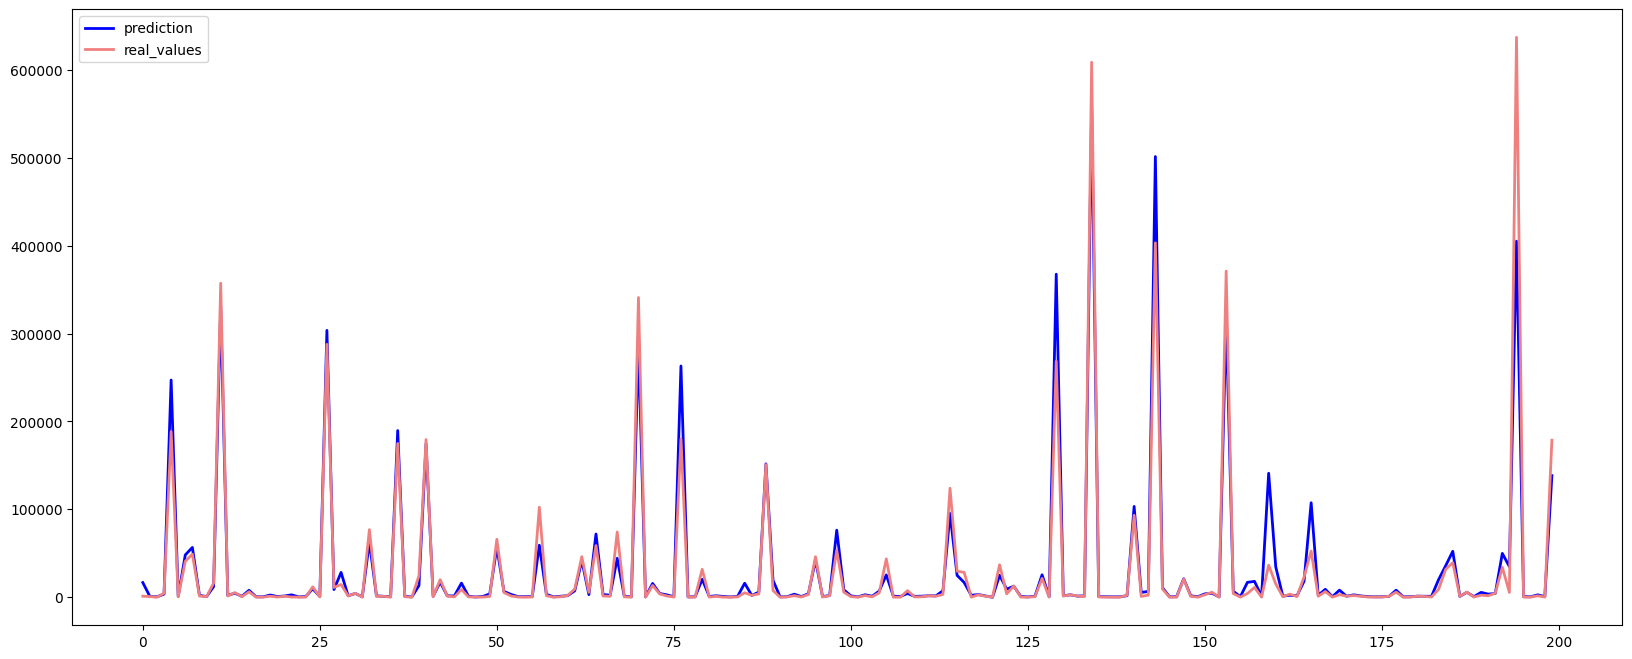

In [119]:
plt.figure(figsize=(20,8))
plt.plot(xgb_cv_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

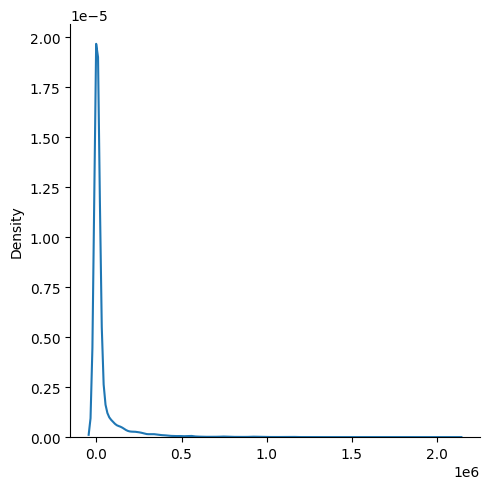

In [120]:
sns.displot(xgb_cv_pred,kind='kde')

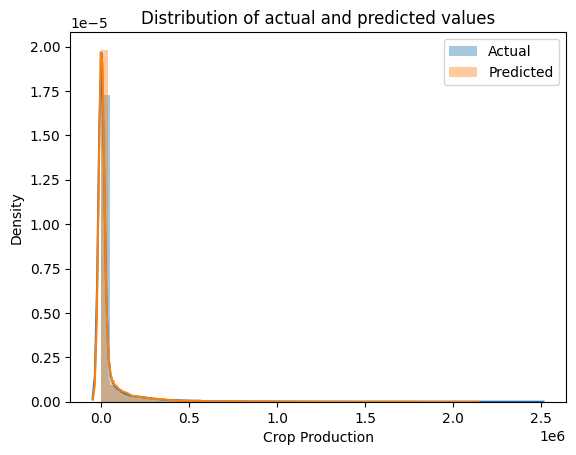

In [121]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(xgb_cv_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

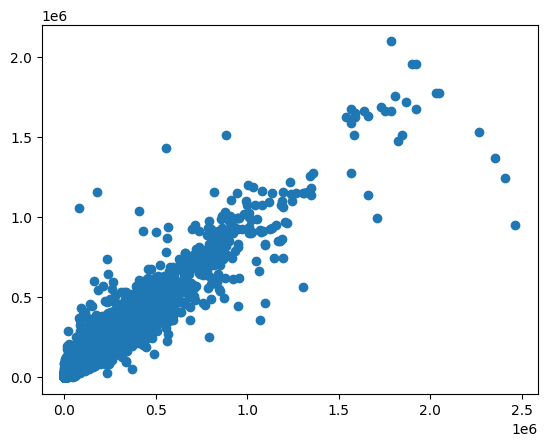

In [122]:
plt.scatter(y_test,xgb_cv_pred)

###### As above models come up with trees, they do not require scaling the data

### Scaling the data for other models

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
X_train.sample()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
85241,20,60,20,5.98,1110.78,25.666667,1515.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [125]:
X_train.iloc[:,[0,1,2,3,4,5,6]]=scaler.fit_transform(X_train.iloc[:,[0,1,2,3,4,5,6]])

In [126]:
X_train.sample(5)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
61800,1.271154,1.226537,0.807800,0.828280,-0.994636,-0.231855,-0.358436,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57449,0.258966,-0.105785,-0.070581,-0.402462,0.230603,1.422993,-0.147369,0,0,0,...,0,0,0,0,0,0,1,0,0,0
89330,-1.259315,-0.105785,-0.773285,-0.402462,-0.154358,-0.068078,0.487322,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10480,1.271154,1.226537,0.807800,1.066488,-0.018206,0.483709,-0.374963,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71902,0.258966,-0.105785,-0.773285,-0.005448,0.743751,0.276280,-0.355731,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [127]:
X_test.iloc[:,[0,1,2,3,4,5,6]]=scaler.transform(X_test.iloc[:,[0,1,2,3,4,5,6]])

In [128]:
X_test.sample(5)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
98321,0.258966,-0.105785,-0.070581,-0.561267,-0.994636,-0.231855,-0.371364,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44203,-1.259315,1.226537,-0.773285,-0.362761,0.513201,0.771467,-0.060517,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27853,-1.512362,-1.438106,-0.773285,1.900216,0.678749,0.403317,-0.376315,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41527,2.789435,1.226537,1.686181,-1.077385,-1.099933,-0.823788,-0.375926,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85930,0.258966,-0.105785,-0.773285,-0.323059,1.671768,-3.201738,-0.326414,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [142]:
lr.fit(X_train,y_train)

LinearRegression()

In [143]:
lr_y_pred=lr.predict(X_test)

In [144]:
lr_y_pred

array([  6880.,  13824.,   4680., ...,  17168., 198544., 278232.])

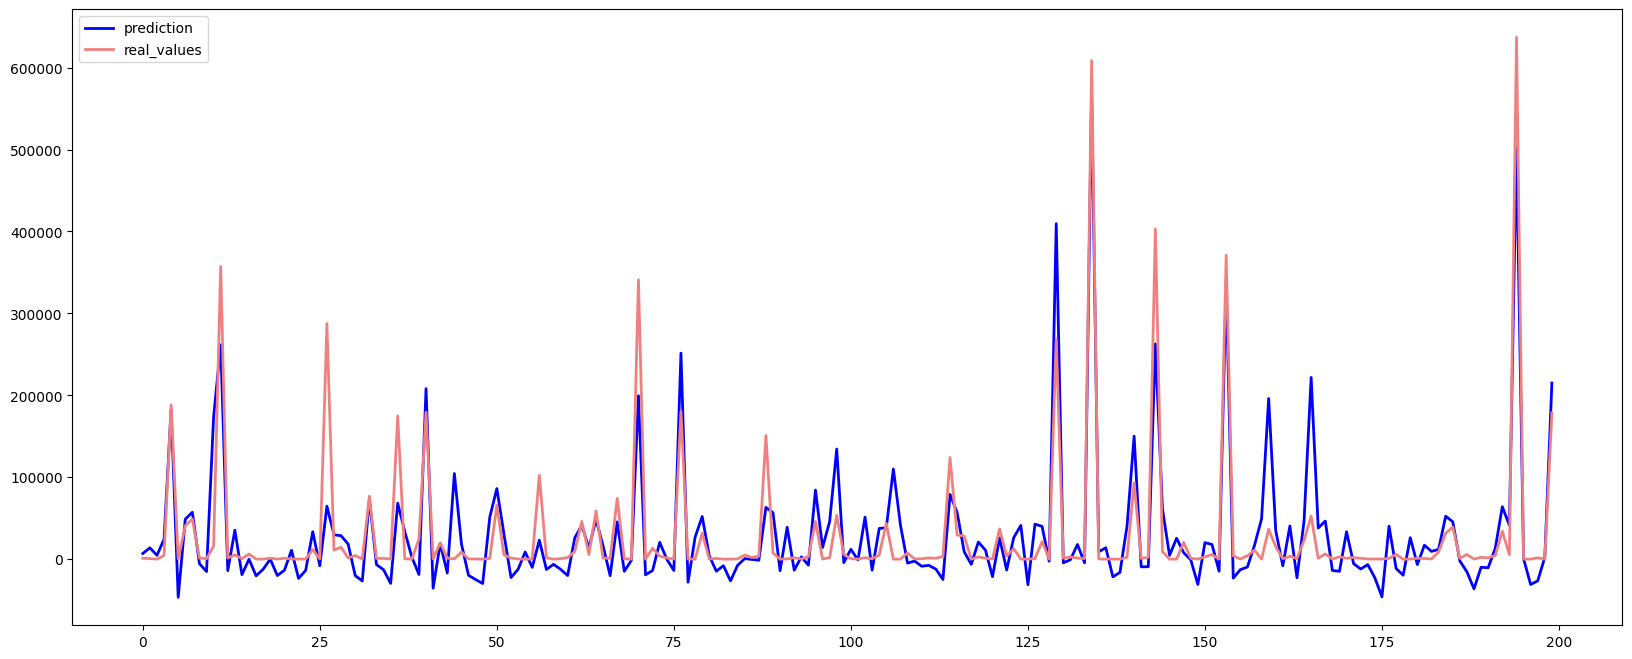

In [145]:
plt.figure(figsize=(20,8))
plt.plot(lr_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

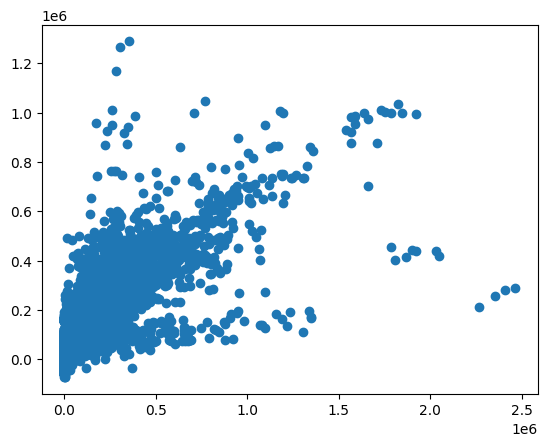

In [146]:
plt.scatter(y_test,lr_y_pred)

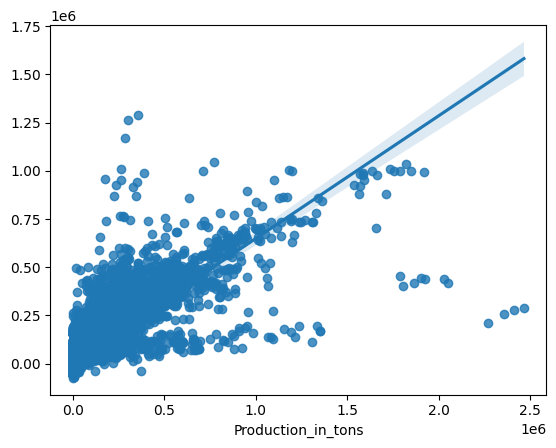

In [147]:
sns.regplot(x=y_test,y=lr_y_pred)
plt.show()

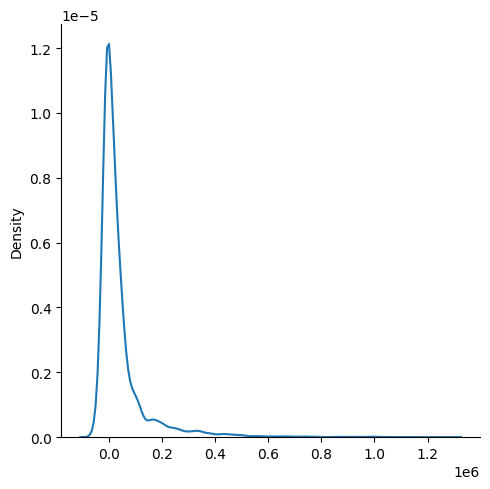

In [148]:
sns.displot(lr_y_pred,kind='kde')

In [149]:
lr_mae=mean_absolute_error(y_test,lr_y_pred)

In [150]:
lr_mse=mean_squared_error(y_test,lr_y_pred)

In [151]:
lr_rmse=np.sqrt(lr_mse)

In [152]:
lr_r2=r2_score(y_test,lr_y_pred)

In [153]:
lr_score=lr.score(X_test,y_test)

In [154]:
lr_score

0.648197249852312

In [155]:
print(f'R2_score is : {lr_r2}')
print(f'MSE is : {lr_mse}')
print(f'RMSE is : {lr_rmse}')
print(f'MAE is : {lr_mae}')
print(f'Model Score is : {lr_score}')

R2_score is : 0.648197249852312
MSE is : 5299183024.783553
RMSE is : 72795.48766773634
MAE is : 31502.74881856118
Model Score is : 0.648197249852312


In [156]:
with open("Models/LinearRegression_model.pkl",'wb') as lr_file:
    pickle.dump(lr,lr_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/LinearRegression_model.pkl'

# K Neighbors Regressor

In [157]:
from sklearn.neighbors import KNeighborsRegressor

In [158]:
knn=KNeighborsRegressor(n_neighbors=20)

In [159]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [160]:
knn_y_pred=knn.predict(X_test)

In [161]:
knn_r2=r2_score(y_test,knn_y_pred)

In [162]:
knn_mse=mean_squared_error(y_test,knn_y_pred)

In [163]:
knn_rmse=np.sqrt(knn_mse)

In [164]:
knn_mae=mean_absolute_error(y_test,knn_y_pred)

In [165]:
knn_score=knn.score(X_test,y_test)

In [166]:
print(f'R2_score is : {knn_r2}')
print(f'MSE is : {knn_mse}')
print(f'RMSE is : {knn_rmse}')
print(f'MAE is : {knn_mae}')
print(f'Model Score is : {knn_score}')

R2_score is : 0.9135861525204313
MSE is : 1301646429.6476583
RMSE is : 36078.33740137783
MAE is : 10293.527987114003
Model Score is : 0.9135861525204313


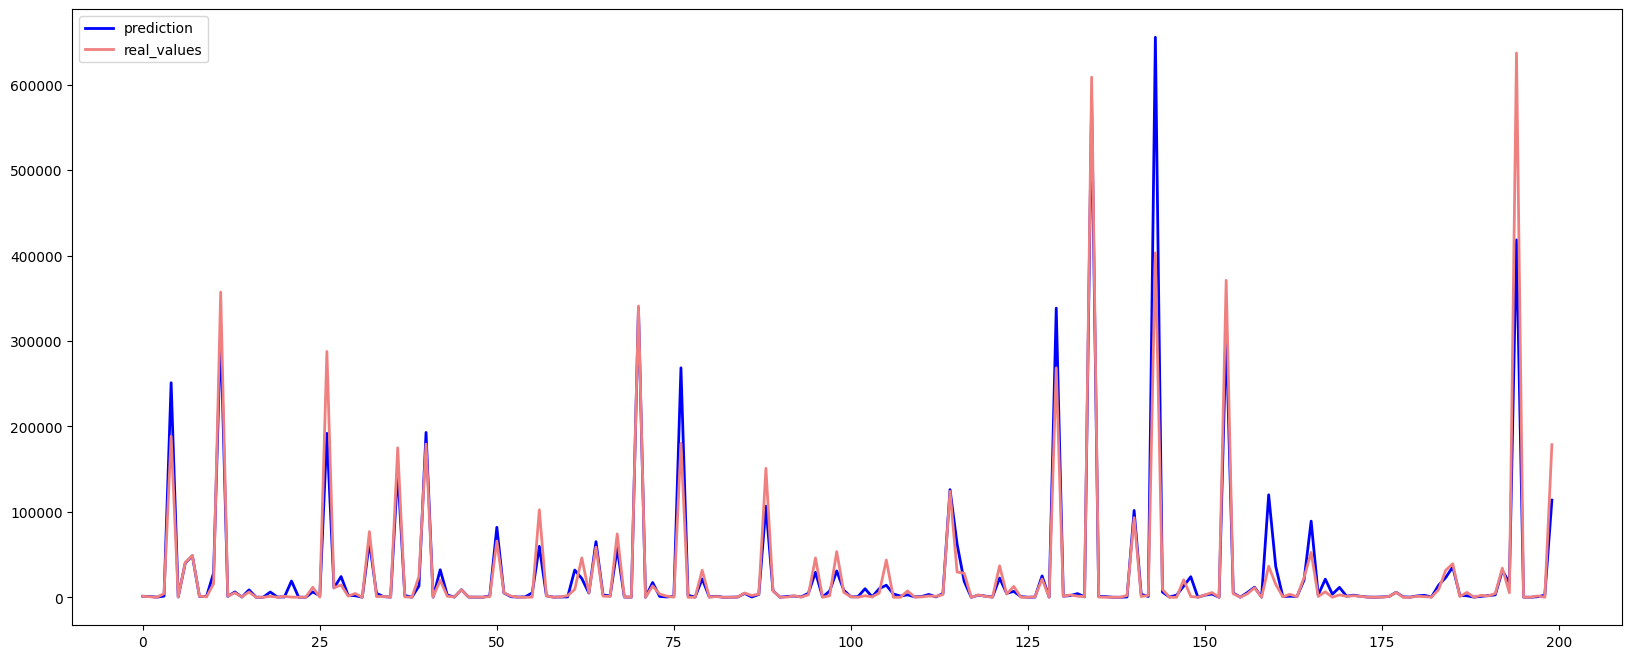

In [167]:
plt.figure(figsize=(20,8))
plt.plot(knn_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

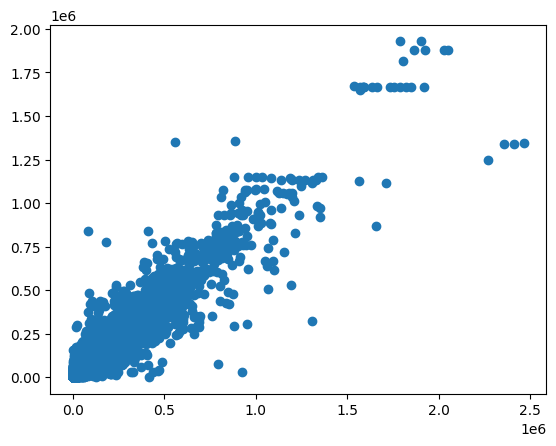

In [168]:
plt.scatter(y_test,knn_y_pred)

In [169]:
with open("Models/KNeighbouresRegressor_model.pkl",'wb') as knn_file:
    pickle.dump(knn,knn_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/KNeighbouresRegressor_model.pkl'

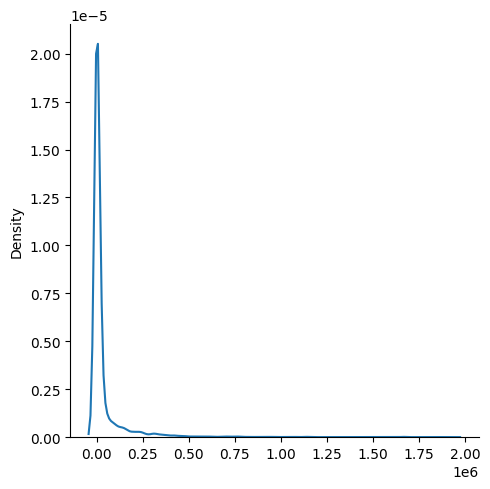

In [171]:
sns.displot(knn_y_pred,kind='kde')

### KNN Hyperparameter Tuning

In [172]:
knn_random=KNeighborsRegressor()

In [173]:
knn_grid={'n_neighbors':np.random.randint(5,30,20)}

In [174]:
knn_cv=RandomizedSearchCV(estimator=knn_random,param_distributions=knn_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,n_jobs=-1,random_state=42)

In [187]:
knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': array([12, 15, 24, 18, 17, 17,  9, 23, 11, 27, 21, 12, 28, 22, 25,  7, 24,
        5, 15, 24])},
                   random_state=42, scoring='neg_mean_squared_error')

In [188]:
knn_cv_pred=knn_cv.predict(X_test)

In [189]:
knn_best=knn_cv.best_estimator_

In [190]:
knn_best

KNeighborsRegressor(n_neighbors=7)

In [191]:
knn_cv_r2=r2_score(y_test,knn_cv_pred)

In [192]:
knn_cv_mse=mean_squared_error(y_test,knn_cv_pred)

In [193]:
knn_cv_rmse=np.sqrt(knn_cv_mse)

In [194]:
knn_cv_mae=mean_absolute_error(y_test,knn_cv_pred)

In [195]:
knn_cv_score=knn_best.score(X_test,y_test)

In [196]:
print(f'R2_score is : {knn_cv_r2}')
print(f'MSE is : {knn_cv_mse}')
print(f'RMSE is : {knn_cv_rmse}')
print(f'MAE is : {knn_cv_mae}')
print(f'Model Score is : {knn_cv_score}')

R2_score is : 0.9321226227668168
MSE is : 1022432727.0037351
RMSE is : 31975.501982044552
MAE is : 9099.89826310895
Model Score is : 0.9321226227668168


In [198]:
with open('Models/KNeighbouresRegressorCV_model.pkl','wb') as knn_cv_file:
    pickle.dump(knn_best,knn_cv_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/KNeighbouresRegressorCV_model.pkl'

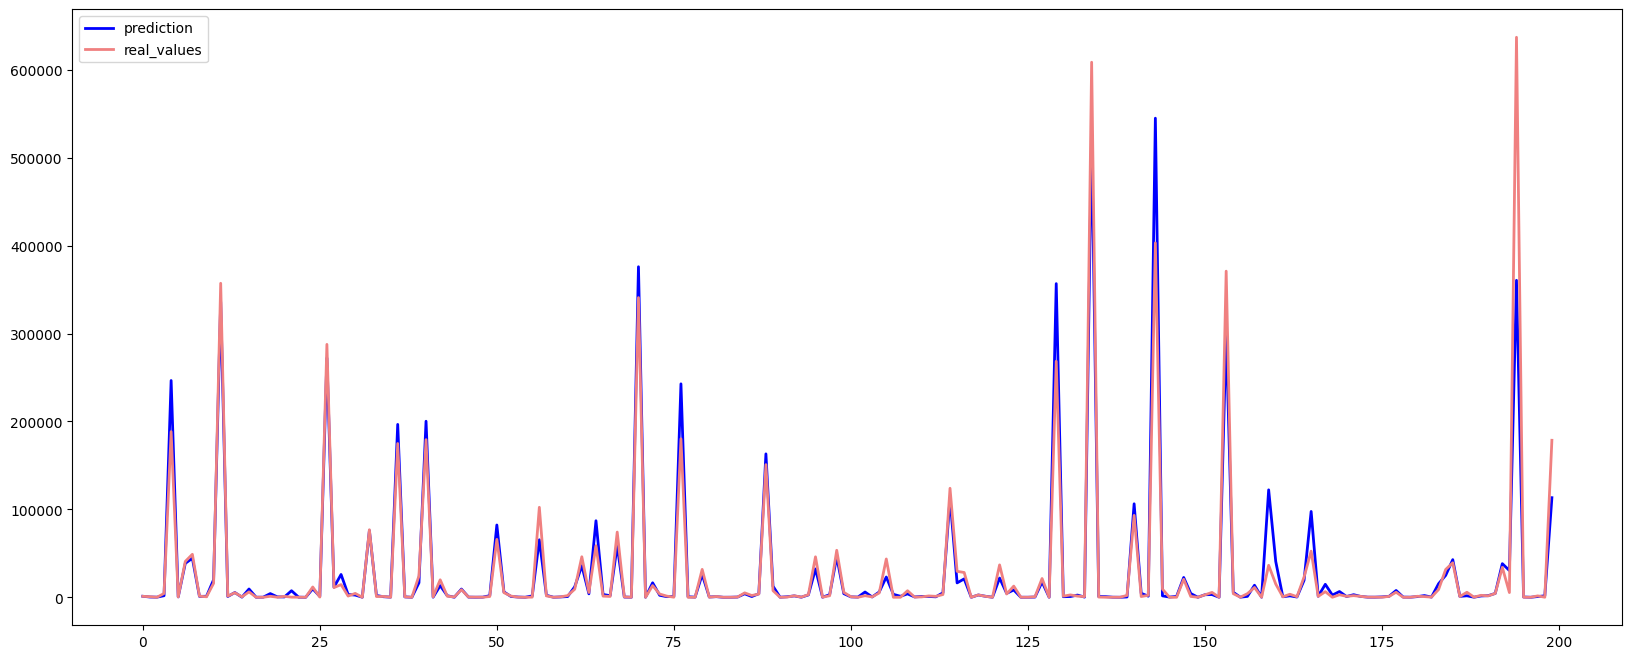

In [199]:
plt.figure(figsize=(20,8))
plt.plot(knn_cv_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

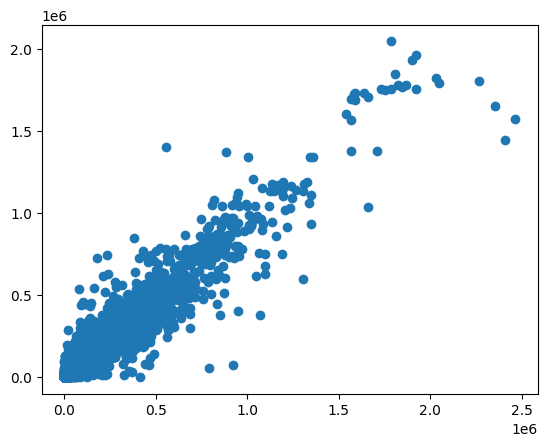

In [200]:
plt.scatter(y_test,knn_cv_pred)

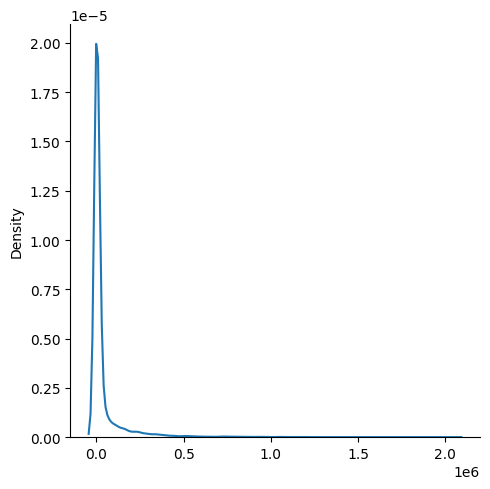

In [201]:
sns.displot(knn_cv_pred,kind='kde')

# Comparing All Trained Models

###### Comparing R2 or Model scores

###### R-squared (R2): measures the proportion of variation in the dependent variable that is explained by the independent variables. A higher R2 value closer to 1 indicates a better fit 

In [202]:
R2={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'r2_score':[rf_cv_r2,rf_r2,dt_r2,xgb_r2,xgb_cv_r2,lr_r2,knn_r2,knn_cv_r2]}

In [203]:
R2_df=pd.DataFrame(R2)

In [204]:
R2_df

,model,r2_score
0,RandomForest_CV,0.934790
1,RandomForest,0.930615
2,DecisionTree,0.897685
3,XGBoost,0.927630
4,XGBoost_CV,0.925648
5,LinearRegression,0.648197
6,KNN,0.913586
7,KNN_CV,0.932123


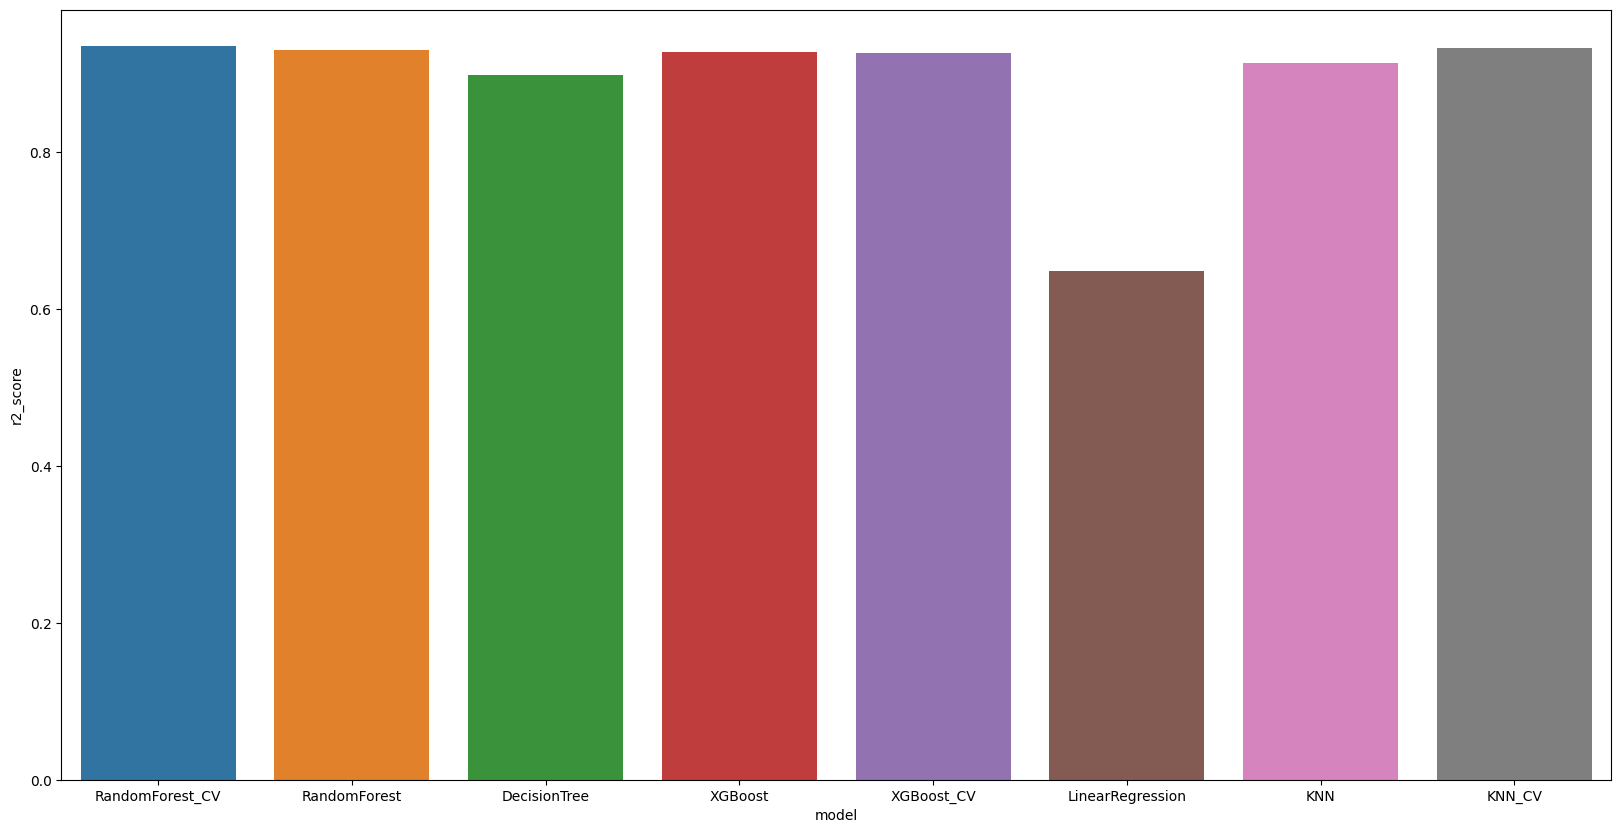

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='r2_score',data=R2_df)
plt.show()


###### Comparing MAE

###### Mean Absolute Error (MAE): measures the average of the absolute differences between predicted and actual values. A lower MAE value indicates a better fit of the model to the data.

In [206]:
MAE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'mae_scores':[rf_cv_mae,rf_mae,dt_mae,xgb_mae,xgb_cv_mae,lr_mae,knn_mae,knn_cv_mae]}

In [207]:
mae_df=pd.DataFrame(MAE)

In [208]:
mae_df

,model,mae_scores
0,RandomForest_CV,9157.546430
1,RandomForest,8361.727832
2,DecisionTree,10570.674344
3,XGBoost,8863.640287
4,XGBoost_CV,9224.092264
5,LinearRegression,31502.748819
6,KNN,10293.527987
7,KNN_CV,9099.898263


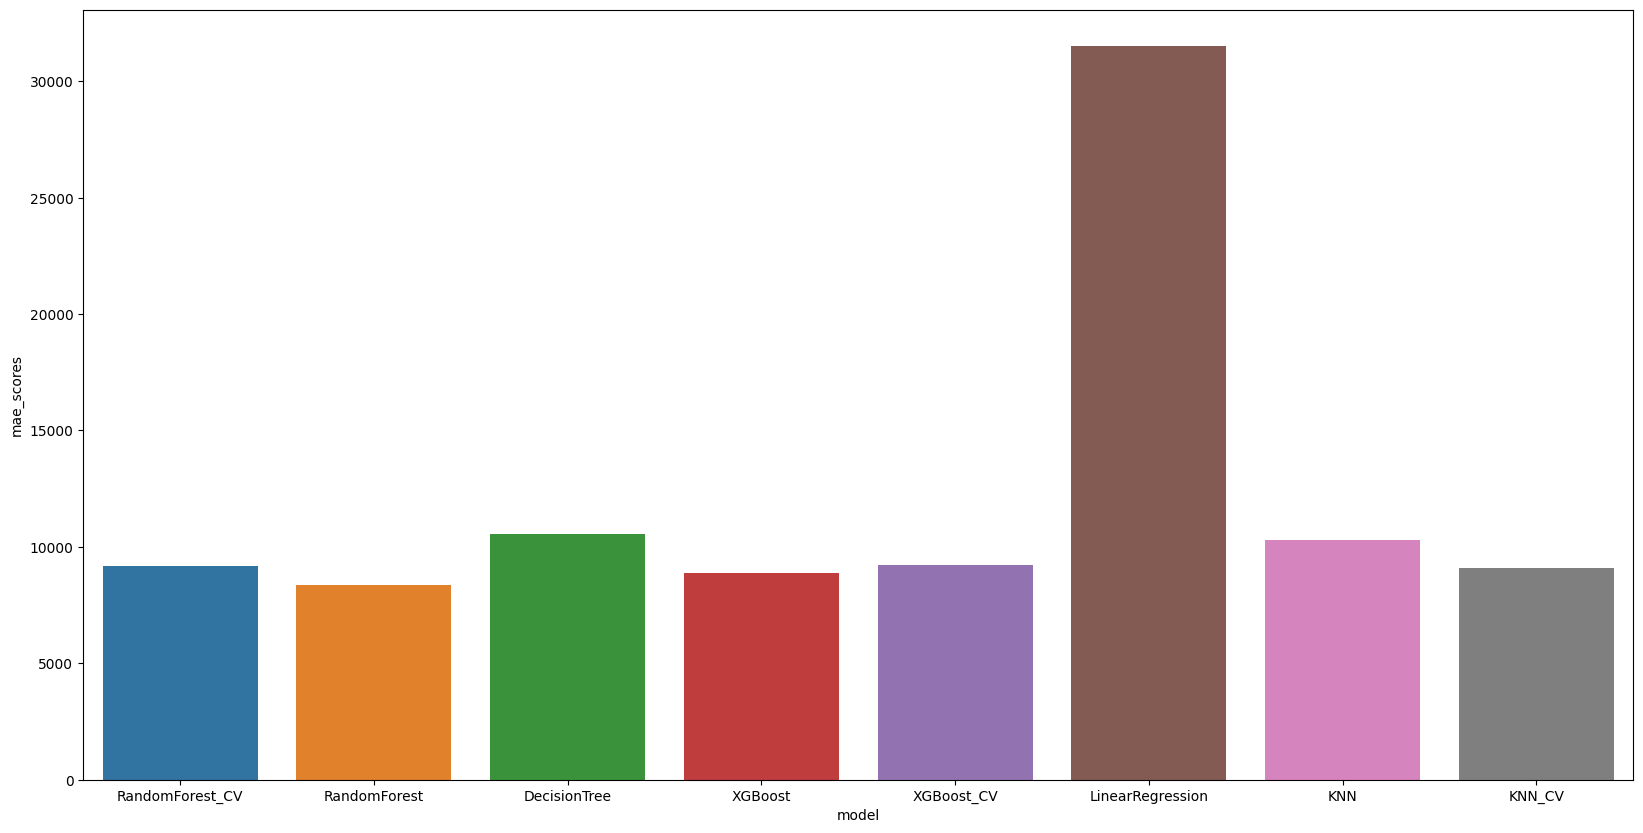

In [209]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='mae_scores',data=mae_df)
plt.show()

###### Comparing MSE

###### Mean Squared Error (MSE): measures the average of the squared differences between predicted and actual values. A lower MSE value indicates a better fit of the model to the data.

In [210]:
MSE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'mse_score':[rf_cv_mse,rf_mse,dt_mse,xgb_mse,xgb_cv_mse,lr_mse,knn_mse,knn_cv_mse]}

In [211]:
mse_df=pd.DataFrame(MSE)

In [212]:
mse_df

,model,mse_score
0,RandomForest_CV,9.822612e+08
1,RandomForest,1.045149e+09
2,DecisionTree,1.541166e+09
3,XGBoost,1.090108e+09
4,XGBoost_CV,1.119966e+09
5,LinearRegression,5.299183e+09
6,KNN,1.301646e+09
7,KNN_CV,1.022433e+09


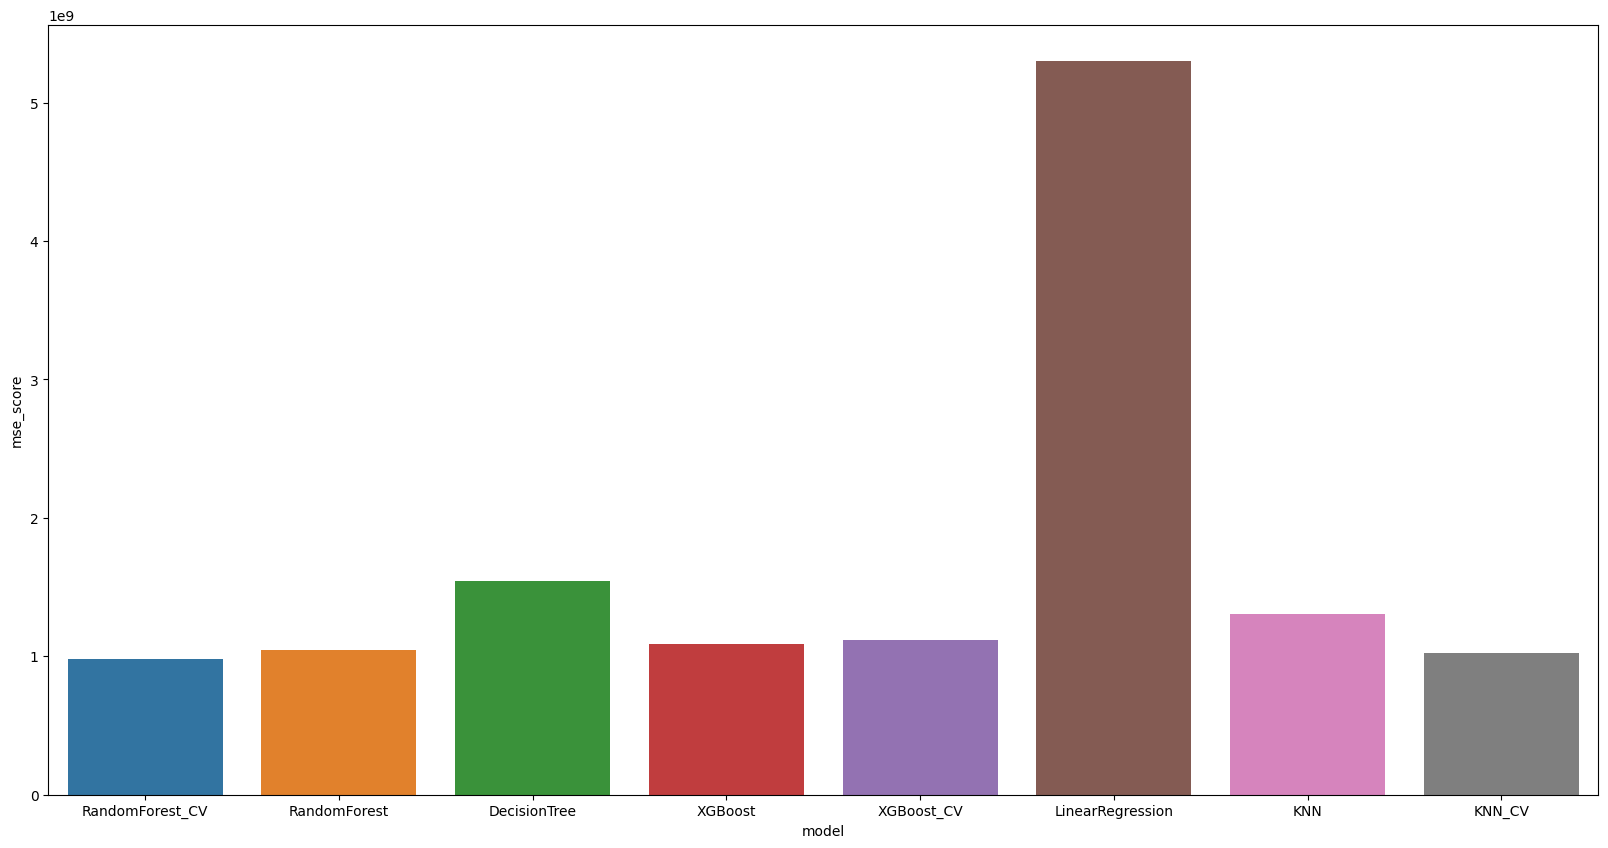

In [213]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='mse_score',data=mse_df)
plt.show()

###### Comparing RMSE

###### Root Mean Squared Error (RMSE): is the square root of MSE and measures the standard deviation of the errors made by the model. A lower RMSE value indicates a better fit of the model to the data.

In [214]:
RMSE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'rmse_score':[rf_cv_rmse,rf_rmse,dt_rmse,xgb_rmse,xgb_cv_rmse,lr_rmse,knn_rmse,knn_cv_rmse]}

In [215]:
rmse_df=pd.DataFrame(RMSE)

In [216]:
rmse_df

,model,rmse_score
0,RandomForest_CV,31341.047091
1,RandomForest,32328.765916
2,DecisionTree,39257.686484
3,XGBoost,33016.776757
4,XGBoost_CV,33465.894437
5,LinearRegression,72795.487668
6,KNN,36078.337401
7,KNN_CV,31975.501982


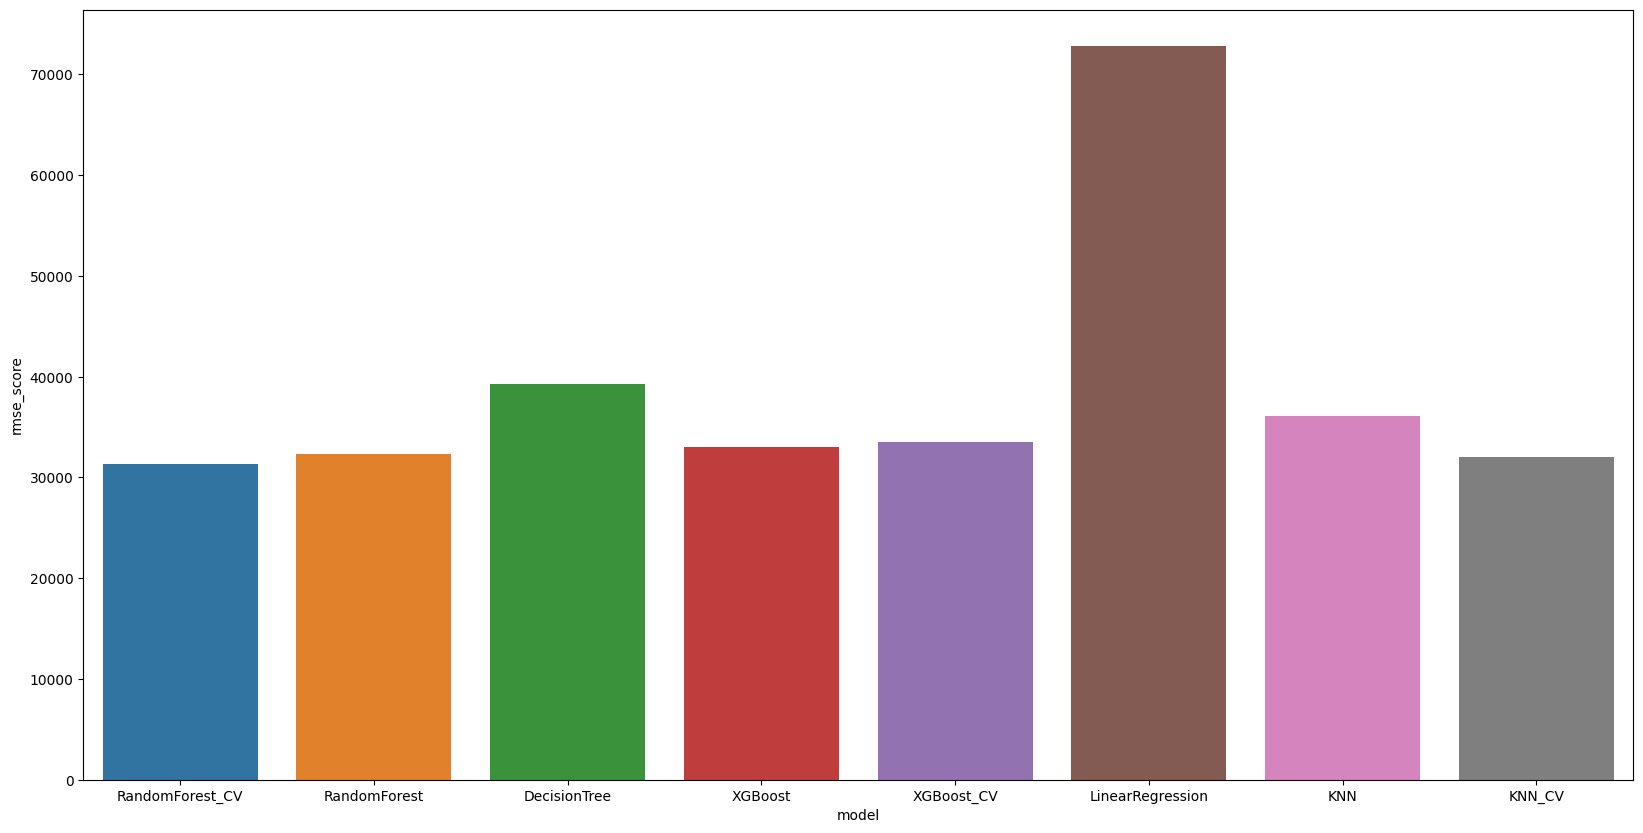

In [217]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='rmse_score',data=rmse_df)
plt.show()

# Comparing Predictions Of Models

In [218]:
actual=y_test.to_numpy()


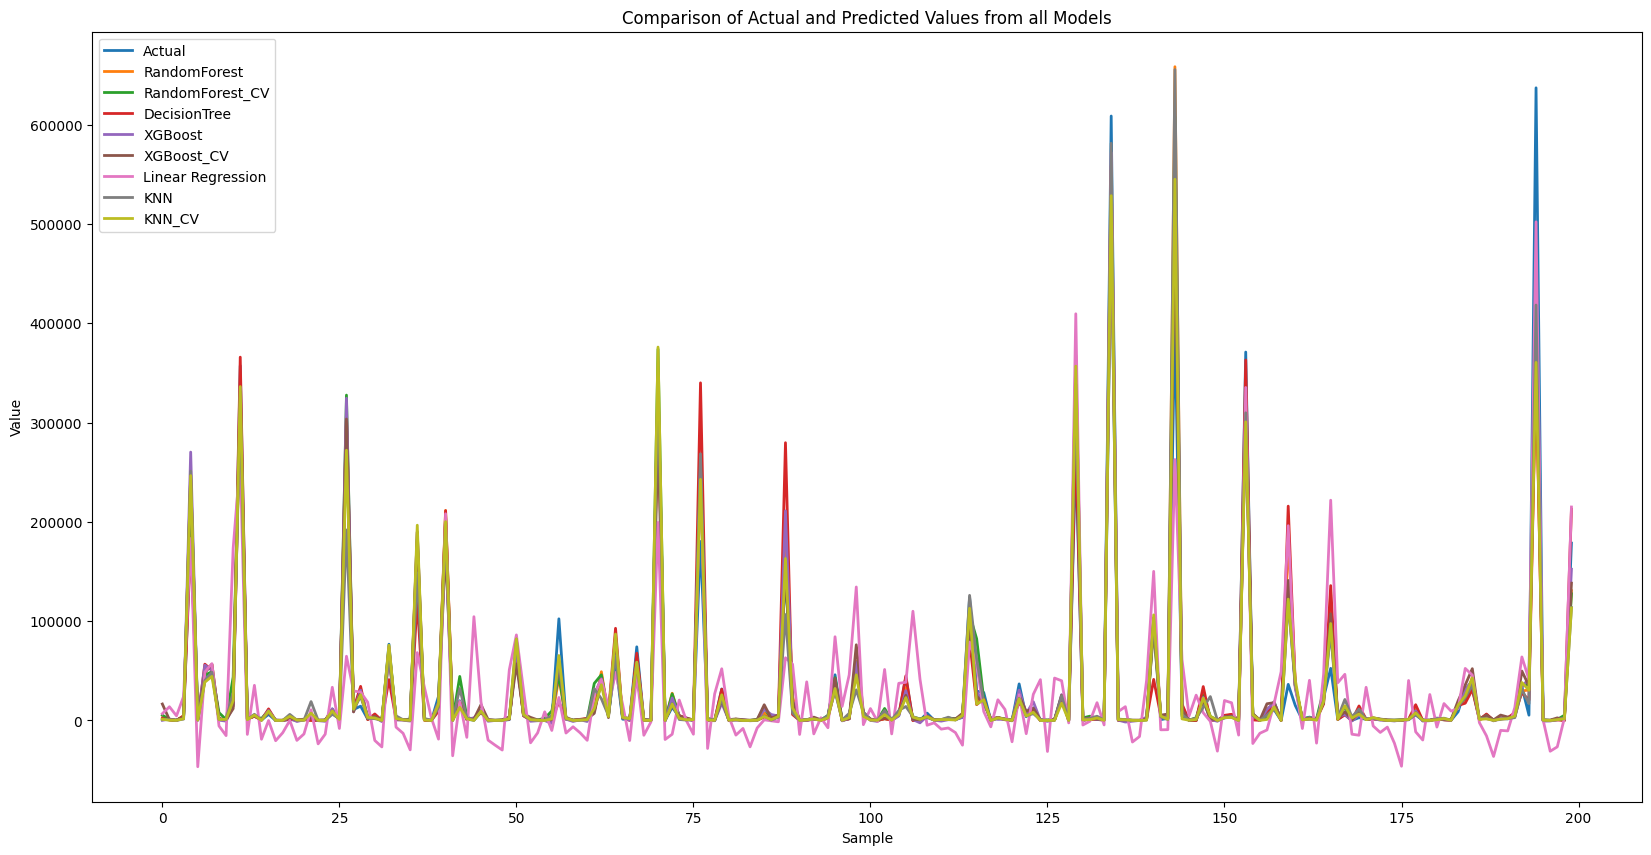

In [219]:
plt.figure(figsize=(20,10))
plt.plot(actual[:200],linewidth=2.0, label='Actual')
plt.plot(y_pred[:200],linewidth=2.0 ,label='RandomForest')
plt.plot(rf_pred[:200],linewidth=2.0, label='RandomForest_CV')
plt.plot(dt_y_pred[:200], linewidth=2.0,label='DecisionTree')
plt.plot(xgb_y_pred[:200], linewidth=2.0,label='XGBoost')
plt.plot(xgb_cv_pred[:200], linewidth=2.0,label='XGBoost_CV')
plt.plot(lr_y_pred[:200], linewidth=2.0,label='Linear Regression')
plt.plot(knn_y_pred[:200], linewidth=2.0,label='KNN')
plt.plot(knn_cv_pred[:200],linewidth=2.0,label='KNN_CV')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values from all Models')
plt.legend(loc='best')
plt.show()